
## GPT and RNN and LSTM for Time Series data with time delays

* Per cast
* GPT - first attempt


In [1]:

import pandas as pd
import numpy as np


In [2]:

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


In [3]:

import matplotlib 
## import pytorch_lightning as pl
import torch 

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable


In [ ]:

## Requires Python = 3.9



## Parameters


In [4]:

window                 = 20   ## 5   ## 90   ## 30          ## seq length

silicon_feature_index  = 0

avg_the_rows_parameter =  1   ##   15

vector_n_out = 24


## 1    ->  1 minute time step
## 15   -> 15 minute time step
## 1440 -> 24 hour time step
## 480  -> 8 hour shift
## 60   -> 1 hour time step



## Read the data


In [5]:

for_RNN_data_CIVS = pd.read_csv('input/RNN_time_DELAYS_2000_PerCast_rcalix.csv')


In [6]:

for_RNN_data_CIVS.head(5)


Unnamed: 0     SI_f1  HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  \
0           1  0.719500                4.242439          2161.425209   
1           2  0.710486                4.174343          2168.238915   
2           3  0.666106                4.126144          2167.779119   
3           4  0.675145                4.120736          2166.974740   
4           5  0.776831                4.120331          2166.384674   

   NAT_GAS _INJECTION_f3  WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
0            9306.840913   184.818611                    0.0           0.0   
1            9336.364456   185.993447                    0.0           0.0   
2            9419.200115   185.828474                    0.0           0.0   
3            9564.165802   185.924481                    0.0           0.0   
4            9648.247637   185.942943                    0.0           0.0   

   Cast_Avg_Mn_f2  Slag_Fe_f2  ...  SE_Uptake_f3  NW_Uptake_f3  SW_Uptake_f3  \
0           0.354        0.16  ...    182.533770    148.126483    192.512412   
1           0.313        0.83  ...    183.725050    148.161842    192.366046   
2           0.360        0.10  ...    195.812061    147.562523    198.423474   
3           0.319        0.34  ...    188.028883    147.807509    179.116839   
4           0.335        0.28  ...    200.141261    149.014319    186.052137   

   Slag_SiO2_f2  Slag_CaO_f2  Slag_MgO_f2  SNORT_VALVE_POSITION_f3  \
0     37.369999    36.439999         9.86                98.334297   
1     35.540001    35.970001         9.03                98.334297   
2     34.849998    36.590000         9.13                98.334297   
3     34.009998    35.900002         8.82                98.334297   
4     34.380001    35.970001         8.73                98.334297   

   TOP_PRESS_f3  HOT_BLAST_PRESSURE_f3  cokerate_f4  
0     18.532928              36.602600        884.0  
1     18.397217              36.882963        884.0  
2     18.393974              36.568884        884.0  
3     18.370316              36.839147        884.0  
4     18.395860              36.658018        884.0  

[5 rows x 25 columns]

In [7]:

for_RNN_data_CIVS


Unnamed: 0     SI_f1  HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  \
0              1  0.719500                4.242439          2161.425209   
1              2  0.710486                4.174343          2168.238915   
2              3  0.666106                4.126144          2167.779119   
3              4  0.675145                4.120736          2166.974740   
4              5  0.776831                4.120331          2166.384674   
...          ...       ...                     ...                  ...   
1378        1379  0.762500                4.204430          2169.361647   
1379        1380  0.646000                4.208539          2169.079601   
1380        1381  0.654667                4.212648          2168.797556   
1381        1382  0.591667                4.217784          2168.444999   
1382        1383  0.724667                4.223948          2167.967389   

      NAT_GAS _INJECTION_f3  WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
0               9306.840913   184.818611                    0.0           0.0   
1               9336.364456   185.993447                    0.0           0.0   
2               9419.200115   185.828474                    0.0           0.0   
3               9564.165802   185.924481                    0.0           0.0   
4               9648.247637   185.942943                    0.0           0.0   
...                     ...          ...                    ...           ...   
1378            9297.484543   185.046491                    0.0           0.0   
1379            9312.779010   185.053796                    0.0           0.0   
1380            9303.753420   185.007919                    0.0           0.0   
1381            9333.448101   184.942435                    0.0           0.0   
1382            9321.819731   184.863855                    0.0           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2  ...  SE_Uptake_f3  NW_Uptake_f3  \
0              0.354        0.16  ...    182.533770    148.126483   
1              0.313        0.83  ...    183.725050    148.161842   
2              0.360        0.10  ...    195.812061    147.562523   
3              0.319        0.34  ...    188.028883    147.807509   
4              0.335        0.28  ...    200.141261    149.014319   
...              ...         ...  ...           ...           ...   
1378           0.343        0.30  ...    185.900341    148.103530   
1379           0.324        0.30  ...    182.408576    148.106012   
1380           0.325        0.16  ...    181.684649    148.108493   
1381           0.335        0.26  ...    195.202191    148.111595   
1382           0.328        1.08  ...    220.149599    148.115317   

      SW_Uptake_f3  Slag_SiO2_f2  Slag_CaO_f2  Slag_MgO_f2  \
0       192.512412     37.369999    36.439999         9.86   
1       192.366046     35.540001    35.970001         9.03   
2       198.423474     34.849998    36.590000         9.13   
3       179.116839     34.009998    35.900002         8.82   
4       186.052137     34.380001    35.970001         8.73   
...            ...           ...          ...          ...   
1378    199.914193     35.900002    37.259998        10.04   
1379    193.501805     35.900002    37.259998        10.04   
1380    194.328694     35.580002    36.500000         9.30   
1381    215.606202     35.130001    37.470001        10.01   
1382    250.937261     35.570000    36.970001         9.47   

      SNORT_VALVE_POSITION_f3  TOP_PRESS_f3  HOT_BLAST_PRESSURE_f3  \
0                   98.334297     18.532928              36.602600   
1                   98.334297     18.397217              36.882963   
2                   98.334297     18.393974              36.568884   
3                   98.334297     18.370316              36.839147   
4                   98.334297     18.395860              36.658018   
...                       ...           ...                    ...   
1378                98.334297     18.209401              36.727897  

In [8]:

cols_list_DF = for_RNN_data_CIVS.columns.values.tolist()
cols_list_DF


['Unnamed: 0',
 'SI_f1',
 'HOST_BLAST_MOISTURE_f3',
 'HOT_BLAST_TMP_NS_f3',
 'NAT_GAS _INJECTION_f3',
 'WINDRATE_f3',
 'HIGH_PURITY_OXYGEN_f3',
 'COAL_FLOW_f3',
 'Cast_Avg_Mn_f2',
 'Slag_Fe_f2',
 'Selec_Top_Gas_CO_f3',
 'Selec_Top_Gas_CO2_f3',
 'Selec_Top_Gas_H2_f3',
 'Selec_Top_Gas_N2_f3',
 'NE_Uptake_f3',
 'SE_Uptake_f3',
 'NW_Uptake_f3',
 'SW_Uptake_f3',
 'Slag_SiO2_f2',
 'Slag_CaO_f2',
 'Slag_MgO_f2',
 'SNORT_VALVE_POSITION_f3',
 'TOP_PRESS_f3',
 'HOT_BLAST_PRESSURE_f3',
 'cokerate_f4']

In [9]:

l_new = ['SI_f1',
 'HOST_BLAST_MOISTURE_f3',
 'HOT_BLAST_TMP_NS_f3',
 'NAT_GAS _INJECTION_f3',
 'WINDRATE_f3',
 'HIGH_PURITY_OXYGEN_f3',
 'COAL_FLOW_f3',
 'Cast_Avg_Mn_f2',
 'Slag_Fe_f2',
 'Selec_Top_Gas_CO_f3',
 'Selec_Top_Gas_CO2_f3',
 'Selec_Top_Gas_H2_f3',
 'Selec_Top_Gas_N2_f3',
 'NE_Uptake_f3',
 'SE_Uptake_f3',
 'NW_Uptake_f3',
 'SW_Uptake_f3',
 'Slag_SiO2_f2',
 'Slag_CaO_f2',
 'Slag_MgO_f2',
 'SNORT_VALVE_POSITION_f3',
 'TOP_PRESS_f3',
 'HOT_BLAST_PRESSURE_f3',
 'cokerate_f4']


In [10]:

for_RNN_data_CIVS = for_RNN_data_CIVS[l_new]


In [11]:

for_RNN_data_CIVS 


SI_f1  HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  \
0     0.719500                4.242439          2161.425209   
1     0.710486                4.174343          2168.238915   
2     0.666106                4.126144          2167.779119   
3     0.675145                4.120736          2166.974740   
4     0.776831                4.120331          2166.384674   
...        ...                     ...                  ...   
1378  0.762500                4.204430          2169.361647   
1379  0.646000                4.208539          2169.079601   
1380  0.654667                4.212648          2168.797556   
1381  0.591667                4.217784          2168.444999   
1382  0.724667                4.223948          2167.967389   

      NAT_GAS _INJECTION_f3  WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
0               9306.840913   184.818611                    0.0           0.0   
1               9336.364456   185.993447                    0.0           0.0   
2               9419.200115   185.828474                    0.0           0.0   
3               9564.165802   185.924481                    0.0           0.0   
4               9648.247637   185.942943                    0.0           0.0   
...                     ...          ...                    ...           ...   
1378            9297.484543   185.046491                    0.0           0.0   
1379            9312.779010   185.053796                    0.0           0.0   
1380            9303.753420   185.007919                    0.0           0.0   
1381            9333.448101   184.942435                    0.0           0.0   
1382            9321.819731   184.863855                    0.0           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2  Selec_Top_Gas_CO_f3  ...  SE_Uptake_f3  \
0              0.354        0.16            21.080431  ...    182.533770   
1              0.313        0.83            20.996415  ...    183.725050   
2              0.360        0.10            20.749627  ...    195.812061   
3              0.319        0.34            20.609259  ...    188.028883   
4              0.335        0.28            20.617383  ...    200.141261   
...              ...         ...                  ...  ...           ...   
1378           0.343        0.30            21.039583  ...    185.900341   
1379           0.324        0.30            21.043999  ...    182.408576   
1380           0.325        0.16            21.048415  ...    181.684649   
1381           0.335        0.26            21.053935  ...    195.202191   
1382           0.328        1.08            21.060559  ...    220.149599   

      NW_Uptake_f3  SW_Uptake_f3  Slag_SiO2_f2  Slag_CaO_f2  Slag_MgO_f2  \
0       148.126483    192.512412     37.369999    36.439999         9.86   
1       148.161842    192.366046     35.540001    35.970001         9.03   
2       147.562523    198.423474     34.849998    36.590000         9.13   
3       147.807509    179.116839     34.009998    35.900002         8.82   
4       149.014319    186.052137     34.380001    35.970001         8.73   
...            ...           ...           ...          ...          ...   
1378    148.103530    199.914193     35.900002    37.259998        10.04   
1379    148.106012    193.501805     35.900002    37.259998        10.04   
1380    148.108493    194.328694     35.580002    36.500000         9.30   
1381    148.111595    215.606202     35.130001    37.470001        10.01   
1382    148.115317    250.937261     35.570000    36.970001         9.47   

      SNORT_VALVE_POSITION_f3  TOP_PRESS_f3  HOT_BLAST_PRESSURE_f3  \
0                   98.334297     18.532928              36.602600   
1                   98.334297     18.397217              36.882963   
2                   98.334297     18.393974              36.568884   
3                   98.334297     18.370316              36.839147   
4                   98.334297     18.395860              36.658018   
...                       ...    

In [12]:

for_RNN_data_CIVS.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1383 entries, 0 to 1382
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SI_f1                    1383 non-null   float64
 1   HOST_BLAST_MOISTURE_f3   1383 non-null   float64
 2   HOT_BLAST_TMP_NS_f3      1383 non-null   float64
 3   NAT_GAS _INJECTION_f3    1383 non-null   float64
 4   WINDRATE_f3              1383 non-null   float64
 5   HIGH_PURITY_OXYGEN_f3    1383 non-null   float64
 6   COAL_FLOW_f3             1383 non-null   float64
 7   Cast_Avg_Mn_f2           1383 non-null   float64
 8   Slag_Fe_f2               1383 non-null   float64
 9   Selec_Top_Gas_CO_f3      1383 non-null   float64
 10  Selec_Top_Gas_CO2_f3     1383 non-null   float64
 11  Selec_Top_Gas_H2_f3      1383 non-null   float64
 12  Selec_Top_Gas_N2_f3      1383 non-null   float64
 13  NE_Uptake_f3             1383 non-null   float64
 14  SE_Uptake_f3            


## Plots


In [13]:

plt.rcParams["figure.figsize"] = [15, 5]


In [14]:

## plt.plot(rc22, for_RNN_data_CIVS['SI_f1'])


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
      dtype=object)

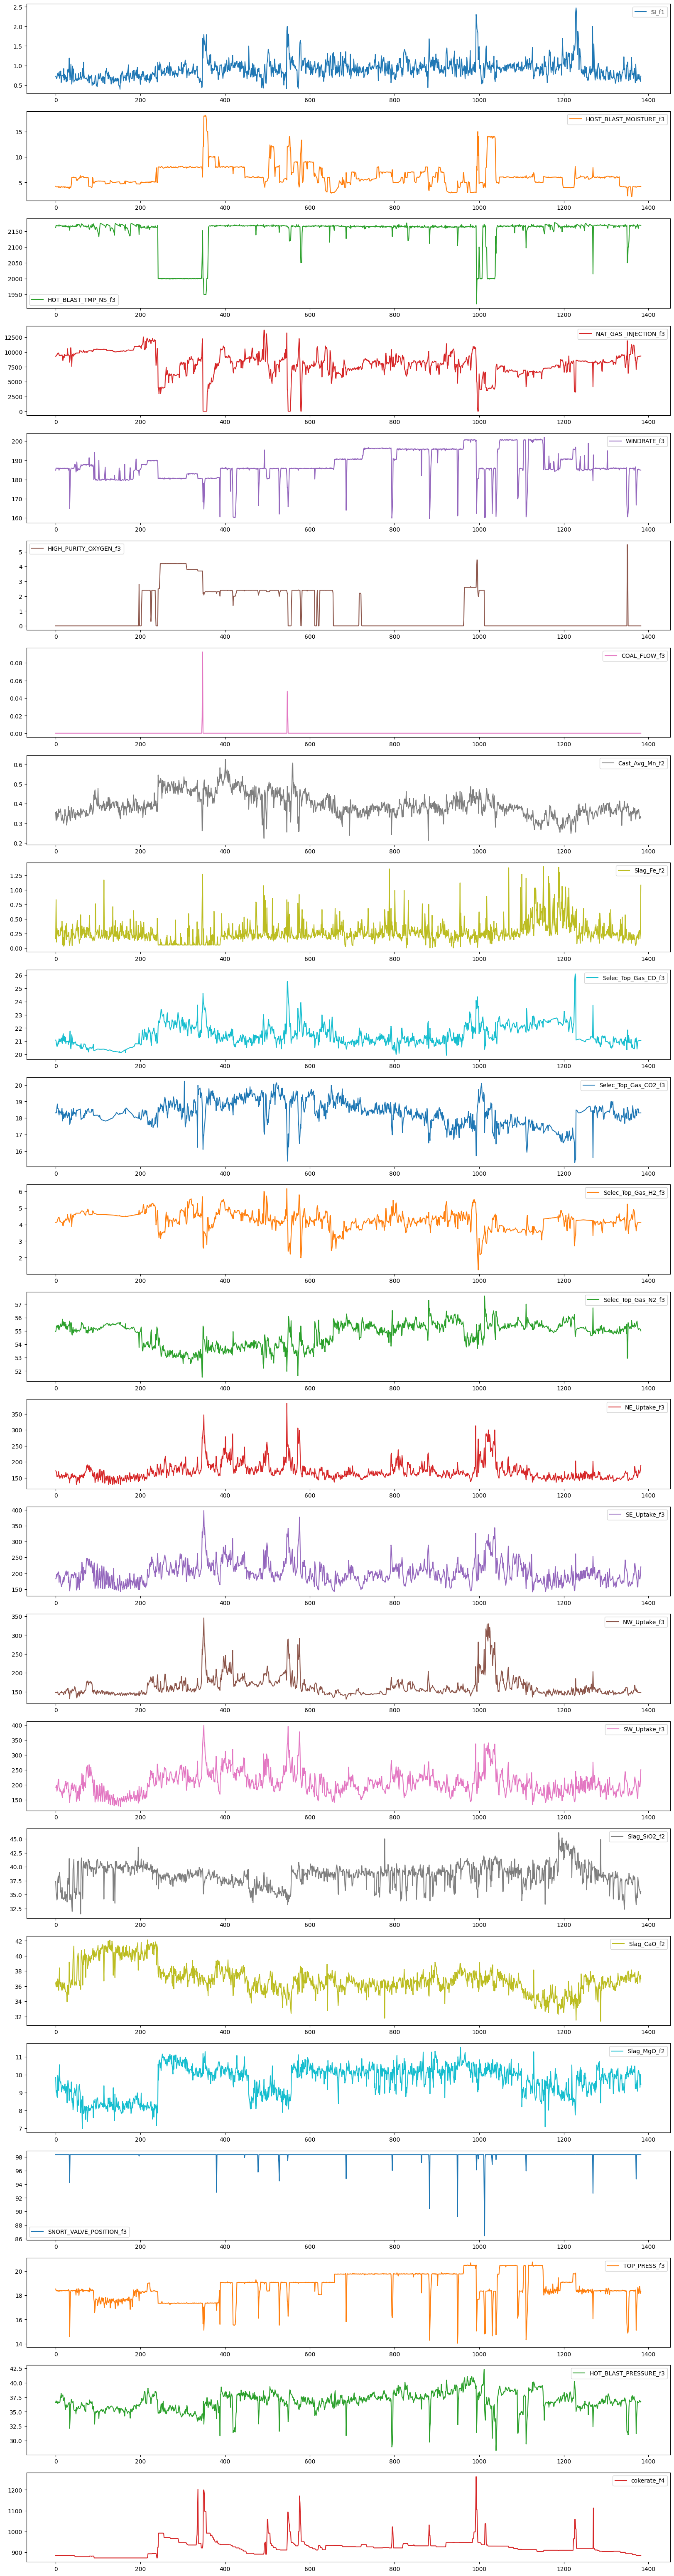

In [15]:

## layout=(4, 3), 
## style=['r', 'r', 'r', 'g', 'g', 'g', 'b', 'b', 'b', 'r', 'r', 'r'],
## xticks=np.arange(0, len(df), 16)

## for_RNN_data_CIVS.plot( xticks=rc22, figsize=(20,80),  subplots=True   )

## x='MM_Timestamp_f1' ,

for_RNN_data_CIVS.plot( kind='line', subplots=True, figsize=(20,80),
        sharex=False, sharey=False, legend=True )


In [16]:

l_new


['SI_f1',
 'HOST_BLAST_MOISTURE_f3',
 'HOT_BLAST_TMP_NS_f3',
 'NAT_GAS _INJECTION_f3',
 'WINDRATE_f3',
 'HIGH_PURITY_OXYGEN_f3',
 'COAL_FLOW_f3',
 'Cast_Avg_Mn_f2',
 'Slag_Fe_f2',
 'Selec_Top_Gas_CO_f3',
 'Selec_Top_Gas_CO2_f3',
 'Selec_Top_Gas_H2_f3',
 'Selec_Top_Gas_N2_f3',
 'NE_Uptake_f3',
 'SE_Uptake_f3',
 'NW_Uptake_f3',
 'SW_Uptake_f3',
 'Slag_SiO2_f2',
 'Slag_CaO_f2',
 'Slag_MgO_f2',
 'SNORT_VALVE_POSITION_f3',
 'TOP_PRESS_f3',
 'HOT_BLAST_PRESSURE_f3',
 'cokerate_f4']


## Back to the Data Processing


In [17]:

for_RNN_data_CIVS.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1383 entries, 0 to 1382
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SI_f1                    1383 non-null   float64
 1   HOST_BLAST_MOISTURE_f3   1383 non-null   float64
 2   HOT_BLAST_TMP_NS_f3      1383 non-null   float64
 3   NAT_GAS _INJECTION_f3    1383 non-null   float64
 4   WINDRATE_f3              1383 non-null   float64
 5   HIGH_PURITY_OXYGEN_f3    1383 non-null   float64
 6   COAL_FLOW_f3             1383 non-null   float64
 7   Cast_Avg_Mn_f2           1383 non-null   float64
 8   Slag_Fe_f2               1383 non-null   float64
 9   Selec_Top_Gas_CO_f3      1383 non-null   float64
 10  Selec_Top_Gas_CO2_f3     1383 non-null   float64
 11  Selec_Top_Gas_H2_f3      1383 non-null   float64
 12  Selec_Top_Gas_N2_f3      1383 non-null   float64
 13  NE_Uptake_f3             1383 non-null   float64
 14  SE_Uptake_f3            

In [18]:

for_RNN_data_CIVS


SI_f1  HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  \
0     0.719500                4.242439          2161.425209   
1     0.710486                4.174343          2168.238915   
2     0.666106                4.126144          2167.779119   
3     0.675145                4.120736          2166.974740   
4     0.776831                4.120331          2166.384674   
...        ...                     ...                  ...   
1378  0.762500                4.204430          2169.361647   
1379  0.646000                4.208539          2169.079601   
1380  0.654667                4.212648          2168.797556   
1381  0.591667                4.217784          2168.444999   
1382  0.724667                4.223948          2167.967389   

      NAT_GAS _INJECTION_f3  WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
0               9306.840913   184.818611                    0.0           0.0   
1               9336.364456   185.993447                    0.0           0.0   
2               9419.200115   185.828474                    0.0           0.0   
3               9564.165802   185.924481                    0.0           0.0   
4               9648.247637   185.942943                    0.0           0.0   
...                     ...          ...                    ...           ...   
1378            9297.484543   185.046491                    0.0           0.0   
1379            9312.779010   185.053796                    0.0           0.0   
1380            9303.753420   185.007919                    0.0           0.0   
1381            9333.448101   184.942435                    0.0           0.0   
1382            9321.819731   184.863855                    0.0           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2  Selec_Top_Gas_CO_f3  ...  SE_Uptake_f3  \
0              0.354        0.16            21.080431  ...    182.533770   
1              0.313        0.83            20.996415  ...    183.725050   
2              0.360        0.10            20.749627  ...    195.812061   
3              0.319        0.34            20.609259  ...    188.028883   
4              0.335        0.28            20.617383  ...    200.141261   
...              ...         ...                  ...  ...           ...   
1378           0.343        0.30            21.039583  ...    185.900341   
1379           0.324        0.30            21.043999  ...    182.408576   
1380           0.325        0.16            21.048415  ...    181.684649   
1381           0.335        0.26            21.053935  ...    195.202191   
1382           0.328        1.08            21.060559  ...    220.149599   

      NW_Uptake_f3  SW_Uptake_f3  Slag_SiO2_f2  Slag_CaO_f2  Slag_MgO_f2  \
0       148.126483    192.512412     37.369999    36.439999         9.86   
1       148.161842    192.366046     35.540001    35.970001         9.03   
2       147.562523    198.423474     34.849998    36.590000         9.13   
3       147.807509    179.116839     34.009998    35.900002         8.82   
4       149.014319    186.052137     34.380001    35.970001         8.73   
...            ...           ...           ...          ...          ...   
1378    148.103530    199.914193     35.900002    37.259998        10.04   
1379    148.106012    193.501805     35.900002    37.259998        10.04   
1380    148.108493    194.328694     35.580002    36.500000         9.30   
1381    148.111595    215.606202     35.130001    37.470001        10.01   
1382    148.115317    250.937261     35.570000    36.970001         9.47   

      SNORT_VALVE_POSITION_f3  TOP_PRESS_f3  HOT_BLAST_PRESSURE_f3  \
0                   98.334297     18.532928              36.602600   
1                   98.334297     18.397217              36.882963   
2                   98.334297     18.393974              36.568884   
3                   98.334297     18.370316              36.839147   
4                   98.334297     18.395860              36.658018   
...                       ...    


## Iterate and mark transitions


In [19]:
'''
for_RNN_data_CIVS.insert(       loc = 0,
                                column = 'control1',
                                value = 0)


for_RNN_data_CIVS.insert(       loc = 0,
                                column = 'control4',
                                value = 0)


for_RNN_data_CIVS.insert(       loc = 0,
                                column = 'control2',
                                value = 0)


for_RNN_data_CIVS.insert(       loc = 0,
                                column = 'control3',
                                value = 0)



for_RNN_data_CIVS
'''

"\nfor_RNN_data_CIVS.insert(       loc = 0,\n                                column = 'control1',\n                                value = 0)\n\n\nfor_RNN_data_CIVS.insert(       loc = 0,\n                                column = 'control4',\n                                value = 0)\n\n\nfor_RNN_data_CIVS.insert(       loc = 0,\n                                column = 'control2',\n                                value = 0)\n\n\nfor_RNN_data_CIVS.insert(       loc = 0,\n                                column = 'control3',\n                                value = 0)\n\n\n\nfor_RNN_data_CIVS\n"

In [20]:
'''
indeces_to_2500_control2 = []

indeces_to_2500 = [] 

counter_control2 = 0

counter = 500

prev_val = 0.0
    
for index, row in for_RNN_data_CIVS.iterrows():

    ## print( row["SI_f1"]  )
    #########################################################################
    if row["SI_f1"] == prev_val:
        for_RNN_data_CIVS.at[index, 'control1'] = counter
        counter = counter + 1
        indeces_to_2500.append( index )
    else:
        if counter > 2000:
            ## print(counter)
            ## input()
            for_RNN_data_CIVS["control4"][indeces_to_2500 ] = 1
            indeces_to_2500 = []
        else:
            indeces_to_2500 = []
        counter = 0

    ##########################################################################
    if row["SI_f1"] != prev_val:
        for_RNN_data_CIVS.at[index, 'control2'] = counter_control2
        counter_control2 = counter_control2 + 1
        indeces_to_2500_control2.append(  index  )
    else:
        if counter_control2 > 2000:
            ## print(counter)
            ## input()
            for_RNN_data_CIVS["control4"][indeces_to_2500_control2 ] = 1
            indeces_to_2500_control2 = []
        else:
            indeces_to_2500_control2 = []
        counter_control2 = 0

    ##########################################################################
    if row["SI_f1"] == prev_val:
        for_RNN_data_CIVS.at[index, 'control3'] = 1.0

    ##########################################################################
    if index  % 50000 == 0:
        print(index )
    prev_val = row["SI_f1"]
        
    
'''
    


'\nindeces_to_2500_control2 = []\n\nindeces_to_2500 = [] \n\ncounter_control2 = 0\n\ncounter = 500\n\nprev_val = 0.0\n    \nfor index, row in for_RNN_data_CIVS.iterrows():\n\n    ## print( row["SI_f1"]  )\n    #########################################################################\n    if row["SI_f1"] == prev_val:\n        for_RNN_data_CIVS.at[index, \'control1\'] = counter\n        counter = counter + 1\n        indeces_to_2500.append( index )\n    else:\n        if counter > 2000:\n            ## print(counter)\n            ## input()\n            for_RNN_data_CIVS["control4"][indeces_to_2500 ] = 1\n            indeces_to_2500 = []\n        else:\n            indeces_to_2500 = []\n        counter = 0\n\n    ##########################################################################\n    if row["SI_f1"] != prev_val:\n        for_RNN_data_CIVS.at[index, \'control2\'] = counter_control2\n        counter_control2 = counter_control2 + 1\n        indeces_to_2500_control2.append(  index  )

In [21]:
'''
## for_RNN_data_CIVS.plot(  figsize=(20,80),  subplots=True   )


for_RNN_data_CIVS.plot(x='MM_Timestamp_f1' , kind='line', subplots=True, figsize=(20,80),
        sharex=False, sharey=False, legend=True )
'''

"\n## for_RNN_data_CIVS.plot(  figsize=(20,80),  subplots=True   )\n\n\nfor_RNN_data_CIVS.plot(x='MM_Timestamp_f1' , kind='line', subplots=True, figsize=(20,80),\n        sharex=False, sharey=False, legend=True )\n"

In [22]:

for_RNN_data_CIVS


SI_f1  HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  \
0     0.719500                4.242439          2161.425209   
1     0.710486                4.174343          2168.238915   
2     0.666106                4.126144          2167.779119   
3     0.675145                4.120736          2166.974740   
4     0.776831                4.120331          2166.384674   
...        ...                     ...                  ...   
1378  0.762500                4.204430          2169.361647   
1379  0.646000                4.208539          2169.079601   
1380  0.654667                4.212648          2168.797556   
1381  0.591667                4.217784          2168.444999   
1382  0.724667                4.223948          2167.967389   

      NAT_GAS _INJECTION_f3  WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
0               9306.840913   184.818611                    0.0           0.0   
1               9336.364456   185.993447                    0.0           0.0   
2               9419.200115   185.828474                    0.0           0.0   
3               9564.165802   185.924481                    0.0           0.0   
4               9648.247637   185.942943                    0.0           0.0   
...                     ...          ...                    ...           ...   
1378            9297.484543   185.046491                    0.0           0.0   
1379            9312.779010   185.053796                    0.0           0.0   
1380            9303.753420   185.007919                    0.0           0.0   
1381            9333.448101   184.942435                    0.0           0.0   
1382            9321.819731   184.863855                    0.0           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2  Selec_Top_Gas_CO_f3  ...  SE_Uptake_f3  \
0              0.354        0.16            21.080431  ...    182.533770   
1              0.313        0.83            20.996415  ...    183.725050   
2              0.360        0.10            20.749627  ...    195.812061   
3              0.319        0.34            20.609259  ...    188.028883   
4              0.335        0.28            20.617383  ...    200.141261   
...              ...         ...                  ...  ...           ...   
1378           0.343        0.30            21.039583  ...    185.900341   
1379           0.324        0.30            21.043999  ...    182.408576   
1380           0.325        0.16            21.048415  ...    181.684649   
1381           0.335        0.26            21.053935  ...    195.202191   
1382           0.328        1.08            21.060559  ...    220.149599   

      NW_Uptake_f3  SW_Uptake_f3  Slag_SiO2_f2  Slag_CaO_f2  Slag_MgO_f2  \
0       148.126483    192.512412     37.369999    36.439999         9.86   
1       148.161842    192.366046     35.540001    35.970001         9.03   
2       147.562523    198.423474     34.849998    36.590000         9.13   
3       147.807509    179.116839     34.009998    35.900002         8.82   
4       149.014319    186.052137     34.380001    35.970001         8.73   
...            ...           ...           ...          ...          ...   
1378    148.103530    199.914193     35.900002    37.259998        10.04   
1379    148.106012    193.501805     35.900002    37.259998        10.04   
1380    148.108493    194.328694     35.580002    36.500000         9.30   
1381    148.111595    215.606202     35.130001    37.470001        10.01   
1382    148.115317    250.937261     35.570000    36.970001         9.47   

      SNORT_VALVE_POSITION_f3  TOP_PRESS_f3  HOT_BLAST_PRESSURE_f3  \
0                   98.334297     18.532928              36.602600   
1                   98.334297     18.397217              36.882963   
2                   98.334297     18.393974              36.568884   
3                   98.334297     18.370316              36.839147   
4                   98.334297     18.395860              36.658018   
...                       ...    


## Drop row with value above x


In [23]:
'''
## for_RNN_data_CIVS = for_RNN_data_CIVS.drop( for_RNN_data_CIVS[ for_RNN_data_CIVS.control4 == 1 ].index ) ## , inplace = True)

for_RNN_data_CIVS = for_RNN_data_CIVS [ for_RNN_data_CIVS ["control4"] == 0].reset_index( drop=True )  ## this one
'''

'\n## for_RNN_data_CIVS = for_RNN_data_CIVS.drop( for_RNN_data_CIVS[ for_RNN_data_CIVS.control4 == 1 ].index ) ## , inplace = True)\n\nfor_RNN_data_CIVS = for_RNN_data_CIVS [ for_RNN_data_CIVS ["control4"] == 0].reset_index( drop=True )  ## this one\n'

In [24]:

## for_RNN_data_CIVS


In [25]:
'''
## for_RNN_data_CIVS.plot(  figsize=(20,80),  subplots=True   )

for_RNN_data_CIVS.plot( kind='line', subplots=True, figsize=(20,80),
        sharex=False, sharey=False, legend=True )
'''

"\n## for_RNN_data_CIVS.plot(  figsize=(20,80),  subplots=True   )\n\nfor_RNN_data_CIVS.plot( kind='line', subplots=True, figsize=(20,80),\n        sharex=False, sharey=False, legend=True )\n"

In [26]:

for_RNN_data_CIVS.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1383 entries, 0 to 1382
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SI_f1                    1383 non-null   float64
 1   HOST_BLAST_MOISTURE_f3   1383 non-null   float64
 2   HOT_BLAST_TMP_NS_f3      1383 non-null   float64
 3   NAT_GAS _INJECTION_f3    1383 non-null   float64
 4   WINDRATE_f3              1383 non-null   float64
 5   HIGH_PURITY_OXYGEN_f3    1383 non-null   float64
 6   COAL_FLOW_f3             1383 non-null   float64
 7   Cast_Avg_Mn_f2           1383 non-null   float64
 8   Slag_Fe_f2               1383 non-null   float64
 9   Selec_Top_Gas_CO_f3      1383 non-null   float64
 10  Selec_Top_Gas_CO2_f3     1383 non-null   float64
 11  Selec_Top_Gas_H2_f3      1383 non-null   float64
 12  Selec_Top_Gas_N2_f3      1383 non-null   float64
 13  NE_Uptake_f3             1383 non-null   float64
 14  SE_Uptake_f3            

In [27]:

for_RNN_data_CIVS


SI_f1  HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  \
0     0.719500                4.242439          2161.425209   
1     0.710486                4.174343          2168.238915   
2     0.666106                4.126144          2167.779119   
3     0.675145                4.120736          2166.974740   
4     0.776831                4.120331          2166.384674   
...        ...                     ...                  ...   
1378  0.762500                4.204430          2169.361647   
1379  0.646000                4.208539          2169.079601   
1380  0.654667                4.212648          2168.797556   
1381  0.591667                4.217784          2168.444999   
1382  0.724667                4.223948          2167.967389   

      NAT_GAS _INJECTION_f3  WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
0               9306.840913   184.818611                    0.0           0.0   
1               9336.364456   185.993447                    0.0           0.0   
2               9419.200115   185.828474                    0.0           0.0   
3               9564.165802   185.924481                    0.0           0.0   
4               9648.247637   185.942943                    0.0           0.0   
...                     ...          ...                    ...           ...   
1378            9297.484543   185.046491                    0.0           0.0   
1379            9312.779010   185.053796                    0.0           0.0   
1380            9303.753420   185.007919                    0.0           0.0   
1381            9333.448101   184.942435                    0.0           0.0   
1382            9321.819731   184.863855                    0.0           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2  Selec_Top_Gas_CO_f3  ...  SE_Uptake_f3  \
0              0.354        0.16            21.080431  ...    182.533770   
1              0.313        0.83            20.996415  ...    183.725050   
2              0.360        0.10            20.749627  ...    195.812061   
3              0.319        0.34            20.609259  ...    188.028883   
4              0.335        0.28            20.617383  ...    200.141261   
...              ...         ...                  ...  ...           ...   
1378           0.343        0.30            21.039583  ...    185.900341   
1379           0.324        0.30            21.043999  ...    182.408576   
1380           0.325        0.16            21.048415  ...    181.684649   
1381           0.335        0.26            21.053935  ...    195.202191   
1382           0.328        1.08            21.060559  ...    220.149599   

      NW_Uptake_f3  SW_Uptake_f3  Slag_SiO2_f2  Slag_CaO_f2  Slag_MgO_f2  \
0       148.126483    192.512412     37.369999    36.439999         9.86   
1       148.161842    192.366046     35.540001    35.970001         9.03   
2       147.562523    198.423474     34.849998    36.590000         9.13   
3       147.807509    179.116839     34.009998    35.900002         8.82   
4       149.014319    186.052137     34.380001    35.970001         8.73   
...            ...           ...           ...          ...          ...   
1378    148.103530    199.914193     35.900002    37.259998        10.04   
1379    148.106012    193.501805     35.900002    37.259998        10.04   
1380    148.108493    194.328694     35.580002    36.500000         9.30   
1381    148.111595    215.606202     35.130001    37.470001        10.01   
1382    148.115317    250.937261     35.570000    36.970001         9.47   

      SNORT_VALVE_POSITION_f3  TOP_PRESS_f3  HOT_BLAST_PRESSURE_f3  \
0                   98.334297     18.532928              36.602600   
1                   98.334297     18.397217              36.882963   
2                   98.334297     18.393974              36.568884   
3                   98.334297     18.370316              36.839147   
4                   98.334297     18.395860              36.658018   
...                       ...    

In [28]:

## avg_df_example = df_example.groupby(np.arange(len(df_example))//avg_the_rows_parameter).mean()
## avg_df_example.shape


In [29]:

## avg_df_example



## Now Avg to change time step


In [30]:

## for_RNN_data_CIVS

print(for_RNN_data_CIVS.shape)


(1383, 24)


In [31]:
'''
for_RNN_data_CIVS = for_RNN_data_CIVS.groupby(np.arange(len(for_RNN_data_CIVS))//avg_the_rows_parameter).mean()
for_RNN_data_CIVS.shape
'''

'\nfor_RNN_data_CIVS = for_RNN_data_CIVS.groupby(np.arange(len(for_RNN_data_CIVS))//avg_the_rows_parameter).mean()\nfor_RNN_data_CIVS.shape\n'

In [32]:

for_RNN_data_CIVS


SI_f1  HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  \
0     0.719500                4.242439          2161.425209   
1     0.710486                4.174343          2168.238915   
2     0.666106                4.126144          2167.779119   
3     0.675145                4.120736          2166.974740   
4     0.776831                4.120331          2166.384674   
...        ...                     ...                  ...   
1378  0.762500                4.204430          2169.361647   
1379  0.646000                4.208539          2169.079601   
1380  0.654667                4.212648          2168.797556   
1381  0.591667                4.217784          2168.444999   
1382  0.724667                4.223948          2167.967389   

      NAT_GAS _INJECTION_f3  WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
0               9306.840913   184.818611                    0.0           0.0   
1               9336.364456   185.993447                    0.0           0.0   
2               9419.200115   185.828474                    0.0           0.0   
3               9564.165802   185.924481                    0.0           0.0   
4               9648.247637   185.942943                    0.0           0.0   
...                     ...          ...                    ...           ...   
1378            9297.484543   185.046491                    0.0           0.0   
1379            9312.779010   185.053796                    0.0           0.0   
1380            9303.753420   185.007919                    0.0           0.0   
1381            9333.448101   184.942435                    0.0           0.0   
1382            9321.819731   184.863855                    0.0           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2  Selec_Top_Gas_CO_f3  ...  SE_Uptake_f3  \
0              0.354        0.16            21.080431  ...    182.533770   
1              0.313        0.83            20.996415  ...    183.725050   
2              0.360        0.10            20.749627  ...    195.812061   
3              0.319        0.34            20.609259  ...    188.028883   
4              0.335        0.28            20.617383  ...    200.141261   
...              ...         ...                  ...  ...           ...   
1378           0.343        0.30            21.039583  ...    185.900341   
1379           0.324        0.30            21.043999  ...    182.408576   
1380           0.325        0.16            21.048415  ...    181.684649   
1381           0.335        0.26            21.053935  ...    195.202191   
1382           0.328        1.08            21.060559  ...    220.149599   

      NW_Uptake_f3  SW_Uptake_f3  Slag_SiO2_f2  Slag_CaO_f2  Slag_MgO_f2  \
0       148.126483    192.512412     37.369999    36.439999         9.86   
1       148.161842    192.366046     35.540001    35.970001         9.03   
2       147.562523    198.423474     34.849998    36.590000         9.13   
3       147.807509    179.116839     34.009998    35.900002         8.82   
4       149.014319    186.052137     34.380001    35.970001         8.73   
...            ...           ...           ...          ...          ...   
1378    148.103530    199.914193     35.900002    37.259998        10.04   
1379    148.106012    193.501805     35.900002    37.259998        10.04   
1380    148.108493    194.328694     35.580002    36.500000         9.30   
1381    148.111595    215.606202     35.130001    37.470001        10.01   
1382    148.115317    250.937261     35.570000    36.970001         9.47   

      SNORT_VALVE_POSITION_f3  TOP_PRESS_f3  HOT_BLAST_PRESSURE_f3  \
0                   98.334297     18.532928              36.602600   
1                   98.334297     18.397217              36.882963   
2                   98.334297     18.393974              36.568884   
3                   98.334297     18.370316              36.839147   
4                   98.334297     18.395860              36.658018   
...                       ...    


## Create datasets of selected features


In [33]:

pd.options.display.max_columns = None


In [34]:

def window_seq_conversion_multi_feature(df, window, target_index):
    d = df.values
    ## print( d )
    print( d.shape )
    x = []
    n = len(df)
    n_features = df.shape[1]
    ## print(n_features)
    ## print(n)

    idx = df.index[ : -window]
    print(idx)
    print(  idx.shape  )


    for start in range(n-window):
        end = start + window
        ## print(start, "....", end)
        x.append( d[ start:end, : ] )

    ## print(x)
    cols_x = [ f'xt_{i}_fx_{j}' for i in range(1, window+1) for j in range(0, n_features)]
    cols_y = [ f'y_fy_{j}' for j in range(0, n_features)]
    ## print(  cols  )

    x = np.array(x)
    print(x.shape)
    x = np.array(x).reshape(n-window, -1)
    print(x.shape)

    y = df.iloc[ window: , : ].values
    print( y.shape )
    ## print( y.reshape(-1).shape )

    df_xs = pd.DataFrame(x  , columns=cols_x,  index=idx)
    df_y  = pd.DataFrame(y  , columns=cols_y,  index=idx)
    ## print(df_y)
    return pd.concat( [df_xs, df_y], axis=1 )



## Make Data Sequential


In [35]:

 
res_multi_feature_df = window_seq_conversion_multi_feature( for_RNN_data_CIVS, window,  silicon_feature_index )


(1383, 24)
RangeIndex(start=0, stop=1363, step=1)
(1363,)
(1363, 20, 24)
(1363, 480)
(1363, 24)


In [36]:

res_multi_feature_df


xt_1_fx_0  xt_1_fx_1    xt_1_fx_2     xt_1_fx_3   xt_1_fx_4  xt_1_fx_5  \
0      0.719500   4.242439  2161.425209   9306.840913  184.818611        0.0   
1      0.710486   4.174343  2168.238915   9336.364456  185.993447        0.0   
2      0.666106   4.126144  2167.779119   9419.200115  185.828474        0.0   
3      0.675145   4.120736  2166.974740   9564.165802  185.924481        0.0   
4      0.776831   4.120331  2166.384674   9648.247637  185.942943        0.0   
...         ...        ...          ...           ...         ...        ...   
1358   0.641500   4.036001  2165.182670   9629.186007  185.897679        0.0   
1359   0.889346   2.883283  2168.118812  10708.357917  185.739448        0.0   
1360   1.206812   2.233827  2168.073219  11256.785516  185.643179        0.0   
1361   0.879537   2.275064  2167.053692  10921.799243  185.601118        0.0   
1362   0.759049   3.377195  2167.066968   9775.797063  185.684983        0.0   

      xt_1_fx_6  xt_1_fx_7  xt_1_fx_8  xt_1_fx_9  xt_1_fx_10  xt_1_fx_11  \
0           0.0      0.354       0.16  21.080431   18.313322    4.131228   
1           0.0      0.313       0.83  20.996415   18.311768    4.133911   
2           0.0      0.360       0.10  20.749627   18.341701    4.137632   
3           0.0      0.319       0.34  20.609259   18.644476    4.142824   
4           0.0      0.335       0.28  20.617383   18.845791    4.220690   
...         ...        ...        ...        ...         ...         ...   
1358        0.0      0.360       0.26  20.850813   18.202930    4.280977   
1359        0.0      0.312       0.20  21.131256   18.259278    4.369199   
1360        0.0      0.356       0.08  20.625345   17.914630    4.588264   
1361        0.0      0.353       0.23  20.508857   18.208694    4.550359   
1362        0.0      0.362       0.14  20.720864   18.426521    4.386097   

      xt_1_fx_12  xt_1_fx_13  xt_1_fx_14  xt_1_fx_15  xt_1_fx_16  xt_1_fx_17  \
0      54.940123  171.769513  182.533770  148.126483  192.512412   37.369999   
1      55.072779  170.595469  183.725050  148.161842  192.366046   35.540001   
2      55.375043  167.017421  195.812061  147.562523  198.423474   34.849998   
3      55.341884  154.214917  188.028883  147.807509  179.116839   34.009998   
4      55.284451  156.234542  200.141261  149.014319  186.052137   34.380001   
...          ...         ...         ...         ...         ...         ...   
1358   55.321391  144.942035  164.208795  146.152347  166.173279   38.080002   
1359   55.153026  145.082280  165.318733  148.849316  166.520933   37.709999   
1360   55.794420  147.956436  172.130167  151.363769  178.243655   37.099998   
1361   55.570740  146.580884  165.776720  147.027343  168.664575   37.209999   
1362   55.326252  146.550814  166.934792  145.751883  174.109758   36.740002   

      xt_1_fx_18  xt_1_fx_19  xt_1_fx_20  xt_1_fx_21  xt_1_fx_22  xt_1_fx_23  \
0      36.439999        9.86   98.334297   18.532928   36.602600  884.000000   
1      35.970001        9.03   98.334297   18.397217   36.882963  884.000000   
2      36.590000        9.13   98.334297   18.393974   36.568884  884.000000   
3      35.900002        8.82   98.334297   18.370316   36.839147  884.000000   
4      35.970001        8.73   98.334297   18.395860   36.658018  884.000000   
...          ...         ...         ...         ...         ...         ...   
1358   36.590000       10.03   98.334297   18.369341   36.814982  895.000000   
1359   37.450001       10.13   98.334297   18.389545   36.754973  895.000000   
1360   38.150002       10.50   98.334297   18.383685   37.564425  895.000000   
1361   37.150002       10.12   98.334297   18.390549   37.587568  895.000000   
1362   37.290001       10.01   98.334297   18.389660   37.782827  889.565217   

      xt_2_fx_0  xt_2_fx_1    xt_2_fx_2     xt_2_fx_3   xt_2_fx_4  xt_2_fx_5  \
0      0.710486   4.174343  2168.238915   9336.364456  185.993447        0.0   
1      0.666106   4.126144  2167.779119   9419.200

In [37]:

print( res_multi_feature_df.shape )


(1363, 504)



## Drop desired columns from Sequential Data Frame (such as silicon from X)


In [38]:

'''

df = res_multi_feature_df

df.drop(  list(   df.filter(regex='_fx_0')   ), axis=1, inplace=True)

no_silicon_in_seq_X_df = df

print( df.shape )

'''


"\n\ndf = res_multi_feature_df\n\ndf.drop(  list(   df.filter(regex='_fx_0')   ), axis=1, inplace=True)\n\nno_silicon_in_seq_X_df = df\n\nprint( df.shape )\n\n"

In [39]:

print( res_multi_feature_df.shape )


(1363, 504)


In [40]:

res_multi_feature_df


xt_1_fx_0  xt_1_fx_1    xt_1_fx_2     xt_1_fx_3   xt_1_fx_4  xt_1_fx_5  \
0      0.719500   4.242439  2161.425209   9306.840913  184.818611        0.0   
1      0.710486   4.174343  2168.238915   9336.364456  185.993447        0.0   
2      0.666106   4.126144  2167.779119   9419.200115  185.828474        0.0   
3      0.675145   4.120736  2166.974740   9564.165802  185.924481        0.0   
4      0.776831   4.120331  2166.384674   9648.247637  185.942943        0.0   
...         ...        ...          ...           ...         ...        ...   
1358   0.641500   4.036001  2165.182670   9629.186007  185.897679        0.0   
1359   0.889346   2.883283  2168.118812  10708.357917  185.739448        0.0   
1360   1.206812   2.233827  2168.073219  11256.785516  185.643179        0.0   
1361   0.879537   2.275064  2167.053692  10921.799243  185.601118        0.0   
1362   0.759049   3.377195  2167.066968   9775.797063  185.684983        0.0   

      xt_1_fx_6  xt_1_fx_7  xt_1_fx_8  xt_1_fx_9  xt_1_fx_10  xt_1_fx_11  \
0           0.0      0.354       0.16  21.080431   18.313322    4.131228   
1           0.0      0.313       0.83  20.996415   18.311768    4.133911   
2           0.0      0.360       0.10  20.749627   18.341701    4.137632   
3           0.0      0.319       0.34  20.609259   18.644476    4.142824   
4           0.0      0.335       0.28  20.617383   18.845791    4.220690   
...         ...        ...        ...        ...         ...         ...   
1358        0.0      0.360       0.26  20.850813   18.202930    4.280977   
1359        0.0      0.312       0.20  21.131256   18.259278    4.369199   
1360        0.0      0.356       0.08  20.625345   17.914630    4.588264   
1361        0.0      0.353       0.23  20.508857   18.208694    4.550359   
1362        0.0      0.362       0.14  20.720864   18.426521    4.386097   

      xt_1_fx_12  xt_1_fx_13  xt_1_fx_14  xt_1_fx_15  xt_1_fx_16  xt_1_fx_17  \
0      54.940123  171.769513  182.533770  148.126483  192.512412   37.369999   
1      55.072779  170.595469  183.725050  148.161842  192.366046   35.540001   
2      55.375043  167.017421  195.812061  147.562523  198.423474   34.849998   
3      55.341884  154.214917  188.028883  147.807509  179.116839   34.009998   
4      55.284451  156.234542  200.141261  149.014319  186.052137   34.380001   
...          ...         ...         ...         ...         ...         ...   
1358   55.321391  144.942035  164.208795  146.152347  166.173279   38.080002   
1359   55.153026  145.082280  165.318733  148.849316  166.520933   37.709999   
1360   55.794420  147.956436  172.130167  151.363769  178.243655   37.099998   
1361   55.570740  146.580884  165.776720  147.027343  168.664575   37.209999   
1362   55.326252  146.550814  166.934792  145.751883  174.109758   36.740002   

      xt_1_fx_18  xt_1_fx_19  xt_1_fx_20  xt_1_fx_21  xt_1_fx_22  xt_1_fx_23  \
0      36.439999        9.86   98.334297   18.532928   36.602600  884.000000   
1      35.970001        9.03   98.334297   18.397217   36.882963  884.000000   
2      36.590000        9.13   98.334297   18.393974   36.568884  884.000000   
3      35.900002        8.82   98.334297   18.370316   36.839147  884.000000   
4      35.970001        8.73   98.334297   18.395860   36.658018  884.000000   
...          ...         ...         ...         ...         ...         ...   
1358   36.590000       10.03   98.334297   18.369341   36.814982  895.000000   
1359   37.450001       10.13   98.334297   18.389545   36.754973  895.000000   
1360   38.150002       10.50   98.334297   18.383685   37.564425  895.000000   
1361   37.150002       10.12   98.334297   18.390549   37.587568  895.000000   
1362   37.290001       10.01   98.334297   18.389660   37.782827  889.565217   

      xt_2_fx_0  xt_2_fx_1    xt_2_fx_2     xt_2_fx_3   xt_2_fx_4  xt_2_fx_5  \
0      0.710486   4.174343  2168.238915   9336.364456  185.993447        0.0   
1      0.666106   4.126144  2167.779119   9419.200


## Drop last in X input sequence

* predict the one not seen , i think




In [41]:

window_str = str(window)
window_str


'20'

In [42]:

string_match_last_seq = "xt_" + window_str
string_match_last_seq 


'xt_20'

In [43]:

'''

df = res_multi_feature_df

df.drop(  list(   df.filter(regex=string_match_last_seq)   ), axis=1, inplace=True)

no_silicon_in_seq_X_df = df

print( df.shape )

'''


'\n\ndf = res_multi_feature_df\n\ndf.drop(  list(   df.filter(regex=string_match_last_seq)   ), axis=1, inplace=True)\n\nno_silicon_in_seq_X_df = df\n\nprint( df.shape )\n\n'

In [44]:

print( res_multi_feature_df.shape )


(1363, 504)


In [45]:

res_multi_feature_df


xt_1_fx_0  xt_1_fx_1    xt_1_fx_2     xt_1_fx_3   xt_1_fx_4  xt_1_fx_5  \
0      0.719500   4.242439  2161.425209   9306.840913  184.818611        0.0   
1      0.710486   4.174343  2168.238915   9336.364456  185.993447        0.0   
2      0.666106   4.126144  2167.779119   9419.200115  185.828474        0.0   
3      0.675145   4.120736  2166.974740   9564.165802  185.924481        0.0   
4      0.776831   4.120331  2166.384674   9648.247637  185.942943        0.0   
...         ...        ...          ...           ...         ...        ...   
1358   0.641500   4.036001  2165.182670   9629.186007  185.897679        0.0   
1359   0.889346   2.883283  2168.118812  10708.357917  185.739448        0.0   
1360   1.206812   2.233827  2168.073219  11256.785516  185.643179        0.0   
1361   0.879537   2.275064  2167.053692  10921.799243  185.601118        0.0   
1362   0.759049   3.377195  2167.066968   9775.797063  185.684983        0.0   

      xt_1_fx_6  xt_1_fx_7  xt_1_fx_8  xt_1_fx_9  xt_1_fx_10  xt_1_fx_11  \
0           0.0      0.354       0.16  21.080431   18.313322    4.131228   
1           0.0      0.313       0.83  20.996415   18.311768    4.133911   
2           0.0      0.360       0.10  20.749627   18.341701    4.137632   
3           0.0      0.319       0.34  20.609259   18.644476    4.142824   
4           0.0      0.335       0.28  20.617383   18.845791    4.220690   
...         ...        ...        ...        ...         ...         ...   
1358        0.0      0.360       0.26  20.850813   18.202930    4.280977   
1359        0.0      0.312       0.20  21.131256   18.259278    4.369199   
1360        0.0      0.356       0.08  20.625345   17.914630    4.588264   
1361        0.0      0.353       0.23  20.508857   18.208694    4.550359   
1362        0.0      0.362       0.14  20.720864   18.426521    4.386097   

      xt_1_fx_12  xt_1_fx_13  xt_1_fx_14  xt_1_fx_15  xt_1_fx_16  xt_1_fx_17  \
0      54.940123  171.769513  182.533770  148.126483  192.512412   37.369999   
1      55.072779  170.595469  183.725050  148.161842  192.366046   35.540001   
2      55.375043  167.017421  195.812061  147.562523  198.423474   34.849998   
3      55.341884  154.214917  188.028883  147.807509  179.116839   34.009998   
4      55.284451  156.234542  200.141261  149.014319  186.052137   34.380001   
...          ...         ...         ...         ...         ...         ...   
1358   55.321391  144.942035  164.208795  146.152347  166.173279   38.080002   
1359   55.153026  145.082280  165.318733  148.849316  166.520933   37.709999   
1360   55.794420  147.956436  172.130167  151.363769  178.243655   37.099998   
1361   55.570740  146.580884  165.776720  147.027343  168.664575   37.209999   
1362   55.326252  146.550814  166.934792  145.751883  174.109758   36.740002   

      xt_1_fx_18  xt_1_fx_19  xt_1_fx_20  xt_1_fx_21  xt_1_fx_22  xt_1_fx_23  \
0      36.439999        9.86   98.334297   18.532928   36.602600  884.000000   
1      35.970001        9.03   98.334297   18.397217   36.882963  884.000000   
2      36.590000        9.13   98.334297   18.393974   36.568884  884.000000   
3      35.900002        8.82   98.334297   18.370316   36.839147  884.000000   
4      35.970001        8.73   98.334297   18.395860   36.658018  884.000000   
...          ...         ...         ...         ...         ...         ...   
1358   36.590000       10.03   98.334297   18.369341   36.814982  895.000000   
1359   37.450001       10.13   98.334297   18.389545   36.754973  895.000000   
1360   38.150002       10.50   98.334297   18.383685   37.564425  895.000000   
1361   37.150002       10.12   98.334297   18.390549   37.587568  895.000000   
1362   37.290001       10.01   98.334297   18.389660   37.782827  889.565217   

      xt_2_fx_0  xt_2_fx_1    xt_2_fx_2     xt_2_fx_3   xt_2_fx_4  xt_2_fx_5  \
0      0.710486   4.174343  2168.238915   9336.364456  185.993447        0.0   
1      0.666106   4.126144  2167.779119   9419.200


## Need to adjust windows based on previous step


In [46]:


## window = window - 1



In [47]:


window


20


## Utility Functions


In [48]:

class Standardize:
    
    def __init__(self, df, split=0.10):
        self.data  = df
        self.split = split
    
    def split_data(self):
        n           = int( len( self.data ) * self.split )
        train       = self.data.iloc[   :-n ] 
        test        = self.data.iloc[ -n:   ]
        n           = int( len(   train   ) * self.split  * 0.30 )
        train       = train.iloc[   :-n ] 
        val         = train.iloc[ -n:   ]
        assert len(test) + len(train) + len(val) == len(self.data)
        return train, test, val
    
    def _transform(self, data):
        data_s = ( data - self.mu ) / self.sigma          
        return data_s
    
    def fit_transform(self):
        train, test, val    = self.split_data()
        self.mu             = train.mean() 
        self.sigma          = train.std()
        train_s             = self._transform( train )
        test_s              = self._transform( test  )
        val_s               = self._transform( val   )
        return train_s, test_s, val_s
    
    def inverse(self,   data):
        return ( data * self.sigma     ) + self.mu          ## all data
        
    def inverse_y(self, data):
        print(self.sigma.shape)
        print(self.mu.shape)
        print(self.mu[-vector_n_out:].shape)
        print(self.sigma[-vector_n_out:].shape)
        print(data.shape)
        the_sigma = self.sigma[-vector_n_out:]
        the_mu    = self.mu[-vector_n_out:]

        the_sigma = np.expand_dims(the_sigma, axis=0)
        the_mu    = np.expand_dims(the_mu,    axis=0)

        print(the_sigma.shape)
        print(the_sigma.shape)
        
        return ( data * the_sigma ) + the_mu       


In [49]:

scale_civs = Standardize(  res_multi_feature_df , split=0.20 )


In [50]:

train_si, test_si, val_si = scale_civs.fit_transform()


In [51]:

train_si


xt_1_fx_0  xt_1_fx_1  xt_1_fx_2  xt_1_fx_3  xt_1_fx_4  xt_1_fx_5  \
0     -0.759680  -0.958682   0.351467   0.495166  -0.285655  -0.886315   
1     -0.799084  -0.988489   0.469870   0.508552  -0.122391  -0.886315   
2     -0.993080  -1.009586   0.461880   0.546111  -0.145317  -0.886315   
3     -0.953565  -1.011953   0.447902   0.611839  -0.131975  -0.886315   
4     -0.509072  -1.012130   0.437649   0.649963  -0.129409  -0.886315   
...         ...        ...        ...        ...        ...        ...   
1021   0.035441   3.311293  -2.458031  -1.997802  -0.161617  -0.886315   
1022   0.291604   3.306949  -2.454827  -1.974071  -0.159517  -0.886315   
1023   0.444598   3.286433  -2.457149  -1.958262  -0.166405  -0.886315   
1024   0.008992   3.312522  -2.480275  -1.944728  -0.280256  -0.886315   
1025   0.937180   3.293181  -2.454089  -1.961594  -0.164685  -0.886315   

      xt_1_fx_6  xt_1_fx_7  xt_1_fx_8  xt_1_fx_9  xt_1_fx_10  xt_1_fx_11  \
0     -0.052678  -0.956046  -0.503206  -0.343228   -0.243962   -0.325768   
1     -0.052678  -1.672059   3.731261  -0.451534   -0.246265   -0.321155   
2     -0.052678  -0.851263  -0.882411  -0.769665   -0.201906   -0.314760   
3     -0.052678  -1.567276   0.634412  -0.950611    0.246784   -0.305836   
4     -0.052678  -1.287856   0.255206  -0.940139    0.545117   -0.172005   
...         ...        ...        ...        ...         ...         ...   
1021  -0.052678   0.021923  -0.629607   0.196135    0.158477   -1.090630   
1022  -0.052678   0.703009   0.381608   0.518710   -0.433238   -0.790907   
1023  -0.052678   0.231488  -0.187201  -0.061702    0.157119   -0.935550   
1024  -0.052678   0.161633  -0.566406  -0.203442   -0.010680   -0.990829   
1025  -0.052678   0.196560   0.318407  -0.151819    0.136775   -1.064874   

      xt_1_fx_12  xt_1_fx_13  xt_1_fx_14  xt_1_fx_15  xt_1_fx_16  xt_1_fx_17  \
0       0.356752   -0.073265   -0.623471   -0.602004   -0.432761   -0.504841   
1       0.499512   -0.113910   -0.589372   -0.600767   -0.436379   -1.522181   
2       0.824799   -0.237783   -0.243396   -0.621732   -0.286660   -1.905771   
3       0.789114   -0.681009   -0.466180   -0.613162   -0.763855   -2.372747   
4       0.727307   -0.611089   -0.119478   -0.570946   -0.592438   -2.167054   
...          ...         ...         ...         ...         ...         ...   
1021    0.676425    3.085894    2.334124    4.152717    2.292290    0.734871   
1022    0.565159    4.357157    3.368618    5.753485    3.224242    1.624351   
1023    0.746426    3.123994    2.391095    4.820974    2.718460    1.146256   
1024    0.910046    3.065589    2.002866    4.461041    2.020212    0.645923   
1025    0.993074    3.852409    2.577953    5.425238    2.677443    1.830043   

      xt_1_fx_18  xt_1_fx_19  xt_1_fx_20  xt_1_fx_21  xt_1_fx_22  xt_1_fx_23  \
0      -0.489710    0.186535    0.102669   -0.124326   -0.096167   -0.964889   
1      -0.752805   -0.725295    0.102669   -0.249561    0.075915   -0.964889   
2      -0.405742   -0.615436    0.102669   -0.252554   -0.116861   -0.964889   
3      -0.791990   -0.955999    0.102669   -0.274385    0.049021   -0.964889   
4      -0.752805   -1.054873    0.102669   -0.250813   -0.062152   -0.964889   
...          ...         ...         ...         ...         ...         ...   
1021    0.058874    1.120338    0.102669   -0.274542   -0.051741    0.097392   
1022   -0.405742    0.658930    0.102669   -0.268835    0.149831    0.084133   
1023    0.109254    1.043437    0.102669   -0.271652    0.419012    0.084133   
1024   -0.198624    0.538085    0.102669   -0.122210    0.242583    0.084133   
1025   -0.254601    0.966535    0.102669   -0.278687   -0.281500    0.084133   

      xt_2_fx_0  xt_2_fx_1  xt_2_fx_2  xt_2_fx_3  xt_2_fx_4  xt_2_fx_5  \
0     -0.800366  -0.987849   0.471252   0.510053  -0.122503  -0.886315   
1     -0.994403  -1.008844   0.463285   0.547547  -0.145430  -0.886315   
2     -0.954880  -1.011200   0.449347   0.613163  -0.132087 


## Some Sanity Checks


In [52]:

print( scale_civs.split)


0.2


In [53]:

print(f'''
SI: train: { len(train_si) } , val:{ len(val_si) }, test: { len(test_si) } 
''')



SI: train: 1026 , val:65, test: 272 



In [54]:

numpy_array = train_si.values
type(numpy_array)


numpy.ndarray

In [55]:

torch_tensor = torch.from_numpy(numpy_array)
type(torch_tensor)


torch.Tensor

In [56]:

from_torch_to_numpy = torch_tensor.detach().numpy()
type(from_torch_to_numpy)


numpy.ndarray


## Convert to Torch tensors Option 1


In [57]:


def Convert_to_RNN_tensors( list_data_civs ):
    
    y=[torch.from_numpy(col.iloc[ :,  -vector_n_out: ].values.reshape(-1, vector_n_out)   ).float()   for col in list_data_civs]
    x=[torch.from_numpy(col.iloc[ :, :-vector_n_out].values.reshape(*col.iloc[ :, :-vector_n_out].shape)).float() for col in list_data_civs]
    
    return y, x


In [58]:

list_data_civs = [ train_si, val_si, test_si ]

y, x           = Convert_to_RNN_tensors(   list_data_civs  )


In [59]:

y_train_si = y[0]
y_val_si   = y[1]
y_test_si  = y[2]
x_train_si = x[0]
x_val_si   = x[1]
x_test_si  = x[2]


In [60]:

print( y_train_si.shape )
print(   y_val_si.shape ) 
print(  y_test_si.shape ) 
print( x_train_si.shape )
print(   x_val_si.shape )
print(  x_test_si.shape )


torch.Size([1026, 24])
torch.Size([65, 24])
torch.Size([272, 24])
torch.Size([1026, 480])
torch.Size([65, 480])
torch.Size([272, 480])



## Parameters (set these manually)


In [61]:

vector_n_out


24

In [62]:

params_si = {
'seq_length': window,       ## this is the window
'input_size': vector_n_out, ## 18,  ## 4,      ## x input size -> my_4_cols = [  'SI_f1', 'HM_Temp_f1', 'Slag_CaO_f2', 'C_perce_sat_f1' ]
'output_size':vector_n_out,
'units': 64,         ## 32,                 ## neurons in hidden layers
'n_layers':1,
'epochs': 3000,
'print_every': 25,
'lr':  0.01,      ## 0.001
'train_data': (x_train_si, y_train_si),
'val_data':     (x_val_si, y_val_si),
'test_data':   (x_test_si, y_test_si),
'idx': test_si.index,                        ## needed for validation, use test set here
'scale': scale_civs
}



plt.rcParams["figure.figsize"] = [14, 5] 


In [63]:

test_si.index


RangeIndex(start=1091, stop=1363, step=1)


## Training Function



In [64]:

def myKL_loss():
    kl_loss = nn.KLDivLoss(reduction="batchmean")
    input = F.log_softmax(torch.randn(3, 5, requires_grad=True), dim=1)

    target = F.softmax(torch.rand(3, 5), dim=1)
    output = kl_loss(input, target)


In [65]:

def train_model_pt(model_type='RNN', **kwargs):
    """
    Parameters:
        input_size: input size
        output_size: output size
        n_features: number of features (hidden dimension)
        n_layers: number of layers
        train_data: tuple ex (x_train, y_train)
        val_data: tuple ex (x_val, y_val)
        epochs: number of epochs
        print_every: output and history tracking
        lr: learning rate
    """
    if model_type=='RNN':
        model = RNN(kwargs['seq_length'],
                    kwargs['input_size'], 
                    kwargs['output_size'], 
                    kwargs['units'], 
                    kwargs['n_layers'])
    elif model_type=='LSTM':
        model = LSTM(kwargs['seq_length'],
                     kwargs['input_size'], 
                     kwargs['output_size'], 
                     kwargs['units'], 
                     kwargs['n_layers'])
    elif model_type=='GRU':
         model = LSTM(kwargs['seq_length'],
                      kwargs['input_size'], 
                      kwargs['output_size'], 
                      kwargs['units'], 
                      kwargs['n_layers'])

    criterion       = nn.MSELoss()
    criterion_mse   = nn.MSELoss()

    criterion_l1    = nn.L1Loss()
    criterion_kl    = nn.KLDivLoss(reduction="batchmean")
    
    optimizer = torch.optim.Adam(model.parameters(), lr=kwargs['lr'], weight_decay=0.0005)
    
    x_train, y_train = kwargs['train_data']
    x_val, y_val     = kwargs['val_data']
    x_test, y_test   = kwargs['test_data']
    
    history = {'loss': [], 'val_loss': []}
    # batch_size = x_train.shape[0]
    model.train()
    epochs      = kwargs['epochs']
    print_every = kwargs['print_every']

    ## epochs = 200
    
    for batch_i, epoch in enumerate(range(epochs)):

        
        h = model.init_hidden( x_train.shape[0])
        optimizer.zero_grad()
        
        pred, h = model( x_train, h )   #model(x_train)
        #hidden = hidden.data

        ## print(pred.shape)
        ## print(y_train.shape)

        input_kl  = F.log_softmax(y_train, dim=1)
        target_kl = F.softmax(pred, dim=1)
        
        ## loss = criterion_kl(input_kl, target_kl)
        l1_lambda = 0.001
        l1_norm = sum(p.abs().sum() for p in model.parameters())
        ## loss    = criterion_kl(input_kl, target_kl)  + l1_lambda*l1_norm  

        loss =  criterion_l1( pred, y_train ) 
        
        ## loss = criterion_l1( pred, y_train ) + criterion_kl(input_kl, target_kl)
        
        loss.backward()
        optimizer.step()
        
        if batch_i % print_every == 0:
            model.eval()
            with torch.no_grad():
                val_h        = model.init_hidden( x_val.shape[0] )
                val_p, val_h = model(x_val, val_h)
                val_loss     = criterion(val_p, y_val)
                history['val_loss'].append(val_loss.item())
            model.train()
            history['loss'].append(loss.item())
            print(f'{batch_i}/{epochs} - Loss:  {loss.item()}, val_loss: {val_loss.item()}')
    
    ## Prediction
    model.eval()
    with torch.no_grad():
        h0    = model.init_hidden( x_test.shape[0] )
        y_hat = model(x_test, h0)
        
    y_hat, _ = y_hat
    mse_loss_air = criterion_mse(y_hat, y_test)
    print(f'Test MSE Loss: {mse_loss_air.item():.4f}')
    
    ## Plotting
    fig, ax = plt.subplots(2, 1) 

    ax[0].set_title(f'{model_type}: Loss and Validation Loss per epoch')
    ax[0].plot(history['loss'], 'k--',   label='loss')
    ax[0].plot(history['val_loss'], 'k', label='val_loss')
    ax[0].legend()
    ax[1].set_title(f"{model_type} TEST MSE = {mse_loss_air.item():.4f}: Forecast vs Actual (Out-of-Sample data)")
    scale = kwargs['scale']
    print("ricardo check this")
    print(y_test.shape)
    print(y_hat.shape )
    actual = scale.inverse_y(y_test.detach().numpy() ) ## .ravel() )
    pred   = scale.inverse_y( y_hat.detach().numpy() ) ## .ravel() )
    idx = kwargs['idx']
    ##pd.Series(actual, index=idx).plot(style='k--', label='actual', alpha=0.65, color='blue')
    ##pd.Series(pred,   index=idx).plot(style='k',   label='forecast' , color='red')
    print(actual.shape)
    print(pred.shape)
    actual = actual[:, 0]
    pred   =   pred[:, 0]
    pd.Series(actual, index=idx).plot( label='actual',    color='blue')
    pd.Series(pred,   index=idx).plot( label='forecast' , color='red' )
    fig.tight_layout()
    ax[1].legend(); plt.show()
    
    return model, history



## Inference Utility functions


In [66]:

def bins_inference_model_pt(model, x_test, y_test, which_feature , string_feature):

    model_type='RNN'

    n_test = x_test.shape[0]

    list_real_si = []
    list_pred_si = []

    input_test_x = 0

    for i in range( n_test ):

        if i == 0:
            input_test_x = x_test[i]    
            input_test_x = input_test_x.unsqueeze(0)

        if i % 10000 == 0:
            print(i)
        
        model.eval()
        with torch.no_grad():
            h0       = model.init_hidden( 1 )
            
            y_pred, h0 = model( input_test_x , h0 )
           
            
            temp_x_test = input_test_x[:, vector_n_out:]   ## 19 if si included, 18 if si not included 
            
            concat_part = y_pred[:, 0:]       ## 0 if si in x, 1 if si not in x
            new_x_test = torch.cat((temp_x_test , concat_part), 1)
            
            
            input_test_x = new_x_test
            
            
            y_pred_si     = y_pred[:, which_feature].detach().numpy() 
            y_real_si     = y_test[i, which_feature].detach().numpy() 


            the_sigma = scale_civs.sigma[-vector_n_out]
            the_mu    = scale_civs.mu[-vector_n_out]

            y_pred_si = (y_pred_si * the_sigma) + the_mu 
            y_real_si = (y_real_si * the_sigma) + the_mu 

            list_real_si.append(y_real_si )
            list_pred_si.append(y_pred_si)

    l_real = list_real_si
    l_pred = list_pred_si

    eval_criterion = nn.MSELoss()
    ## torch.FloatTensor(a)
    mse_eval_bins = eval_criterion(torch.FloatTensor(l_pred), torch.FloatTensor( l_real))
    print( string_feature )
    print(f'Test MSE Loss: {mse_eval_bins.item():.4f}')
 
    x = [ i for i in range(len(l_real)) ] 
    print(len(x))
  
    # plot lines 

    plt.scatter(x, l_real, label = "real", color='red') 
    plt.plot(   x, l_real, label = "real", color='red') 
    
    plt.scatter(x, l_pred, label = "pred", color='blue') 
    plt.plot(   x, l_pred, label = "pred", color='blue') 
    
    plt.legend() 
    plt.show()

## return list_real_si, list_pred_si
            


In [67]:


def inference_model_pt_2(model, model_type='RNN', **kwargs):
    ''' 
    if model_type=='RNN':
        model = RNN(kwargs['seq_length'],
                    kwargs['input_size'], 
                    kwargs['output_size'], 
                    kwargs['units'], 
                    kwargs['n_layers'])
    elif model_type=='LSTM':
        model = LSTM(kwargs['seq_length'],
                     kwargs['input_size'], 
                     kwargs['output_size'], 
                     kwargs['units'], 
                     kwargs['n_layers'])
    elif model_type=='GRU':
         model = LSTM(kwargs['seq_length'],
                      kwargs['input_size'], 
                      kwargs['output_size'], 
                      kwargs['units'], 
                      kwargs['n_layers'])
        
    '''
    
    x_test, y_test   = kwargs['test_data']
    n_test = x_test.shape[0]

    list_real_si = []
    list_pred_si = []

    input_test_x = 0

    ## h0       = model.init_hidden( 1 )
    
    for i in range( n_test ):

        ## if i == 0:
        input_test_x = x_test[i]    ## [1, 30x18]
        input_test_x = input_test_x.unsqueeze(0)

        if i % 10000 == 0:
            print(i)
        
        model.eval()
        with torch.no_grad():
            h0       = model.init_hidden( 1 )
          
            y_pred, h0 = model( input_test_x , h0 )
           
            
      
            y_pred_si     = y_pred[:, 0].detach().numpy() 

            y_real_si     = y_test[i, 0].detach().numpy() 

     

            the_sigma = scale_civs.sigma[-vector_n_out]
            the_mu    = scale_civs.mu[-vector_n_out]

            y_pred_si = (y_pred_si * the_sigma) + the_mu 
            y_real_si = (y_real_si * the_sigma) + the_mu 

            list_real_si.append(y_real_si )
            list_pred_si.append(y_pred_si)

    return list_real_si, list_pred_si
            
        



In [68]:

def inference_model_pt(model, model_type='RNN', **kwargs):

    
    x_test, y_test   = kwargs['test_data']
    n_test = x_test.shape[0]

    list_real_si = []
    list_pred_si = []

    input_test_x = 0

    ## h0       = model.init_hidden( 1 )
    
    for i in range( n_test ):

        if i == 0:
            input_test_x = x_test[i]    ## [1, 30x18]
            input_test_x = input_test_x.unsqueeze(0)

        if i % 10000 == 0:
            print(i)
        
        model.eval()
        with torch.no_grad():
            h0       = model.init_hidden( 1 )
           
            y_pred, h0 = model( input_test_x , h0 )
          

            
            temp_x_test = input_test_x[:, vector_n_out:]
         
            concat_part = y_pred[:, 0:]
           
            new_x_test = torch.cat((temp_x_test , concat_part), 1)
          
            
            
            input_test_x = new_x_test
            
            
            y_pred_si     = y_pred[:, 0].detach().numpy() 

            y_real_si     = y_test[i, 0].detach().numpy() 

        

            the_sigma = scale_civs.sigma[-vector_n_out]
            the_mu    = scale_civs.mu[-vector_n_out]

            y_pred_si = (y_pred_si * the_sigma) + the_mu 
            y_real_si = (y_real_si * the_sigma) + the_mu 

            list_real_si.append(y_real_si )
            list_pred_si.append(y_pred_si)

    return list_real_si, list_pred_si
            
        



## Normal RNN


In [69]:

class SelfAttentionLayer(nn.Module):
    def __init__(self, feature_size):
        super(SelfAttentionLayer, self).__init__()
        self.feature_size = feature_size

        # Linear transformations for Q, K, V from the same source
        self.key = nn.Linear(feature_size, feature_size)
        self.query = nn.Linear(feature_size, feature_size)
        self.value = nn.Linear(feature_size, feature_size)

    def forward(self, x, mask=None):
        # Apply linear transformations
        keys = self.key(x)
        queries = self.query(x)
        values = self.value(x)

        # Scaled dot-product attention
        scores = torch.matmul(queries, keys.transpose(-2, -1)) / torch.sqrt(torch.tensor(self.feature_size, dtype=torch.float32))

        # Apply mask (if provided)
        if mask is not None:
            scores = scores.masked_fill(mask == 0, -1e9)

        # Apply softmax
        attention_weights = F.softmax(scores, dim=-1)

        # Multiply weights with values
        output = torch.matmul(attention_weights, values)

        return output, attention_weights


In [70]:

## n_features: number of features (hidden dimension)

class RNN(nn.Module):
    
    def __init__(self, seq_length, input_size, output_size, n_features, n_layers):
        super(RNN, self).__init__()
        self.n_layers   = n_layers
        self.output_size= output_size
        self.hidden_dim = n_features
        self.seq_length = seq_length
        self.input_size = input_size
        ## rnn_basic_rc = nn.RNN(   vector_size, hidden_size,  n_layers  )
        self.rnn        = nn.RNN(input_size, n_features, n_layers,  batch_first=False)
        self.dropout    = nn.Dropout(0.2)
        self.fc         = nn.Linear(n_features, output_size)

        self.Attention  = SelfAttentionLayer( seq_length * input_size )     ## or n_features if after LSTM
        self.fc1        = nn.Linear(n_features, 30)
        self.relu       = nn.ReLU()
        self.fc2        = nn.Linear(30, output_size)
        
    def forward(self, x, hn):


        x2     = self.Attention(x)  
        x2     = x2[0]
        x      = x2 + x

        ## print(x.shape)
        ##                    3                4
        x = x.view(-1, self.seq_length, self.input_size)
        
        ## print(x.shape)
        ## print( x[0, :, :])
        ## torch.Size([2826, 12 ])
        ## torch.Size([706,  12 ])
        ## torch.Size([882,  12 ])
        ## x comes in as [ batch_n, 3, 4]
        ## first reshape to [ batch_n, 3, 4 ], then
        ## with batch_first=false, need to reshape to 
        ##    (   seq_len,  batch_size,    vector_size)
       

        x = x.permute(1, 0, 2)


        rnn_o, hn = self.rnn(x, hn)
  
        rnn_o     = self.dropout(rnn_o)
        
        # reshape
        ## rnn_o  = rnn_o.view(-1, self.hidden_dim)

        ########################################
        ## original      
        ## output = self.fc( hn )
        ########################################
        ## remove

        ## print(rnn_o.shape)

        ## output = self.fc1(rnn_o)

        hn = hn[-1, :, :]         ## remove this rc

        ## x     = self.Attention(hn)  
        ## x     = x[0]
        ## hn = hn + x
        
        output = self.fc1( hn )
        output = self.relu( output ) 
        output = self.dropout(output)
        output = self.fc2( output )
        ########################################
    
        ##                     batch_size, n_classes) 
        output  = output.view( -1,  self.output_size ) 
        
        return output, hn

    def init_hidden(self, batch_size_x_data):
        ## hidden has shape (n_layers  , batch_size, rnn_hidden_size)
        ##                  (  n_layers, batch_size, rnn_hidden_size)
        ## hidden_rc   = torch.zeros( 1,   N_batches_rc,         128)
        
        weight = next( self.parameters() ).data
        hidden = weight.new(   self.n_layers, 1, self.hidden_dim).zero_()
        N_batches_rc = batch_size_x_data    ## or is this the size of the x set ??
        hidden2 = torch.zeros( self.n_layers,   N_batches_rc,    self.hidden_dim )
        return hidden2


In [71]:

'''
 self.model = nn.Sequential(
         
            self.lstm,
            Attention_Layer(256),
            nn.Linear(
                in_features=256,
                out_features=3
            )
'''

'\n self.model = nn.Sequential(\n         \n            self.lstm,\n            Attention_Layer(256),\n            nn.Linear(\n                in_features=256,\n                out_features=3\n            )\n'


## Training Loop and Evaluation


0/3000 - Loss:  0.7263217568397522, val_loss: 2.3777658939361572
25/3000 - Loss:  0.5263304114341736, val_loss: 3.6486618518829346
50/3000 - Loss:  0.48951634764671326, val_loss: 2.3581154346466064
75/3000 - Loss:  0.4583660066127777, val_loss: 1.8412564992904663
100/3000 - Loss:  0.44010990858078003, val_loss: 1.78226900100708
125/3000 - Loss:  0.4245489239692688, val_loss: 1.6137323379516602
150/3000 - Loss:  0.4260885417461395, val_loss: 1.4344611167907715
175/3000 - Loss:  0.4317437708377838, val_loss: 1.707316279411316
200/3000 - Loss:  0.4383874833583832, val_loss: 2.3802387714385986
225/3000 - Loss:  0.40819597244262695, val_loss: 2.1847000122070312
250/3000 - Loss:  0.4122673273086548, val_loss: 1.903169870376587
275/3000 - Loss:  0.4256923794746399, val_loss: 1.6045770645141602
300/3000 - Loss:  0.4174697995185852, val_loss: 2.724792242050171
325/3000 - Loss:  0.3999001085758209, val_loss: 3.372955560684204
350/3000 - Loss:  0.41464370489120483, val_loss: 2.5724310874938965
37

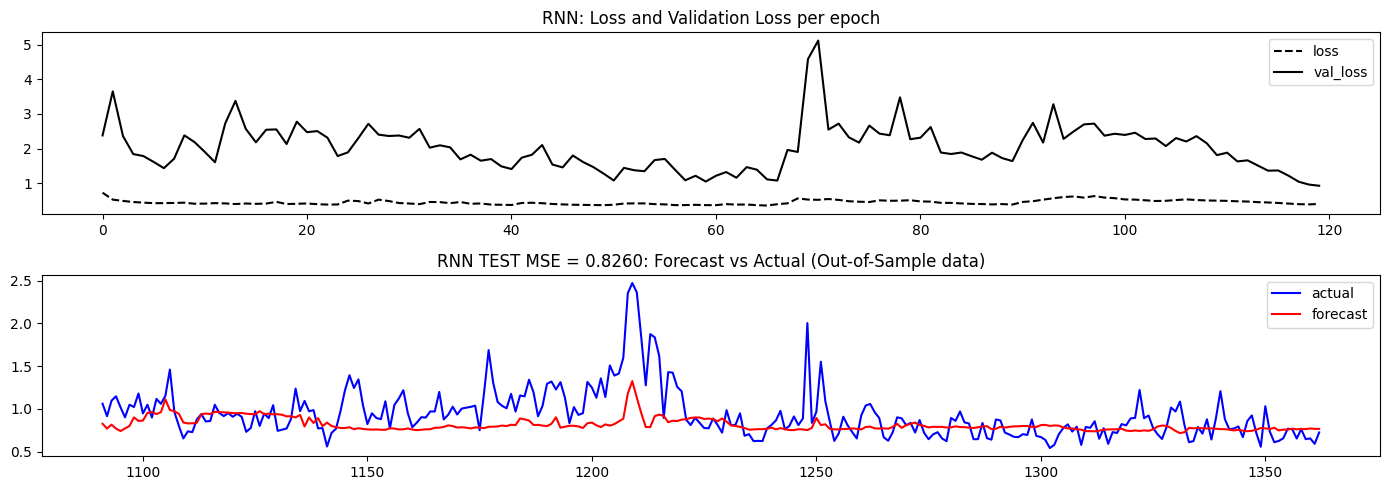

In [72]:

si_normal_rnn, history_normal_rnn = train_model_pt('RNN', **params_si)



## Inference simple RNN



## Inference sanity check first


In [73]:

model = si_normal_rnn


In [74]:


l_real, l_pred = inference_model_pt_2(model, model_type='RNN', **params_si)


0


In [75]:

l_real[:20]


[1.0601666761457278,
 0.9145106390502478,
 1.0963066975379259,
 1.1471282105374239,
 1.0192058473518797,
 0.9014426361286715,
 1.0485954087894744,
 1.0216115647847854,
 1.1800714207050456,
 0.9466170081196404,
 1.0487394842822455,
 0.8986731946157335,
 1.1169999897419403,
 1.0589999725311863,
 1.1539999957887952,
 1.459963077005555,
 0.9642500107094041,
 0.8014138480733514,
 0.6541764731211622,
 0.7371185383025161]

In [76]:

l_pred[:20]


[array([0.9622551], dtype=float32),
 array([0.9847585], dtype=float32),
 array([0.92401], dtype=float32),
 array([0.8857844], dtype=float32),
 array([0.8404754], dtype=float32),
 array([0.8714785], dtype=float32),
 array([0.8775684], dtype=float32),
 array([0.9213051], dtype=float32),
 array([0.9287959], dtype=float32),
 array([0.93899906], dtype=float32),
 array([0.9579692], dtype=float32),
 array([0.97392774], dtype=float32),
 array([0.9259721], dtype=float32),
 array([0.96466815], dtype=float32),
 array([0.95926344], dtype=float32),
 array([0.9194613], dtype=float32),
 array([0.868758], dtype=float32),
 array([0.8875874], dtype=float32),
 array([0.849565], dtype=float32),
 array([0.84015673], dtype=float32)]

In [77]:

## plt.rcParams["figure.figsize"] = [14, 5] 


272


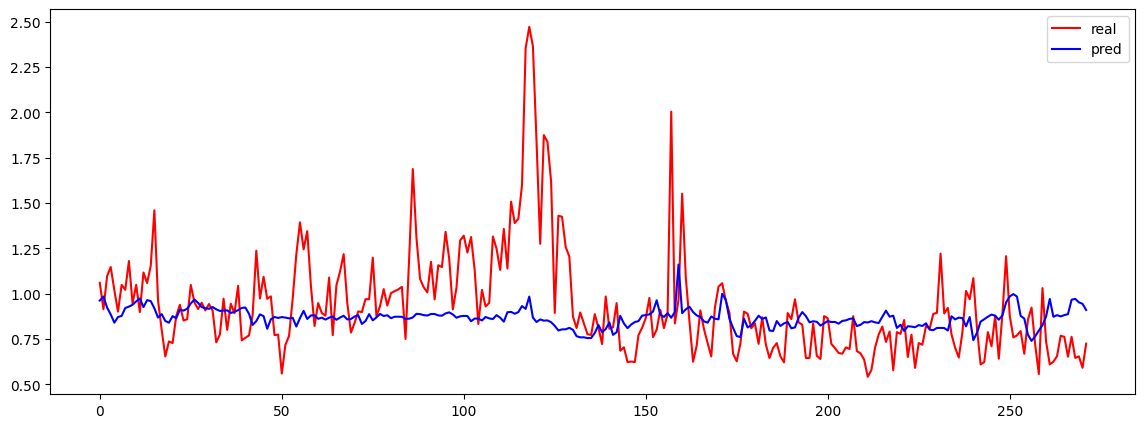

In [78]:


  
# create data 
x = [ i for i in range(len(l_real)) ] 
print(len(x))
  
# plot lines 

plt.plot(x, l_real, label = "real", color='red') 
plt.plot(x, l_pred, label = "pred", color='blue') 
plt.legend() 
plt.show()



## Now run actual INFERENCE to predict x vector and silicon together


In [79]:

model = si_normal_rnn


In [80]:

l_real, l_pred = inference_model_pt(model, model_type='RNN', **params_si)


0


In [81]:

l_real[:20]


[1.0601666761457278,
 0.9145106390502478,
 1.0963066975379259,
 1.1471282105374239,
 1.0192058473518797,
 0.9014426361286715,
 1.0485954087894744,
 1.0216115647847854,
 1.1800714207050456,
 0.9466170081196404,
 1.0487394842822455,
 0.8986731946157335,
 1.1169999897419403,
 1.0589999725311863,
 1.1539999957887952,
 1.459963077005555,
 0.9642500107094041,
 0.8014138480733514,
 0.6541764731211622,
 0.7371185383025161]

In [82]:

l_pred[:20]


[array([0.9622551], dtype=float32),
 array([0.8298682], dtype=float32),
 array([0.78513056], dtype=float32),
 array([0.72643054], dtype=float32),
 array([0.73372793], dtype=float32),
 array([0.72802156], dtype=float32),
 array([0.7175044], dtype=float32),
 array([0.73235244], dtype=float32),
 array([0.7246629], dtype=float32),
 array([0.72134894], dtype=float32),
 array([0.73130995], dtype=float32),
 array([0.7527468], dtype=float32),
 array([0.75925404], dtype=float32),
 array([0.7657301], dtype=float32),
 array([0.77165157], dtype=float32),
 array([0.7929354], dtype=float32),
 array([0.81400925], dtype=float32),
 array([0.82063526], dtype=float32),
 array([0.8284668], dtype=float32),
 array([0.8251877], dtype=float32)]

272


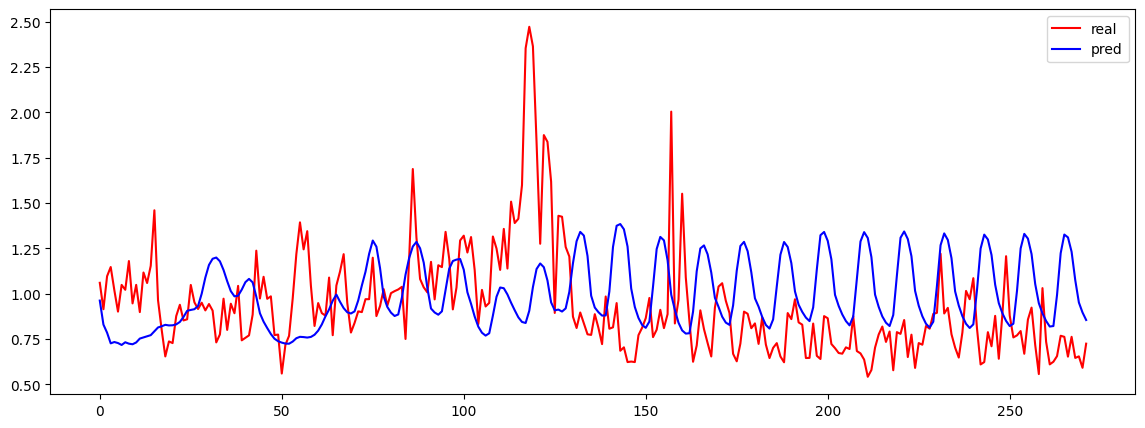

In [83]:

# create data 
x = [ i for i in range(len(l_real)) ] 
print(len(x))
  
# plot lines 

plt.plot(x, l_real, label = "real", color='red') 
plt.plot(x, l_pred, label = "pred", color='blue') 
plt.legend() 
plt.show()



## Break up test set into test bins 

* example
* input is 30 (about 7.5 hours)
* predicts rest of week


In [101]:

model = si_normal_rnn


In [102]:

x_test, y_test   = params_si['test_data']

## l_real, l_pred = bins_inference_model_pt(model, x_test, y_test)




In [ ]:
'''

x_test, y_test   = params_si['test_data']

## l_real, l_pred = bins_inference_model_pt(model, x_test, y_test)

x_test.shape


y_test.shape

x_test_n = x_test[:, :120]

x_test_n.shape


y_test_n = x_test[ :, 120:120+24 ]


y_test_n.shape


x_test = x_test_n
y_test = y_test_n

'''


In [103]:

x_test.shape


torch.Size([272, 480])

In [104]:

y_test.shape


torch.Size([272, 24])

In [105]:

x_test_n = x_test[:, :120]


In [106]:

x_test_n.shape


torch.Size([272, 120])

In [107]:

y_test_n = x_test[ :, 120:120+24 ]


In [108]:

y_test_n.shape


torch.Size([272, 24])

In [109]:

x_test = x_test_n
y_test = y_test_n


In [110]:

x_test.shape


torch.Size([272, 120])

In [111]:

window = 5 

bin_size = int( x_test.shape[0] / window )
bin_size 


54

In [112]:

318/ 30


10.6

In [113]:

bin_size = 20


In [114]:

l_new


['SI_f1',
 'HOST_BLAST_MOISTURE_f3',
 'HOT_BLAST_TMP_NS_f3',
 'NAT_GAS _INJECTION_f3',
 'WINDRATE_f3',
 'HIGH_PURITY_OXYGEN_f3',
 'COAL_FLOW_f3',
 'Cast_Avg_Mn_f2',
 'Slag_Fe_f2',
 'Selec_Top_Gas_CO_f3',
 'Selec_Top_Gas_CO2_f3',
 'Selec_Top_Gas_H2_f3',
 'Selec_Top_Gas_N2_f3',
 'NE_Uptake_f3',
 'SE_Uptake_f3',
 'NW_Uptake_f3',
 'SW_Uptake_f3',
 'Slag_SiO2_f2',
 'Slag_CaO_f2',
 'Slag_MgO_f2',
 'SNORT_VALVE_POSITION_f3',
 'TOP_PRESS_f3',
 'HOT_BLAST_PRESSURE_f3',
 'cokerate_f4']

In [115]:

for i in range(0, y_test.shape[0]- bin_size, bin_size):
    batch_x_test = x_test[i:i+bin_size, :]
    print( batch_x_test.shape )

    batch_y_test = y_test[i:i+bin_size, :]
    print( batch_y_test.shape )
    print("---------------")
    ## for jz in range( vector_n_out ):
    jz = 0
    bins_inference_model_pt( model, batch_x_test, batch_y_test, jz, l_new[jz] )




torch.Size([20, 120])
torch.Size([20, 24])
---------------
0


RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x120 and 480x480)


## LSTM


In [116]:

class LSTM(nn.Module):
    def __init__(self, seq_length, input_size, output_size, n_features, n_layers):
        super(LSTM, self).__init__()
        self.n_layers   = n_layers
        self.hidden_dim = n_features
        self.output_size= output_size
        self.seq_length = seq_length
        self.input_size = input_size

        self.lstm    = nn.LSTM(input_size, n_features, n_layers, batch_first=False)
        self.dropout = nn.Dropout(0.2)
        self.fc      = nn.Linear(n_features, output_size)

        self.Attention  = SelfAttentionLayer( seq_length * input_size )    ## or n_features if after LSTM

        self.fc1     = nn.Linear(n_features, 40)
        self.relu    = nn.ReLU()
        self.fc2     = nn.Linear(40, output_size)
        
    def forward(self, x, hn):

        x2     = self.Attention(x)  
        x2     = x2[0]
        x = x2 + x

        x = x.view(-1, self.seq_length, self.input_size)
        x = x.permute(1, 0, 2)


       
        ## hn is a tuple here of (h0, c0)
        lstm_o, (hn, cn) = self.lstm(x, hn)
    
        lstm_o = self.dropout(lstm_o)

        hn = hn[-1, :, :]

        ## x     = self.Attention(hn)  
        ## x     = x[0]
        ## hn = hn + x

        
        ## output = self.fc( hn )
        
        output    = self.fc1( hn )
        output    = self.relu( output )
        output    = self.dropout(  output  )
        output    = self.fc2( output )
    
        ##                     batch_size, n_classes) 
        output  = output.view( -1,  self.output_size ) 
        
        return output, hn


    def init_hidden(self, batch_size_x_data):
        weight = next(self.parameters()).data
        hidden = ( weight.new(self.n_layers, 1, self.hidden_dim).zero_(),
                   weight.new(self.n_layers, 1, self.hidden_dim).zero_()   )
        N_batches_rc = batch_size_x_data    ## or is this the size of the x set ??
        hidden2 = ( torch.zeros( self.n_layers,   N_batches_rc,    self.hidden_dim ),
                    torch.zeros( self.n_layers,   N_batches_rc,    self.hidden_dim )    )
        return hidden2


0/3000 - Loss:  0.7266831994056702, val_loss: 2.3450965881347656
25/3000 - Loss:  0.491455078125, val_loss: 1.683984637260437
50/3000 - Loss:  0.44820553064346313, val_loss: 1.368714690208435
75/3000 - Loss:  0.42147666215896606, val_loss: 1.300121545791626
100/3000 - Loss:  0.3983142077922821, val_loss: 1.171152114868164
125/3000 - Loss:  0.3770791292190552, val_loss: 1.0682216882705688
150/3000 - Loss:  0.46027544140815735, val_loss: 0.980353593826294
175/3000 - Loss:  0.40678921341896057, val_loss: 1.223701000213623
200/3000 - Loss:  0.4038845896720886, val_loss: 1.208477258682251
225/3000 - Loss:  0.4067516028881073, val_loss: 1.6378307342529297
250/3000 - Loss:  0.3789921998977661, val_loss: 1.4845267534255981
275/3000 - Loss:  0.3596298098564148, val_loss: 1.1397068500518799
300/3000 - Loss:  0.3607974350452423, val_loss: 0.9203358888626099
325/3000 - Loss:  0.3682832419872284, val_loss: 1.006557583808899
350/3000 - Loss:  0.4305393099784851, val_loss: 1.3823572397232056
375/3000

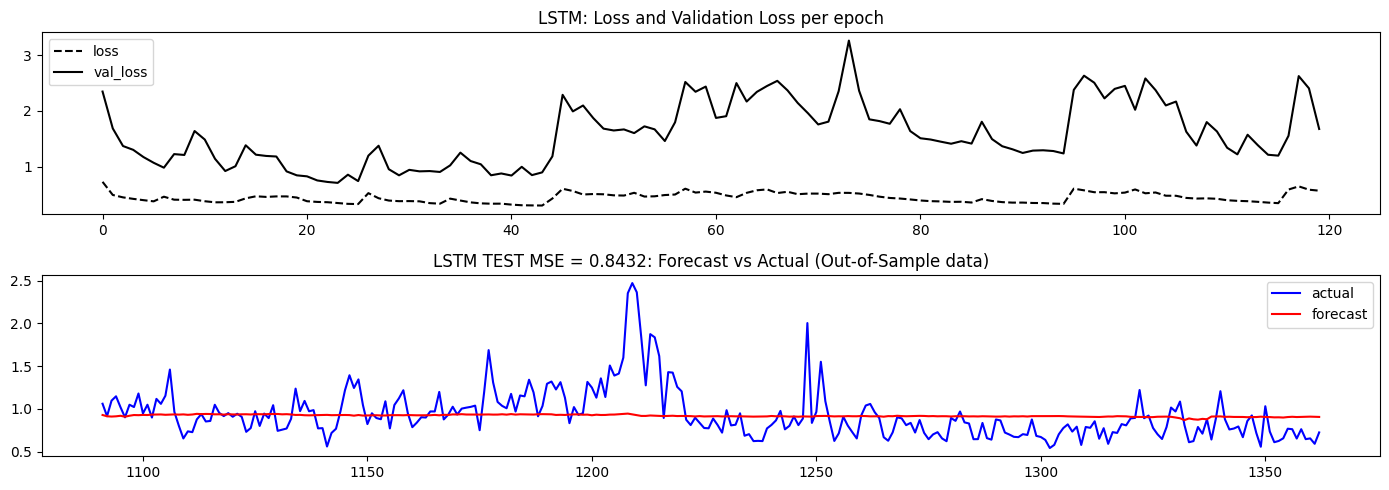

In [117]:

si_lstm, history_a_lstm = train_model_pt('LSTM', **params_si)



## LSTM Inference



## Inference sanity check first


In [118]:

model = si_lstm


In [119]:

l_real, l_pred = inference_model_pt_2(model, model_type='LSTM', **params_si)


0


In [120]:

l_real[:20]


[1.0601666761457278,
 0.9145106390502478,
 1.0963066975379259,
 1.1471282105374239,
 1.0192058473518797,
 0.9014426361286715,
 1.0485954087894744,
 1.0216115647847854,
 1.1800714207050456,
 0.9466170081196404,
 1.0487394842822455,
 0.8986731946157335,
 1.1169999897419403,
 1.0589999725311863,
 1.1539999957887952,
 1.459963077005555,
 0.9642500107094041,
 0.8014138480733514,
 0.6541764731211622,
 0.7371185383025161]

In [121]:

l_pred[:20]


[array([0.9429781], dtype=float32),
 array([0.9168848], dtype=float32),
 array([0.90502024], dtype=float32),
 array([0.89035875], dtype=float32),
 array([0.8923836], dtype=float32),
 array([0.9084801], dtype=float32),
 array([0.9180208], dtype=float32),
 array([0.9013127], dtype=float32),
 array([0.9165508], dtype=float32),
 array([0.9144131], dtype=float32),
 array([0.928644], dtype=float32),
 array([0.93252385], dtype=float32),
 array([0.9458275], dtype=float32),
 array([0.9368831], dtype=float32),
 array([0.94635946], dtype=float32),
 array([0.9397971], dtype=float32),
 array([0.92705166], dtype=float32),
 array([0.9123656], dtype=float32),
 array([0.91694176], dtype=float32),
 array([0.91822475], dtype=float32)]

272


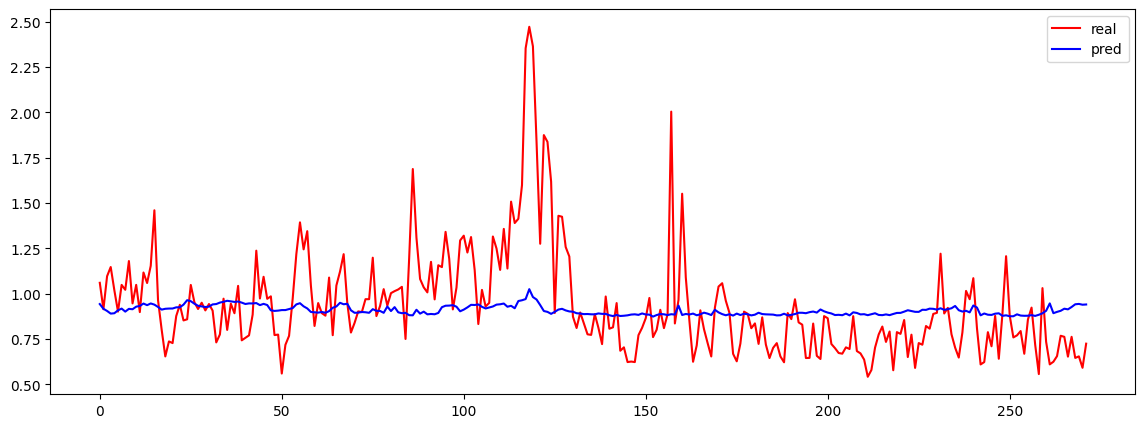

In [122]:

# create data 
x = [ i for i in range(len(l_real)) ] 
print(len(x))
  
# plot lines 

plt.plot(x, l_real, label = "real", color='red') 
plt.plot(x, l_pred, label = "pred", color='blue') 
plt.legend() 
plt.show()



## Now run actual INFERENCE to predict x vector and silicon together


In [123]:

model = si_lstm


In [124]:

l_real, l_pred = inference_model_pt(model, model_type='LSTM', **params_si)


0


In [125]:

l_real[:50]


[1.0601666761457278,
 0.9145106390502478,
 1.0963066975379259,
 1.1471282105374239,
 1.0192058473518797,
 0.9014426361286715,
 1.0485954087894744,
 1.0216115647847854,
 1.1800714207050456,
 0.9466170081196404,
 1.0487394842822455,
 0.8986731946157335,
 1.1169999897419403,
 1.0589999725311863,
 1.1539999957887952,
 1.459963077005555,
 0.9642500107094041,
 0.8014138480733514,
 0.6541764731211622,
 0.7371185383025161,
 0.7278170729866404,
 0.876922477430933,
 0.9390000109090164,
 0.8527525942715569,
 0.8589317382261761,
 1.0482456415545183,
 0.9525810775790822,
 0.915820018407477,
 0.9503839160971697,
 0.9080000131604238,
 0.943144708368914,
 0.906923077459991,
 0.7316078414242292,
 0.7755384835288825,
 0.9726199985391116,
 0.8004740674467857,
 0.9449705852897705,
 0.8923706838492839,
 1.0432205728122281,
 0.7430520482546623,
 0.7566666782752685,
 0.7704999962578123,
 0.884999989864713,
 1.2372499651198856,
 0.9736666846525835,
 1.09324999755041,
 0.971999973960799,
 0.985499994760463,
 0

In [126]:

l_pred[:500]


[array([0.9429781], dtype=float32),
 array([0.91368985], dtype=float32),
 array([0.9088267], dtype=float32),
 array([0.9010825], dtype=float32),
 array([0.89162534], dtype=float32),
 array([0.8926859], dtype=float32),
 array([0.89300823], dtype=float32),
 array([0.8913953], dtype=float32),
 array([0.89210445], dtype=float32),
 array([0.8972434], dtype=float32),
 array([0.89825046], dtype=float32),
 array([0.8978775], dtype=float32),
 array([0.8995141], dtype=float32),
 array([0.89700466], dtype=float32),
 array([0.8922344], dtype=float32),
 array([0.89825124], dtype=float32),
 array([0.90656745], dtype=float32),
 array([0.9230815], dtype=float32),
 array([0.9630299], dtype=float32),
 array([0.91080314], dtype=float32),
 array([0.85323715], dtype=float32),
 array([0.8741535], dtype=float32),
 array([0.9137215], dtype=float32),
 array([0.91375935], dtype=float32),
 array([0.90566856], dtype=float32),
 array([0.90604943], dtype=float32),
 array([0.9100785], dtype=float32),
 array([0.91590

272


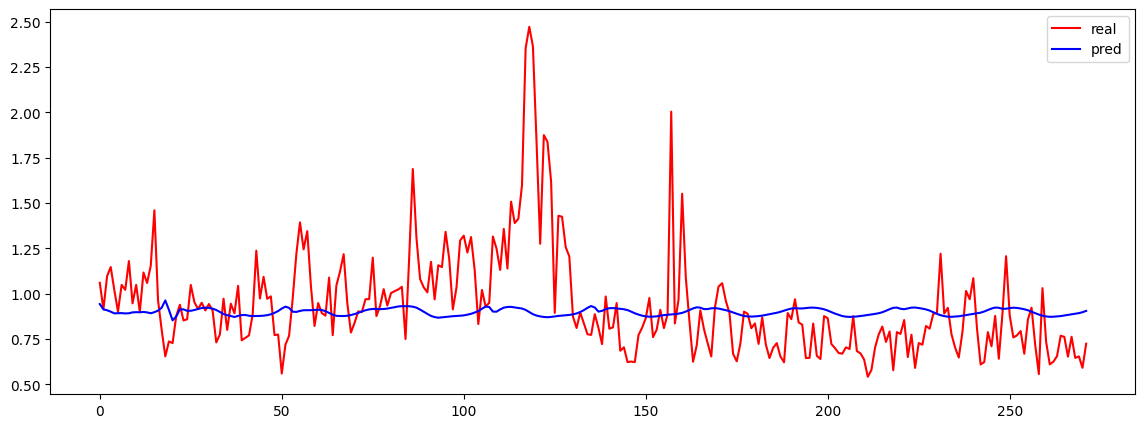

In [127]:

# create data 
x = [ i for i in range(len(l_real)) ] 
print(len(x))
  
# plot lines 

plt.plot(x, l_real, label = "real", color='red') 
plt.plot(x, l_pred, label = "pred", color='blue') 
plt.legend() 
plt.show()



## Break up test set into test bins 

* example
* input is 30 (about 7.5 hours)
* predicts rest of week


In [128]:

model = si_lstm


In [129]:


x_test, y_test   = params_si['test_data']

## l_real, l_pred = bins_inference_model_pt(model, x_test, y_test)



In [130]:

x_test.shape


torch.Size([272, 480])

In [131]:

bin_size = int( x_test.shape[0] / window )
bin_size 


54

In [132]:

bin_size = 20


torch.Size([20, 480])
torch.Size([20, 24])
---------------
0
SI_f1
Test MSE Loss: 0.0406
20


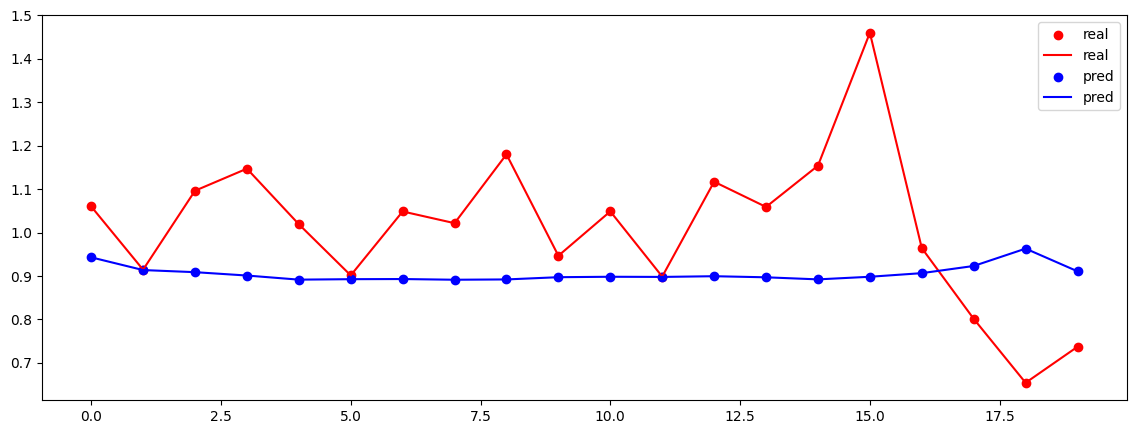

torch.Size([20, 480])
torch.Size([20, 24])
---------------
0
SI_f1
Test MSE Loss: 0.0094
20


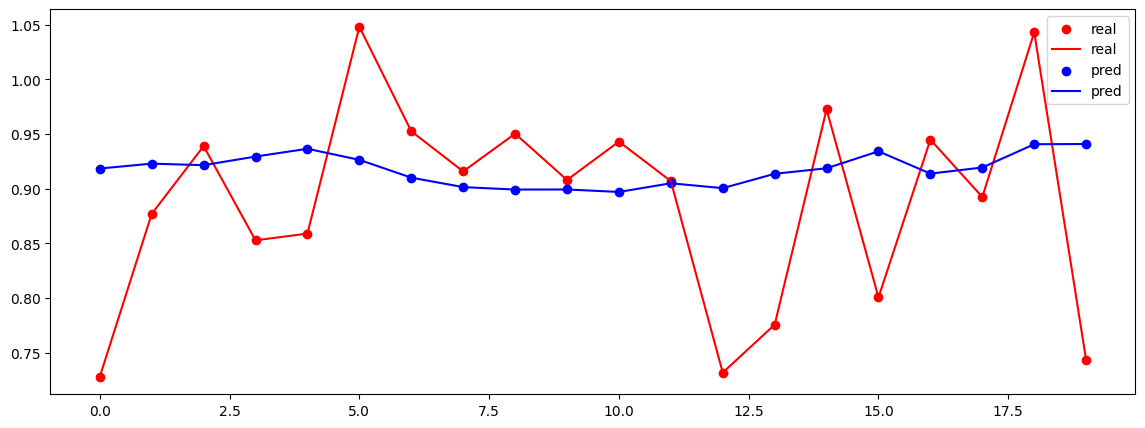

torch.Size([20, 480])
torch.Size([20, 24])
---------------
0
SI_f1
Test MSE Loss: 0.0532
20


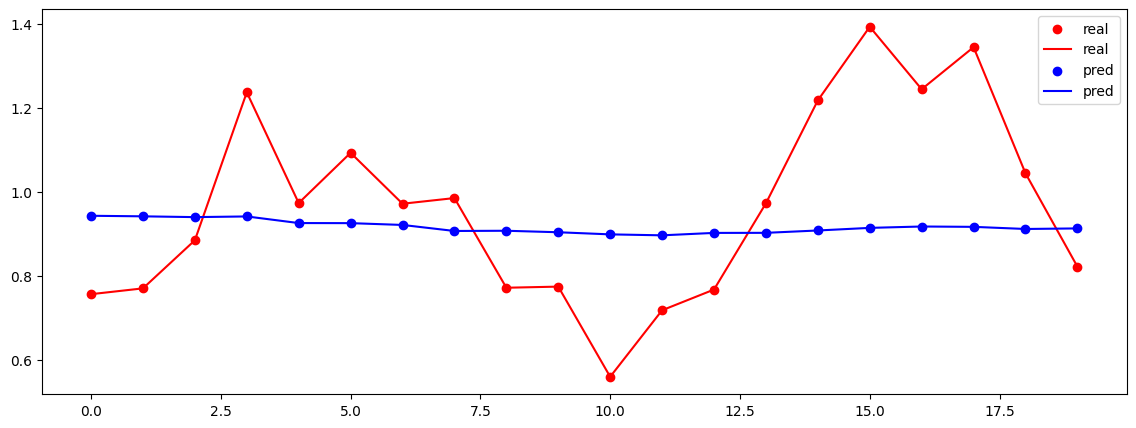

torch.Size([20, 480])
torch.Size([20, 24])
---------------
0
SI_f1
Test MSE Loss: 0.0175
20


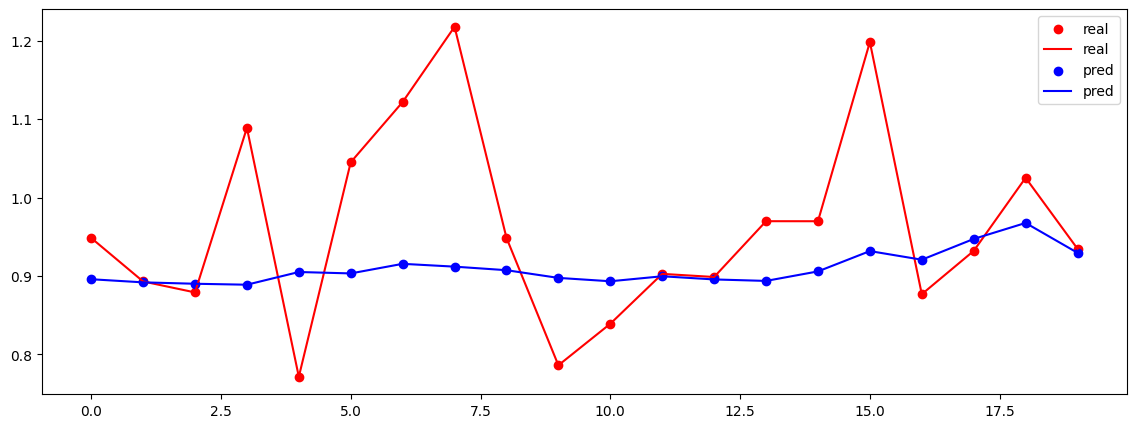

torch.Size([20, 480])
torch.Size([20, 24])
---------------
0
SI_f1
Test MSE Loss: 0.0819
20


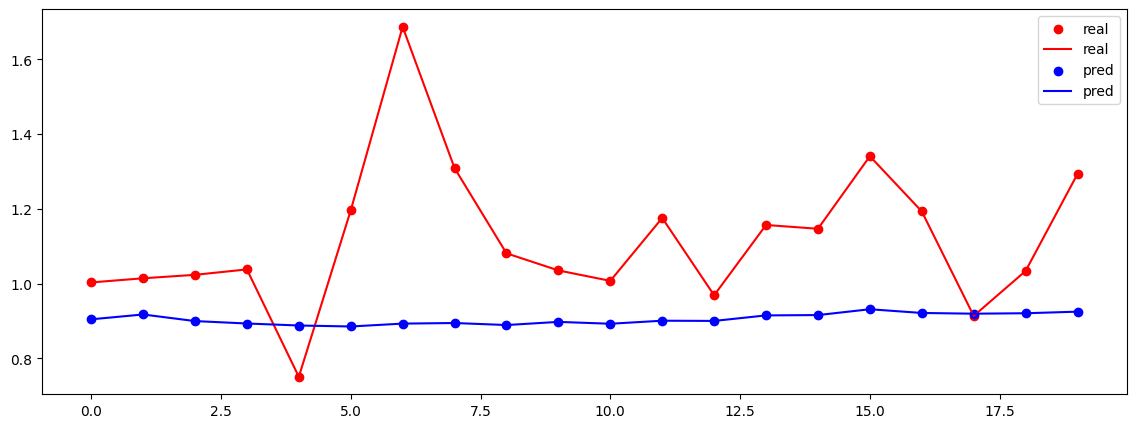

torch.Size([20, 480])
torch.Size([20, 24])
---------------
0
SI_f1
Test MSE Loss: 0.4468
20


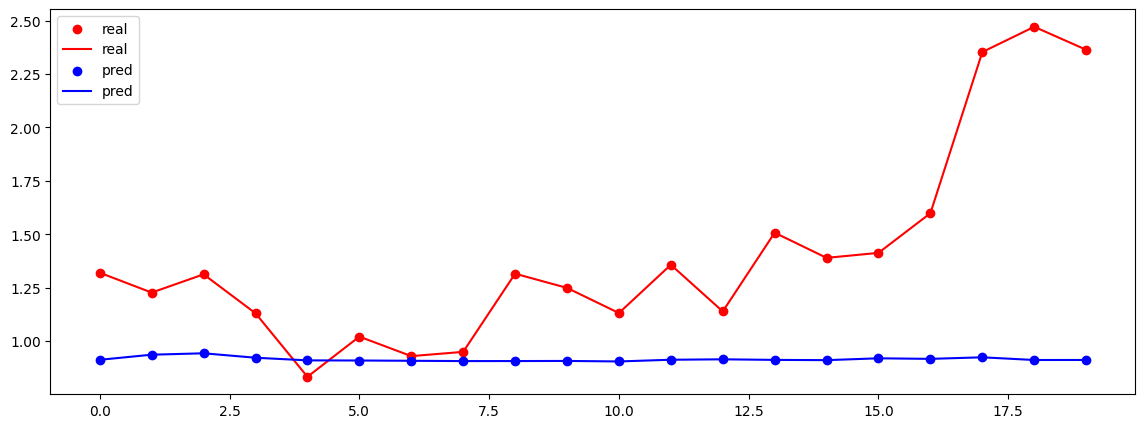

torch.Size([20, 480])
torch.Size([20, 24])
---------------
0
SI_f1
Test MSE Loss: 0.2054
20


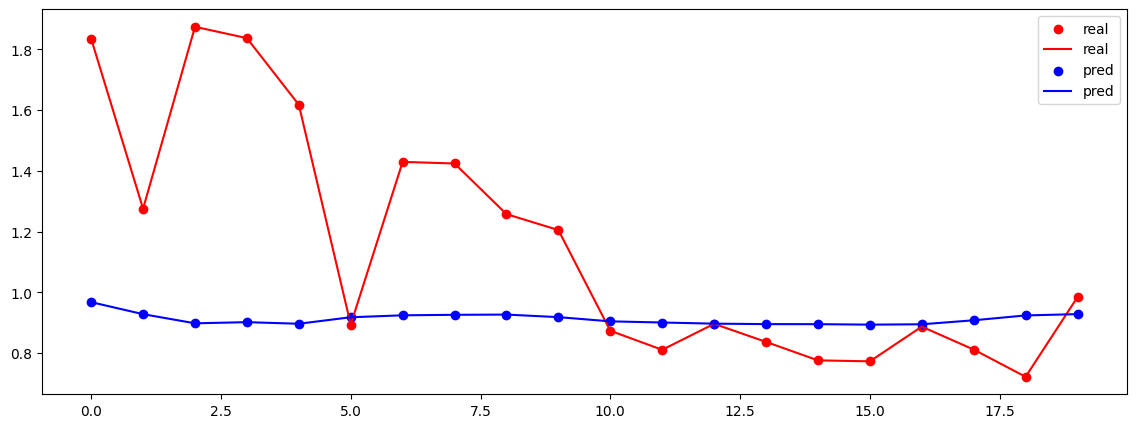

torch.Size([20, 480])
torch.Size([20, 24])
---------------
0
SI_f1
Test MSE Loss: 0.0818
20


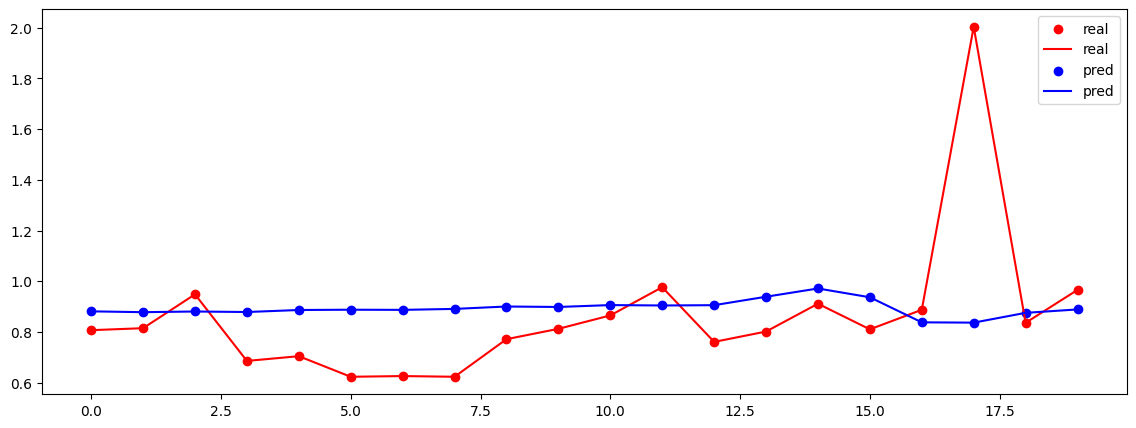

torch.Size([20, 480])
torch.Size([20, 24])
---------------
0
SI_f1
Test MSE Loss: 0.0449
20


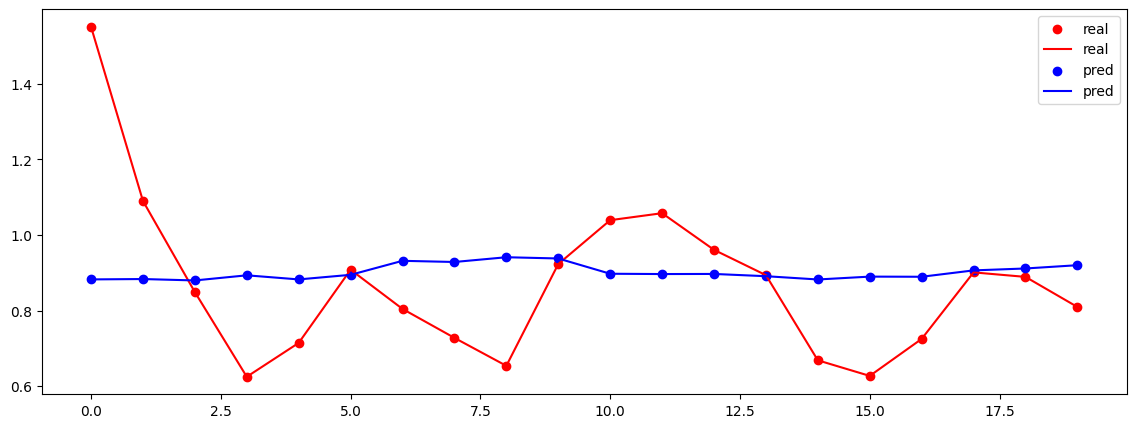

torch.Size([20, 480])
torch.Size([20, 24])
---------------
0
SI_f1
Test MSE Loss: 0.0296
20


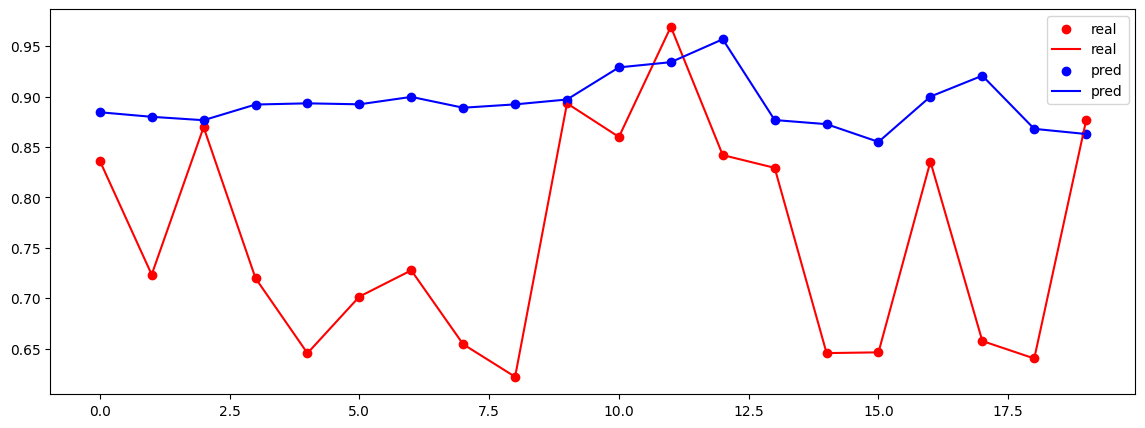

torch.Size([20, 480])
torch.Size([20, 24])
---------------
0
SI_f1
Test MSE Loss: 0.0390
20


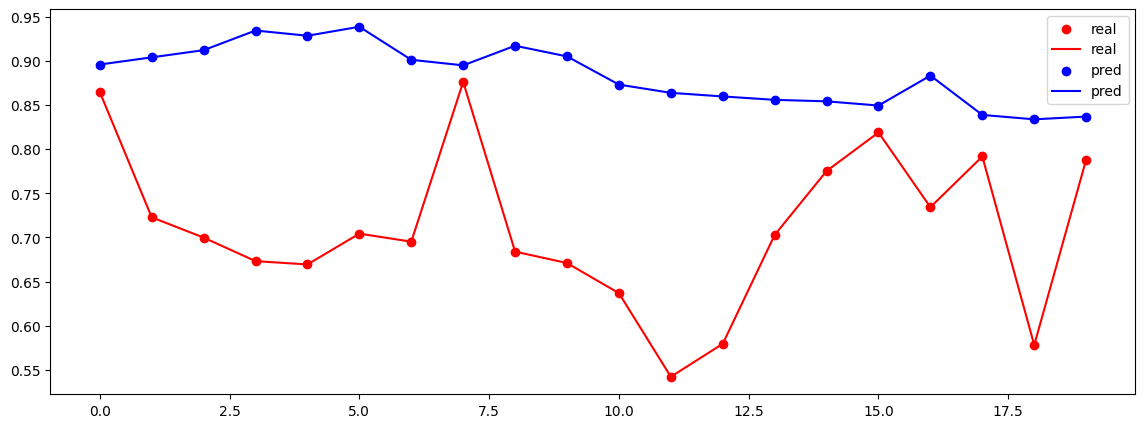

torch.Size([20, 480])
torch.Size([20, 24])
---------------
0
SI_f1
Test MSE Loss: 0.0234
20


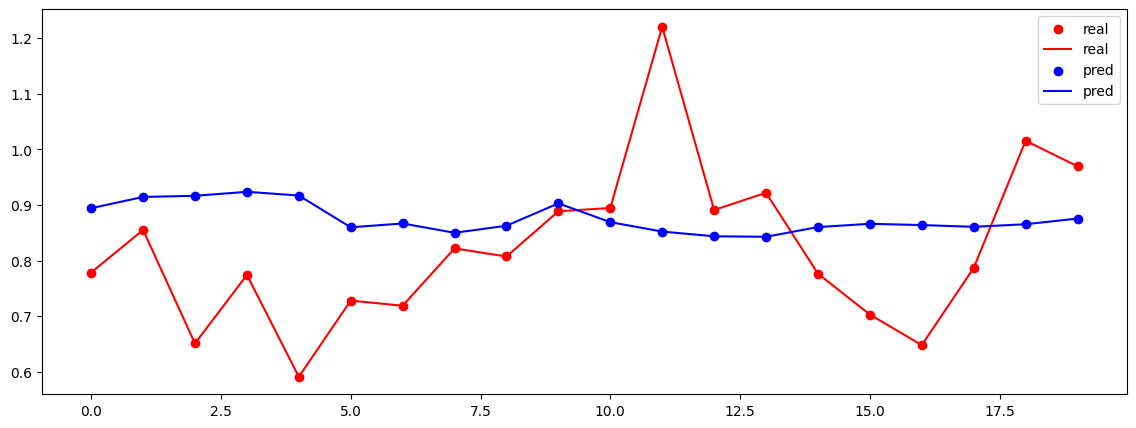

torch.Size([20, 480])
torch.Size([20, 24])
---------------
0
SI_f1
Test MSE Loss: 0.0325
20


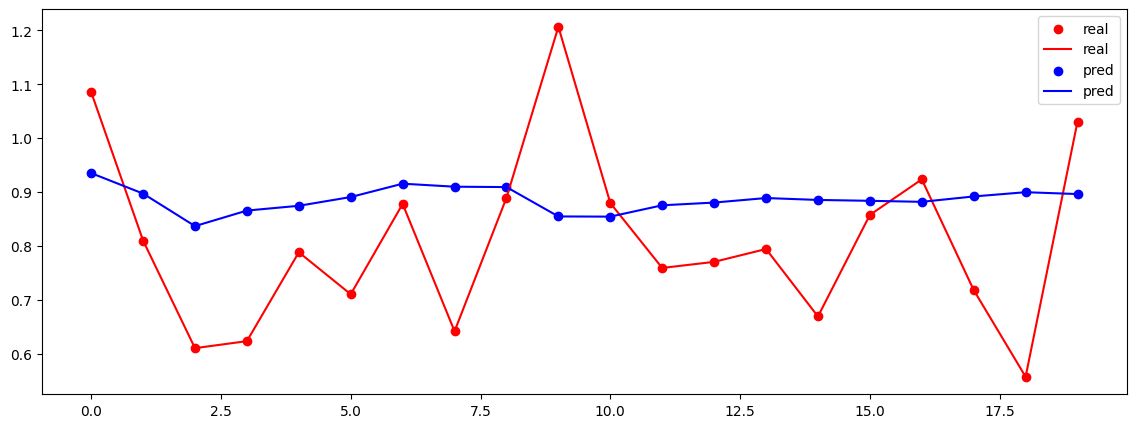

In [133]:



for i in range(0, y_test.shape[0]- bin_size, bin_size):
    batch_x_test = x_test[i:i+bin_size, :]
    print( batch_x_test.shape )

    batch_y_test = y_test[i:i+bin_size, :]
    print( batch_y_test.shape )
    print("---------------")
    ## for jz in range( vector_n_out ):
    jz = 0
    bins_inference_model_pt( model, batch_x_test, batch_y_test, jz, l_new[jz] )



## View all predicted Xs


In [134]:


            
            
def View_all_predicted_Xs(x_index, model, model_type='RNN', **kwargs):
 
    x_test, y_test   = kwargs['test_data']
 
    ## Prediction
    model.eval()
    with torch.no_grad():
        h0    = model.init_hidden( x_test.shape[0] )
        y_hat = model(x_test, h0)
        
    y_hat, _ = y_hat
 
    ## Plotting
    fig, ax = plt.subplots(2, 1) 
    
    ax[0].set_title(f"{model_type} TEST MSE = {0:.4f}: Forecast vs Actual (Out-of-Sample data)")
    scale = kwargs['scale']
    print("ricardo check this")
    print(y_test.shape)
    print(y_hat.shape )
    actual = scale.inverse_y(y_test.detach().numpy() ) ## .ravel() )
    pred   = scale.inverse_y( y_hat.detach().numpy() ) ## .ravel() )
    idx = kwargs['idx']
    ##pd.Series(actual, index=idx).plot(style='k--', label='actual', alpha=0.65, color='blue')
    ##pd.Series(pred,   index=idx).plot(style='k',   label='forecast' , color='red')
    print(actual.shape)
    print(pred.shape)
    actual = actual[:, x_index]
    pred   =   pred[:, x_index]
    
    pd.Series(pred,   index=idx).plot( label='forecast' , color='red' )
    pd.Series(actual, index=idx).plot( label='actual',    color='blue')
    
    fig.tight_layout()
    ax[1].legend(); plt.show()
    
    return 0, 0
    
           

            



ricardo check this
torch.Size([272, 24])
torch.Size([272, 24])
(504,)
(504,)
(24,)
(24,)
(272, 24)
(1, 24)
(1, 24)
(504,)
(504,)
(24,)
(24,)
(272, 24)
(1, 24)
(1, 24)
(272, 24)
(272, 24)


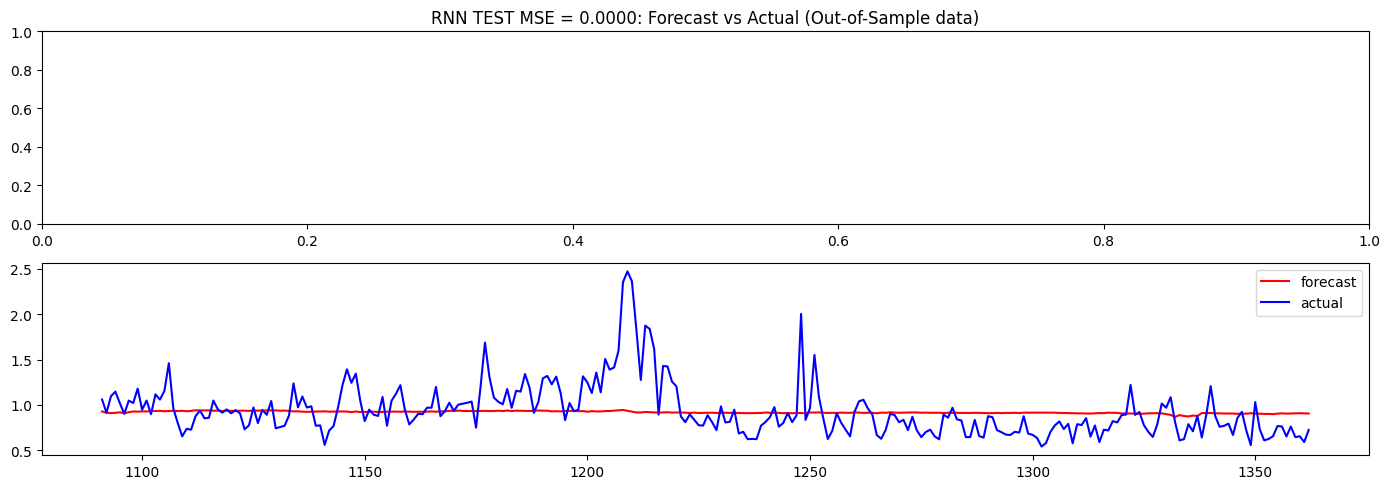

ricardo check this
torch.Size([272, 24])
torch.Size([272, 24])
(504,)
(504,)
(24,)
(24,)
(272, 24)
(1, 24)
(1, 24)
(504,)
(504,)
(24,)
(24,)
(272, 24)
(1, 24)
(1, 24)
(272, 24)
(272, 24)


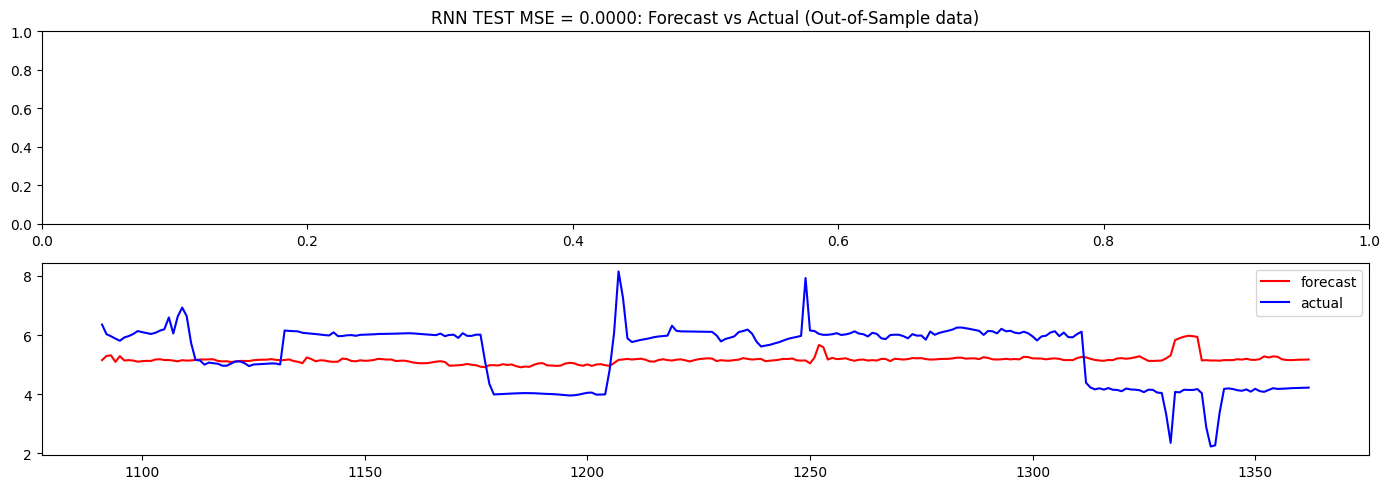

ricardo check this
torch.Size([272, 24])
torch.Size([272, 24])
(504,)
(504,)
(24,)
(24,)
(272, 24)
(1, 24)
(1, 24)
(504,)
(504,)
(24,)
(24,)
(272, 24)
(1, 24)
(1, 24)
(272, 24)
(272, 24)


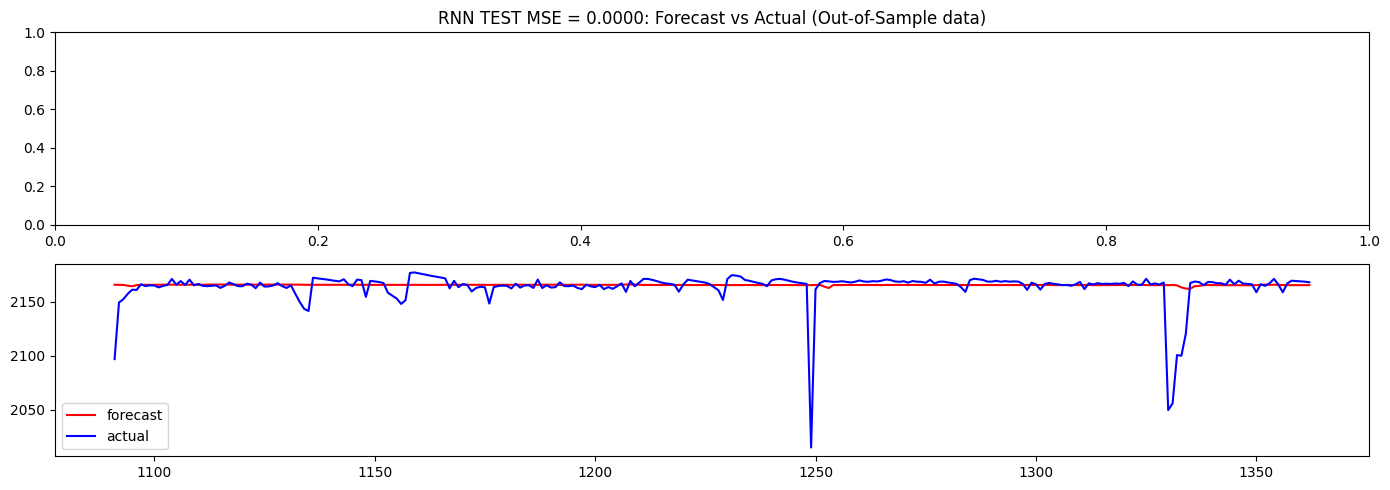

ricardo check this
torch.Size([272, 24])
torch.Size([272, 24])
(504,)
(504,)
(24,)
(24,)
(272, 24)
(1, 24)
(1, 24)
(504,)
(504,)
(24,)
(24,)
(272, 24)
(1, 24)
(1, 24)
(272, 24)
(272, 24)


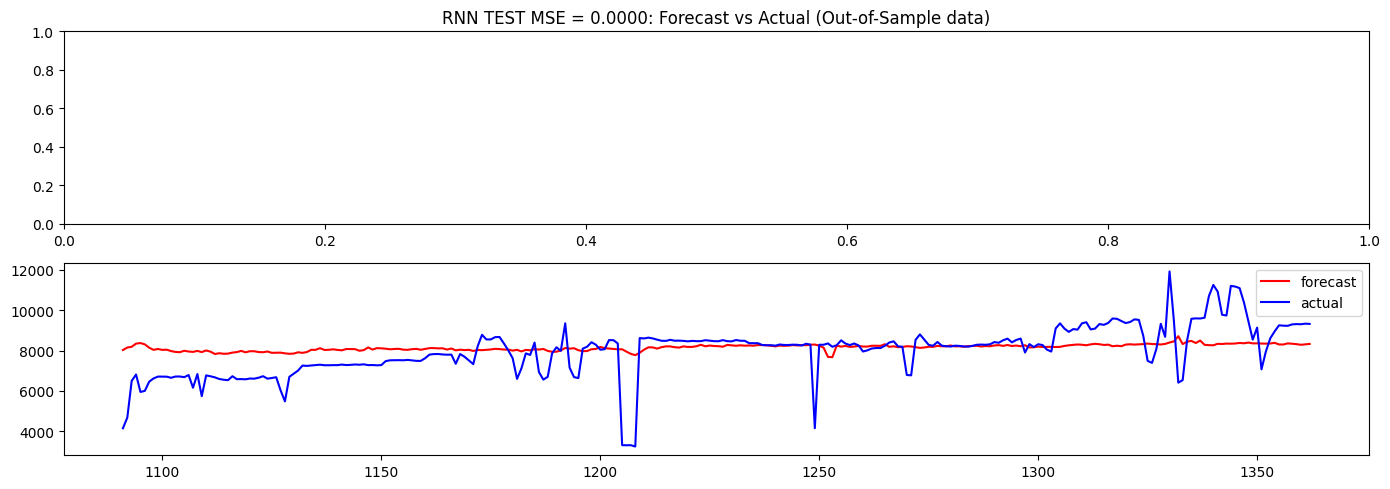

ricardo check this
torch.Size([272, 24])
torch.Size([272, 24])
(504,)
(504,)
(24,)
(24,)
(272, 24)
(1, 24)
(1, 24)
(504,)
(504,)
(24,)
(24,)
(272, 24)
(1, 24)
(1, 24)
(272, 24)
(272, 24)


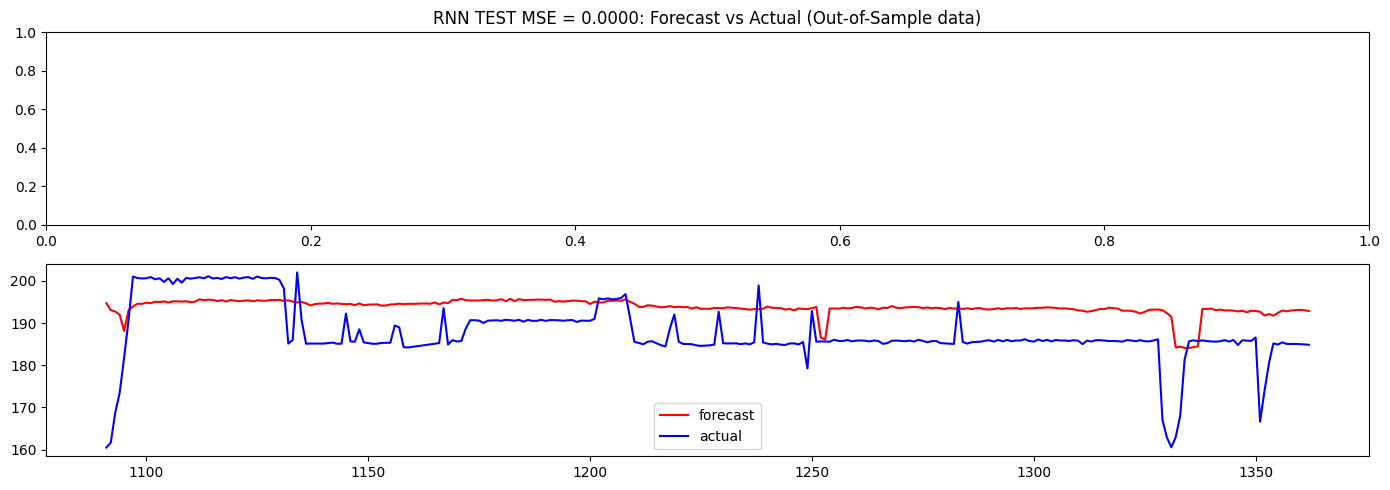

ricardo check this
torch.Size([272, 24])
torch.Size([272, 24])
(504,)
(504,)
(24,)
(24,)
(272, 24)
(1, 24)
(1, 24)
(504,)
(504,)
(24,)
(24,)
(272, 24)
(1, 24)
(1, 24)
(272, 24)
(272, 24)


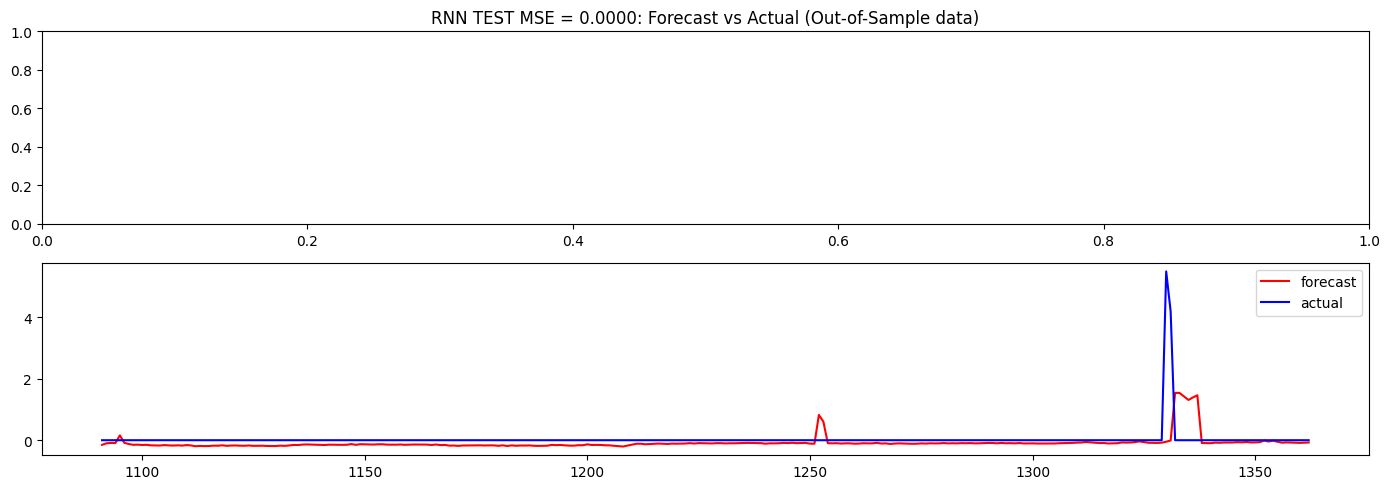

ricardo check this
torch.Size([272, 24])
torch.Size([272, 24])
(504,)
(504,)
(24,)
(24,)
(272, 24)
(1, 24)
(1, 24)
(504,)
(504,)
(24,)
(24,)
(272, 24)
(1, 24)
(1, 24)
(272, 24)
(272, 24)


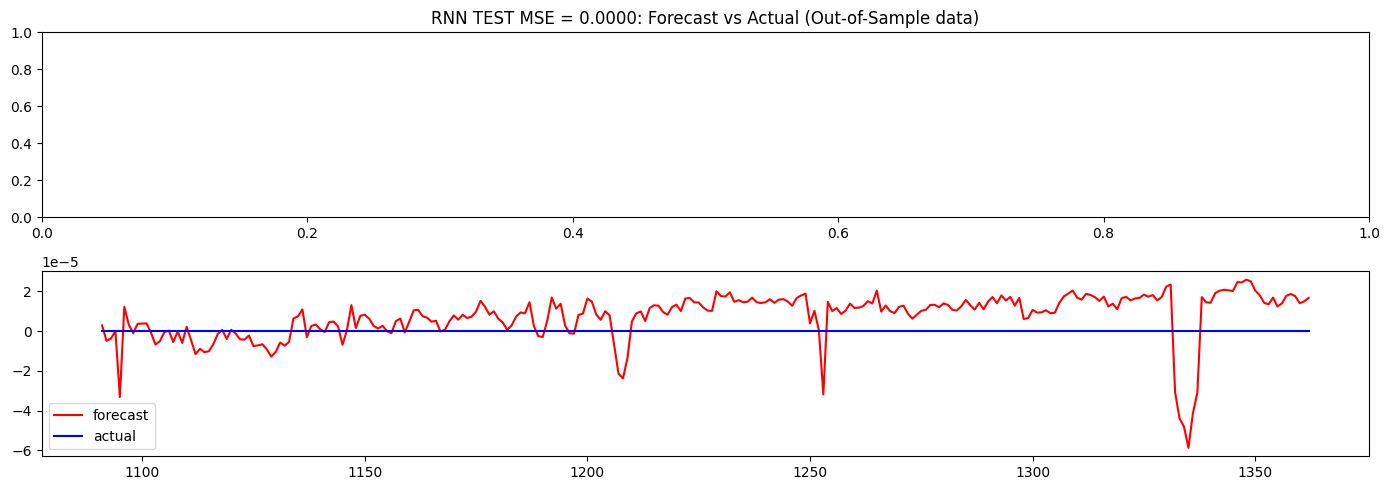

ricardo check this
torch.Size([272, 24])
torch.Size([272, 24])
(504,)
(504,)
(24,)
(24,)
(272, 24)
(1, 24)
(1, 24)
(504,)
(504,)
(24,)
(24,)
(272, 24)
(1, 24)
(1, 24)
(272, 24)
(272, 24)


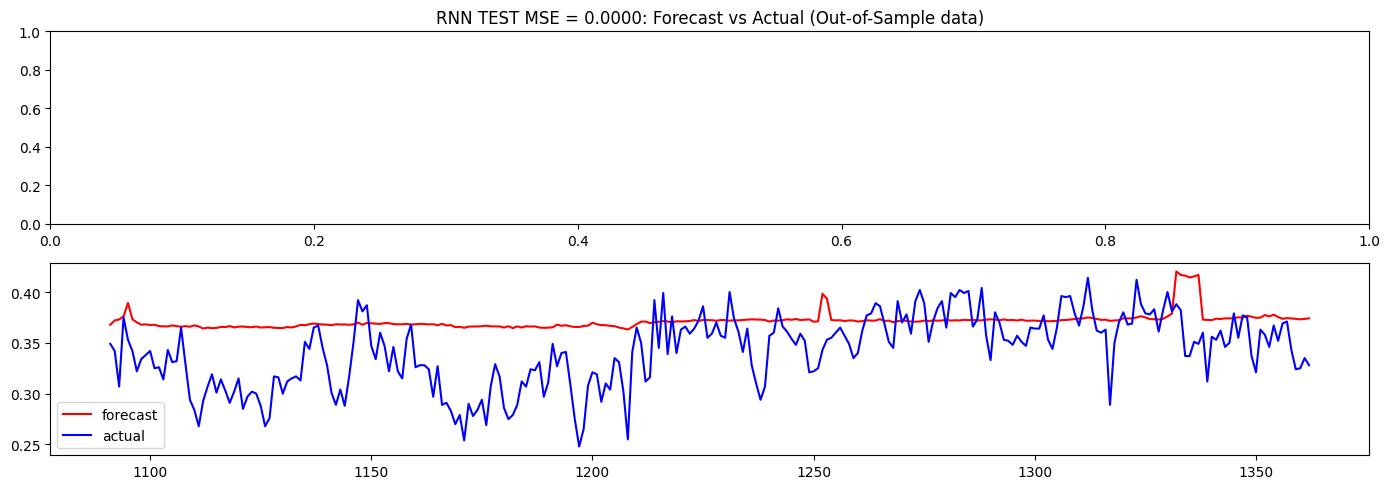

ricardo check this
torch.Size([272, 24])
torch.Size([272, 24])
(504,)
(504,)
(24,)
(24,)
(272, 24)
(1, 24)
(1, 24)
(504,)
(504,)
(24,)
(24,)
(272, 24)
(1, 24)
(1, 24)
(272, 24)
(272, 24)


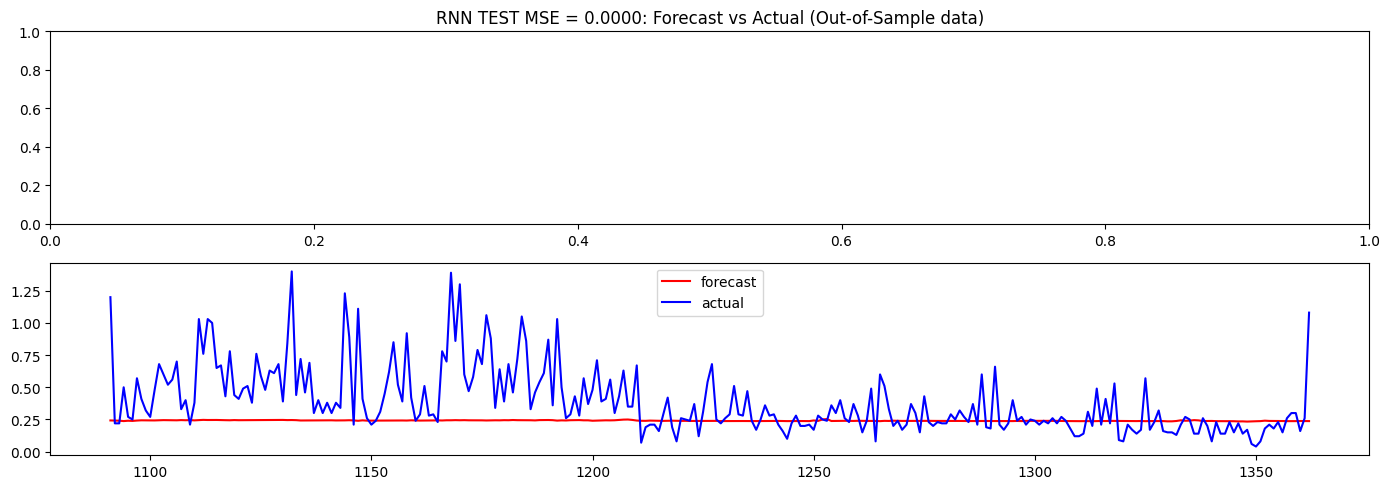

ricardo check this
torch.Size([272, 24])
torch.Size([272, 24])
(504,)
(504,)
(24,)
(24,)
(272, 24)
(1, 24)
(1, 24)
(504,)
(504,)
(24,)
(24,)
(272, 24)
(1, 24)
(1, 24)
(272, 24)
(272, 24)


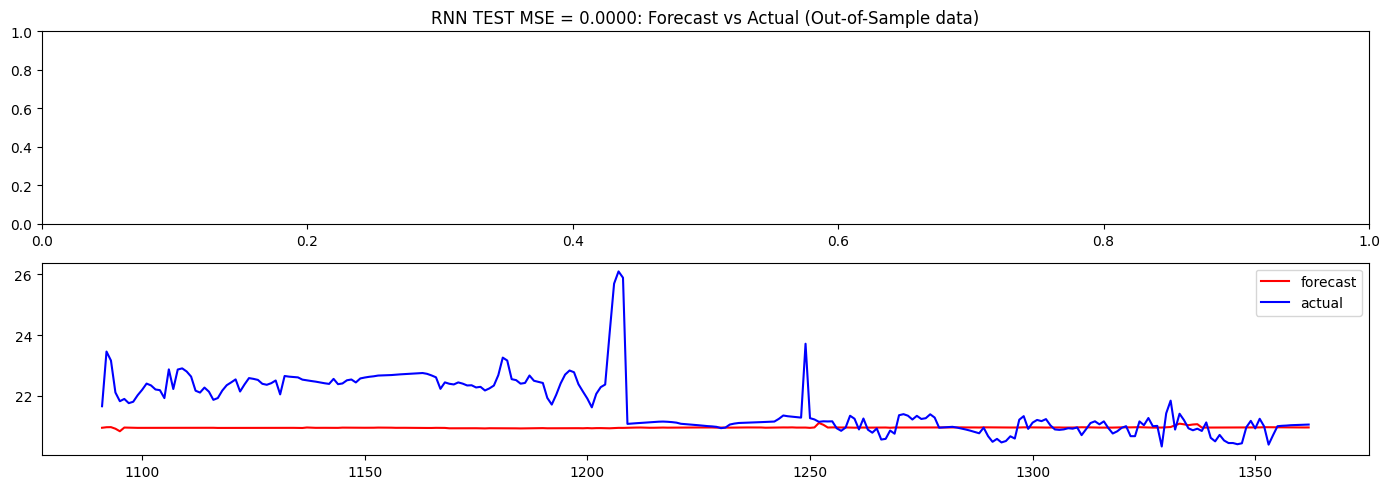

ricardo check this
torch.Size([272, 24])
torch.Size([272, 24])
(504,)
(504,)
(24,)
(24,)
(272, 24)
(1, 24)
(1, 24)
(504,)
(504,)
(24,)
(24,)
(272, 24)
(1, 24)
(1, 24)
(272, 24)
(272, 24)


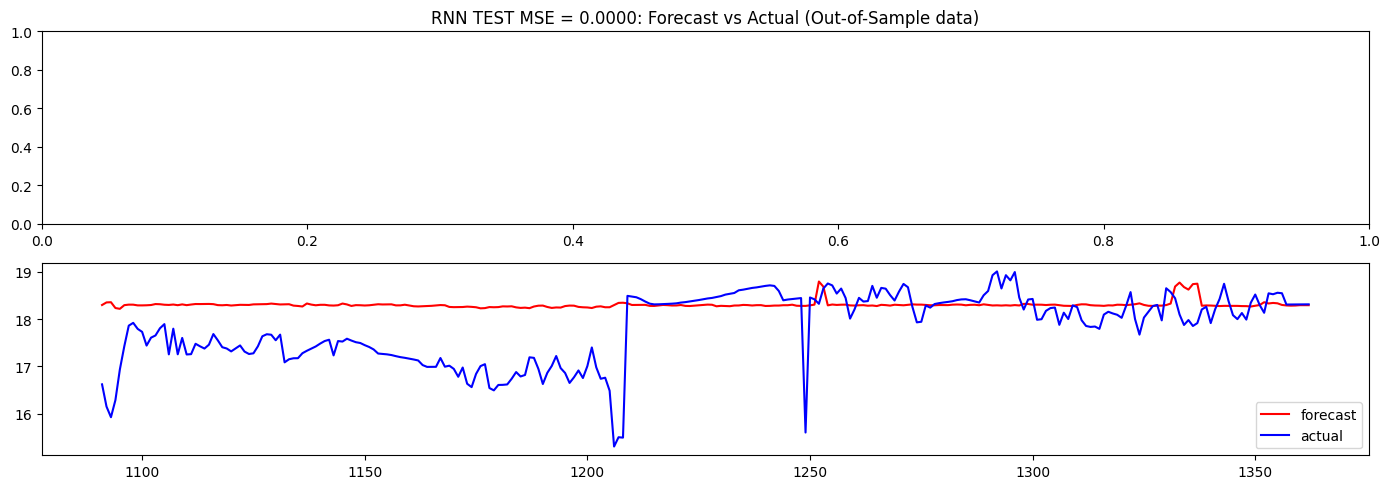

ricardo check this
torch.Size([272, 24])
torch.Size([272, 24])
(504,)
(504,)
(24,)
(24,)
(272, 24)
(1, 24)
(1, 24)
(504,)
(504,)
(24,)
(24,)
(272, 24)
(1, 24)
(1, 24)
(272, 24)
(272, 24)


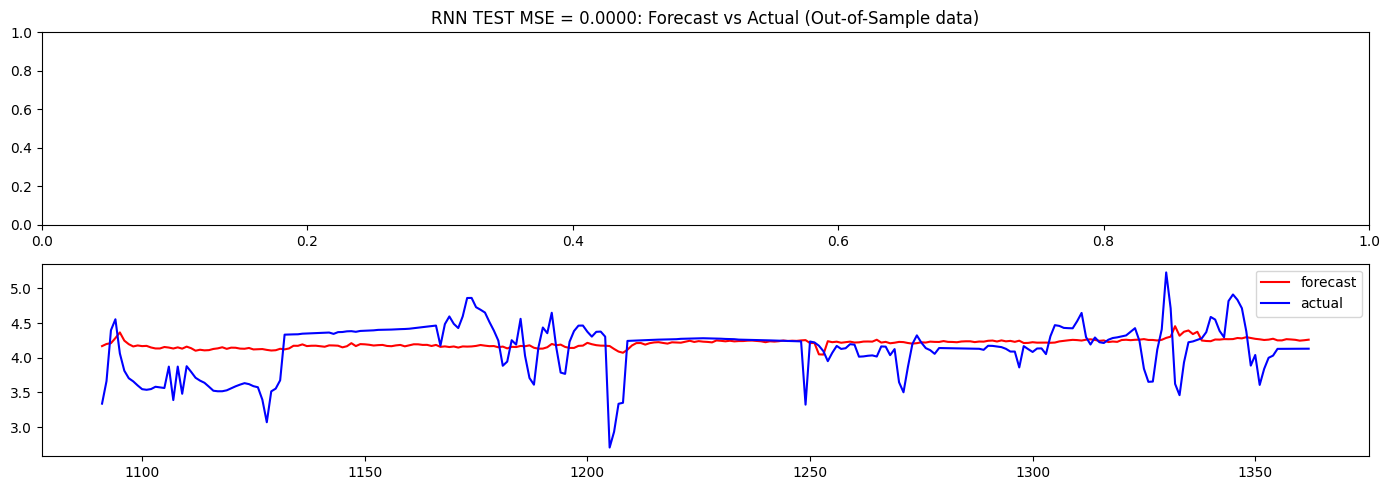

ricardo check this
torch.Size([272, 24])
torch.Size([272, 24])
(504,)
(504,)
(24,)
(24,)
(272, 24)
(1, 24)
(1, 24)
(504,)
(504,)
(24,)
(24,)
(272, 24)
(1, 24)
(1, 24)
(272, 24)
(272, 24)


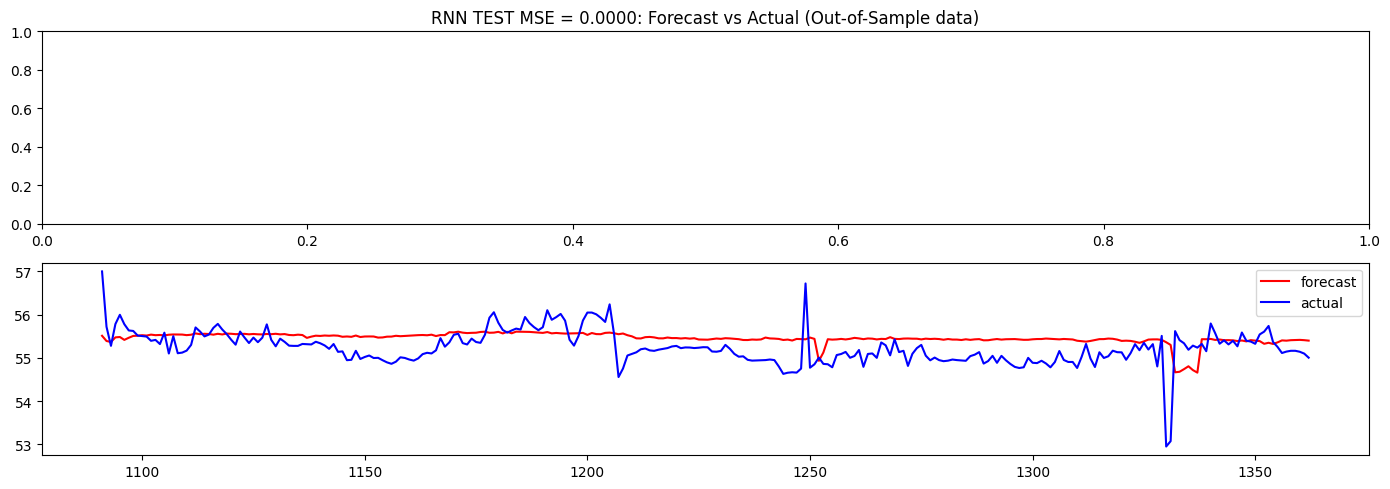

ricardo check this
torch.Size([272, 24])
torch.Size([272, 24])
(504,)
(504,)
(24,)
(24,)
(272, 24)
(1, 24)
(1, 24)
(504,)
(504,)
(24,)
(24,)
(272, 24)
(1, 24)
(1, 24)
(272, 24)
(272, 24)


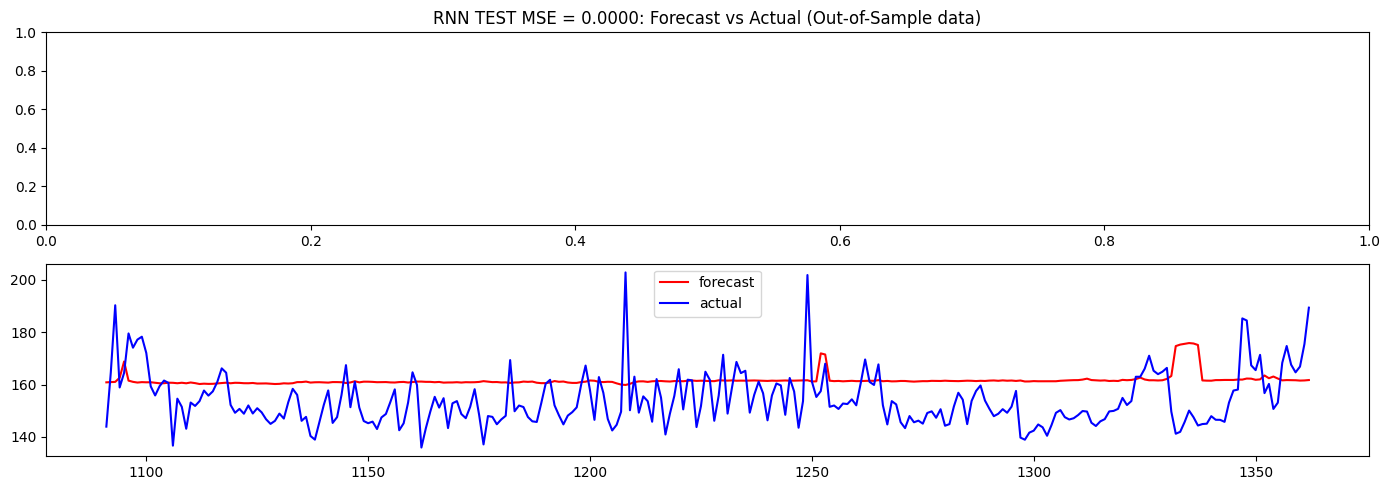

ricardo check this
torch.Size([272, 24])
torch.Size([272, 24])
(504,)
(504,)
(24,)
(24,)
(272, 24)
(1, 24)
(1, 24)
(504,)
(504,)
(24,)
(24,)
(272, 24)
(1, 24)
(1, 24)
(272, 24)
(272, 24)


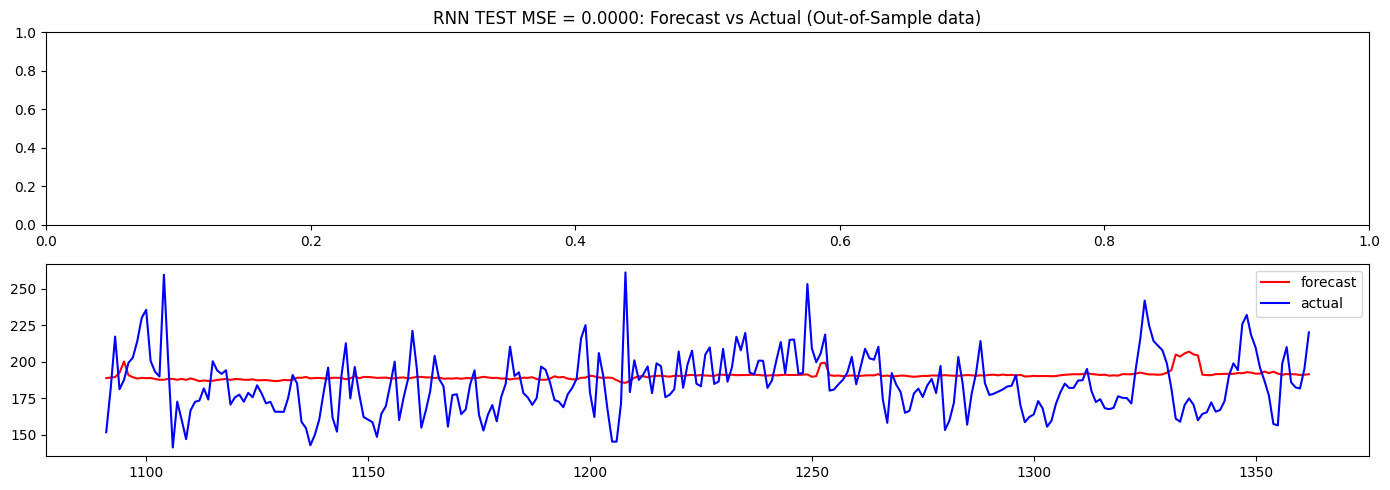

ricardo check this
torch.Size([272, 24])
torch.Size([272, 24])
(504,)
(504,)
(24,)
(24,)
(272, 24)
(1, 24)
(1, 24)
(504,)
(504,)
(24,)
(24,)
(272, 24)
(1, 24)
(1, 24)
(272, 24)
(272, 24)


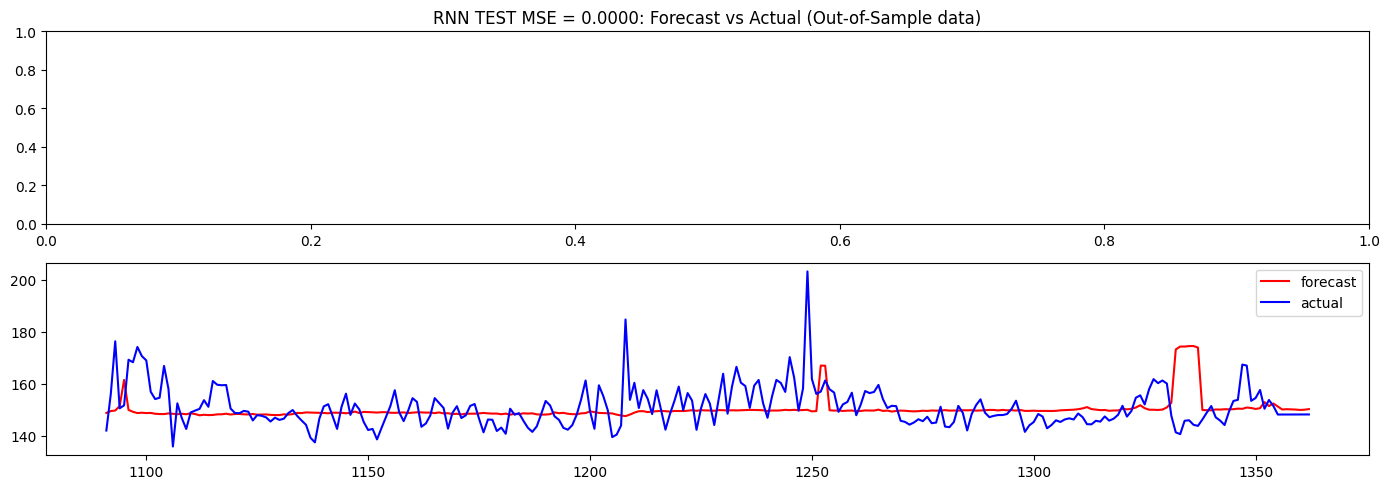

ricardo check this
torch.Size([272, 24])
torch.Size([272, 24])
(504,)
(504,)
(24,)
(24,)
(272, 24)
(1, 24)
(1, 24)
(504,)
(504,)
(24,)
(24,)
(272, 24)
(1, 24)
(1, 24)
(272, 24)
(272, 24)


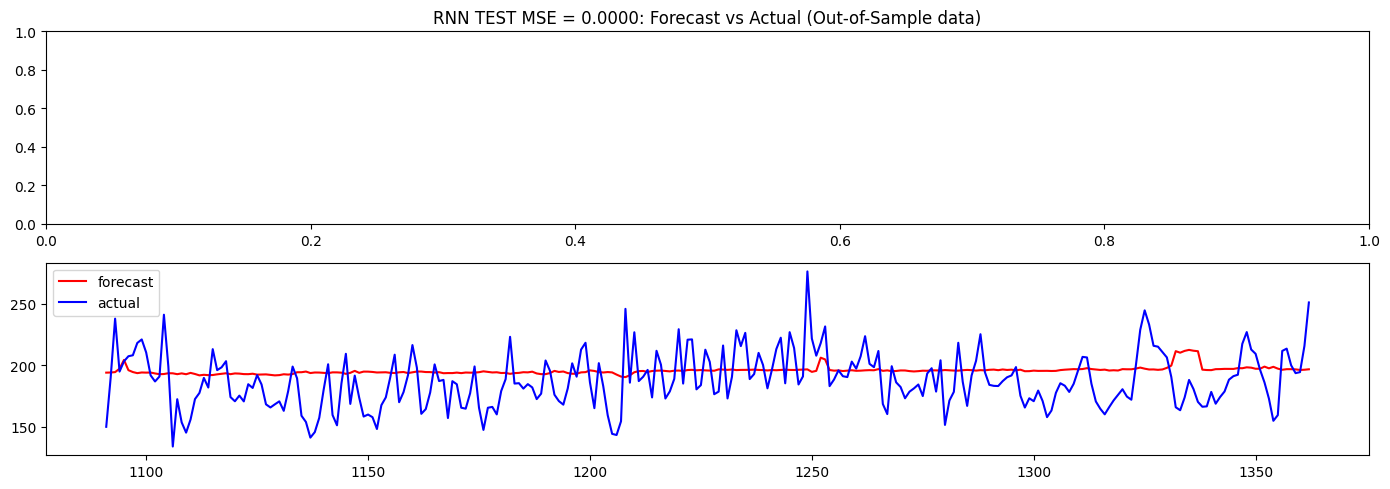

ricardo check this
torch.Size([272, 24])
torch.Size([272, 24])
(504,)
(504,)
(24,)
(24,)
(272, 24)
(1, 24)
(1, 24)
(504,)
(504,)
(24,)
(24,)
(272, 24)
(1, 24)
(1, 24)
(272, 24)
(272, 24)


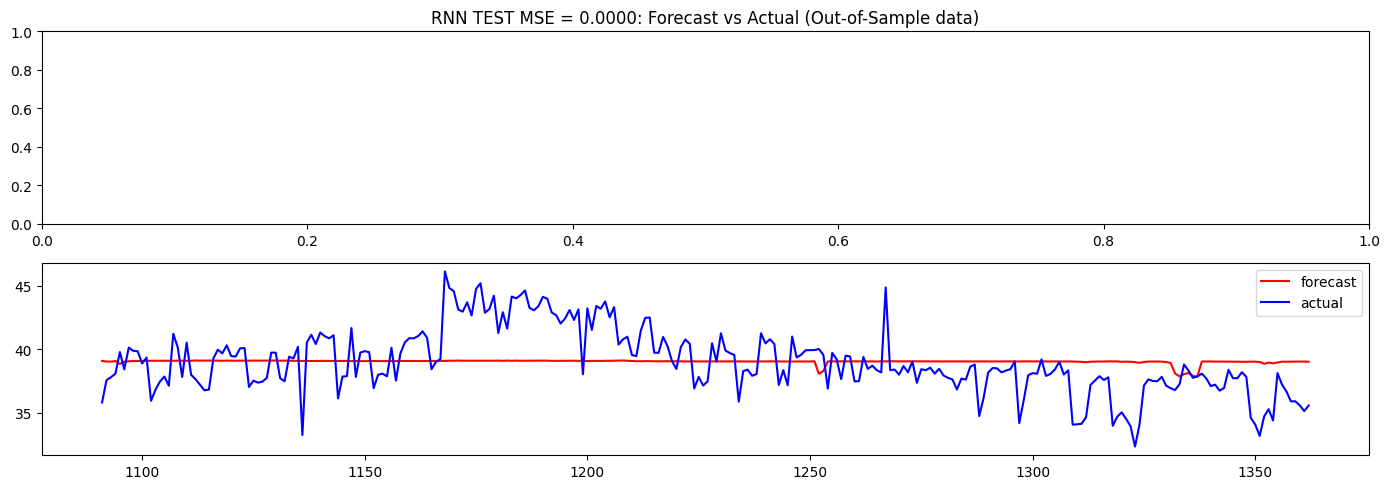

ricardo check this
torch.Size([272, 24])
torch.Size([272, 24])
(504,)
(504,)
(24,)
(24,)
(272, 24)
(1, 24)
(1, 24)
(504,)
(504,)
(24,)
(24,)
(272, 24)
(1, 24)
(1, 24)
(272, 24)
(272, 24)


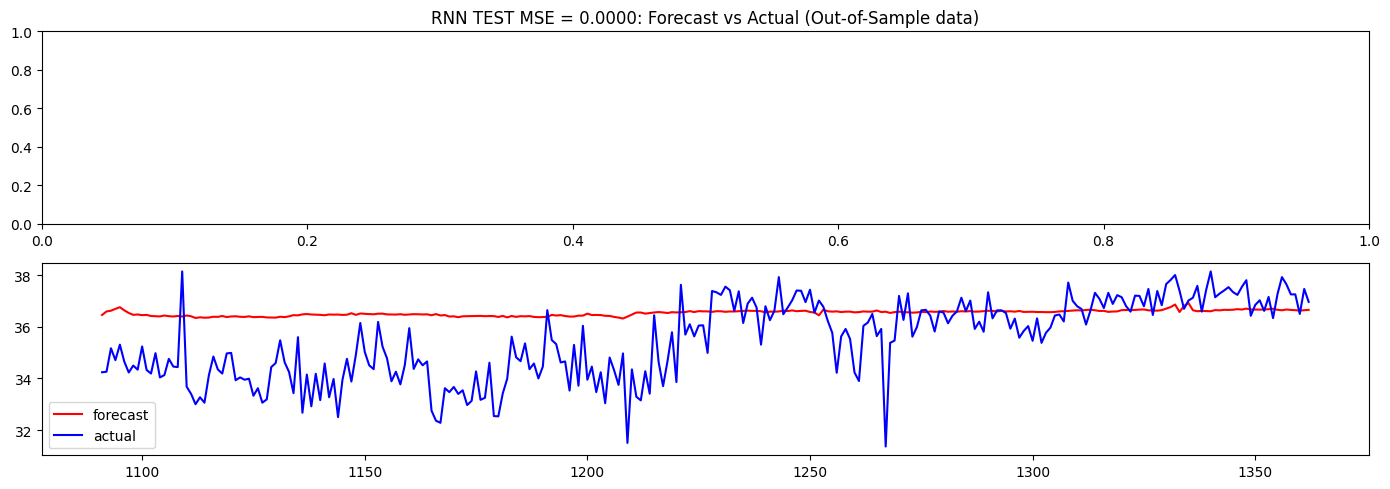

ricardo check this
torch.Size([272, 24])
torch.Size([272, 24])
(504,)
(504,)
(24,)
(24,)
(272, 24)
(1, 24)
(1, 24)
(504,)
(504,)
(24,)
(24,)
(272, 24)
(1, 24)
(1, 24)
(272, 24)
(272, 24)


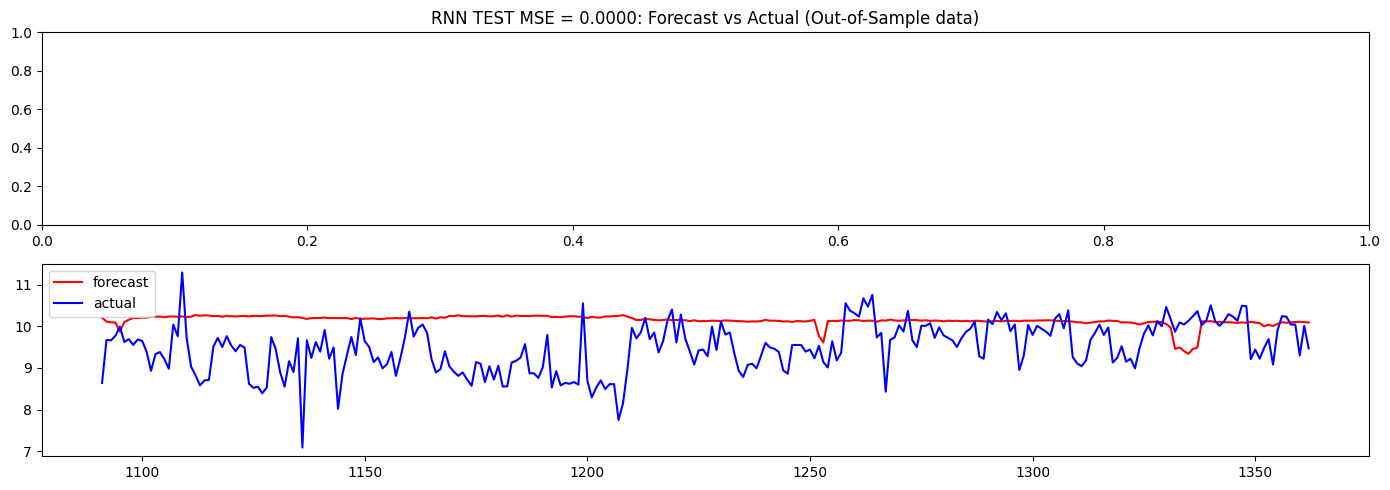

ricardo check this
torch.Size([272, 24])
torch.Size([272, 24])
(504,)
(504,)
(24,)
(24,)
(272, 24)
(1, 24)
(1, 24)
(504,)
(504,)
(24,)
(24,)
(272, 24)
(1, 24)
(1, 24)
(272, 24)
(272, 24)


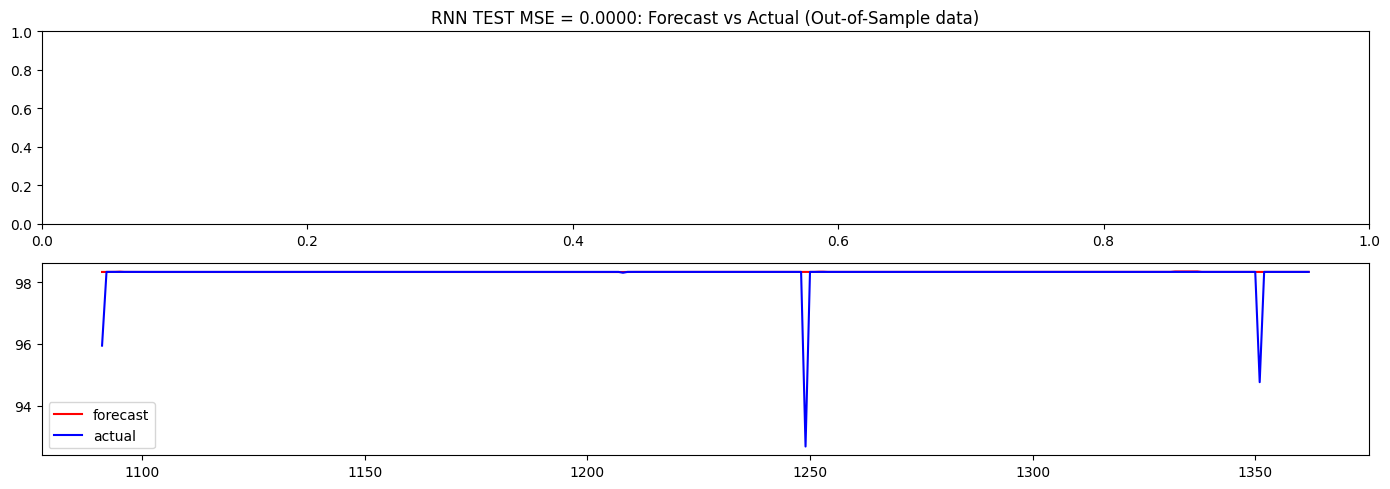

ricardo check this
torch.Size([272, 24])
torch.Size([272, 24])
(504,)
(504,)
(24,)
(24,)
(272, 24)
(1, 24)
(1, 24)
(504,)
(504,)
(24,)
(24,)
(272, 24)
(1, 24)
(1, 24)
(272, 24)
(272, 24)


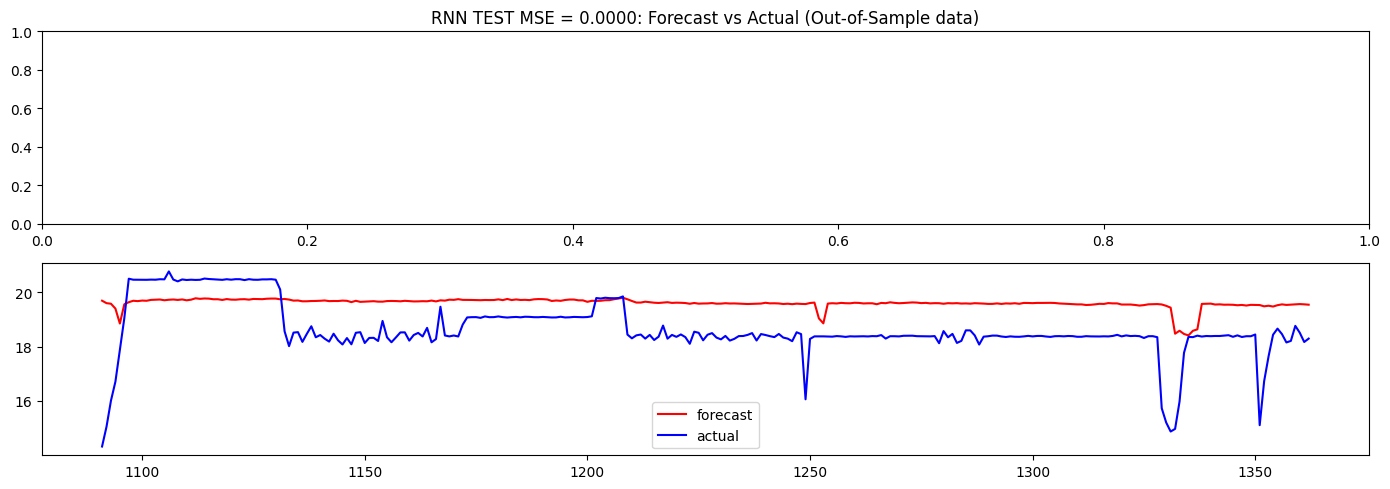

ricardo check this
torch.Size([272, 24])
torch.Size([272, 24])
(504,)
(504,)
(24,)
(24,)
(272, 24)
(1, 24)
(1, 24)
(504,)
(504,)
(24,)
(24,)
(272, 24)
(1, 24)
(1, 24)
(272, 24)
(272, 24)


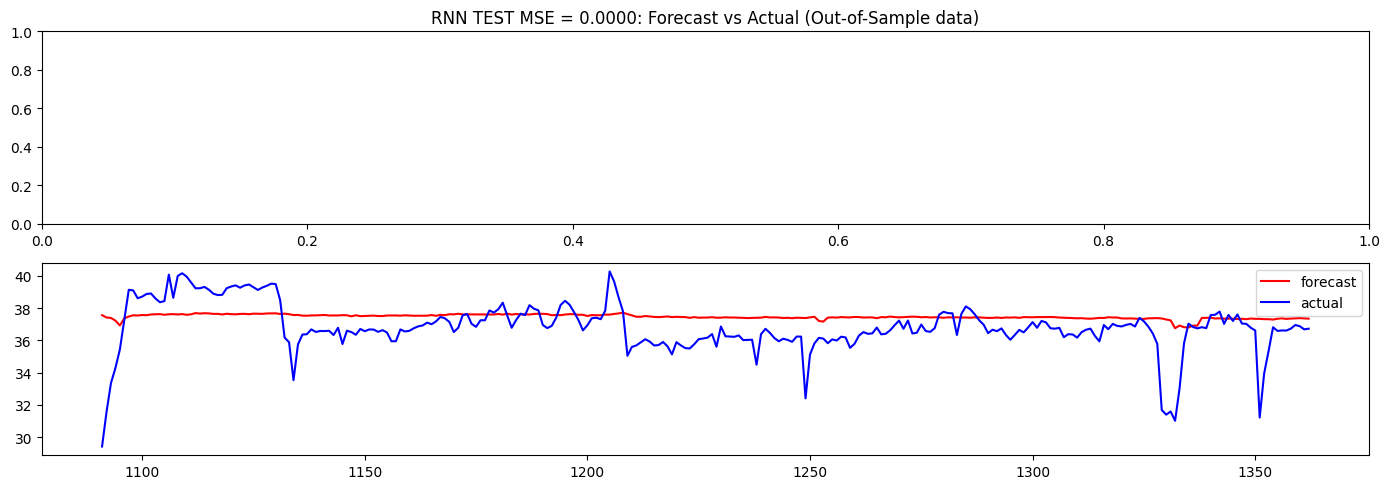

ricardo check this
torch.Size([272, 24])
torch.Size([272, 24])
(504,)
(504,)
(24,)
(24,)
(272, 24)
(1, 24)
(1, 24)
(504,)
(504,)
(24,)
(24,)
(272, 24)
(1, 24)
(1, 24)
(272, 24)
(272, 24)


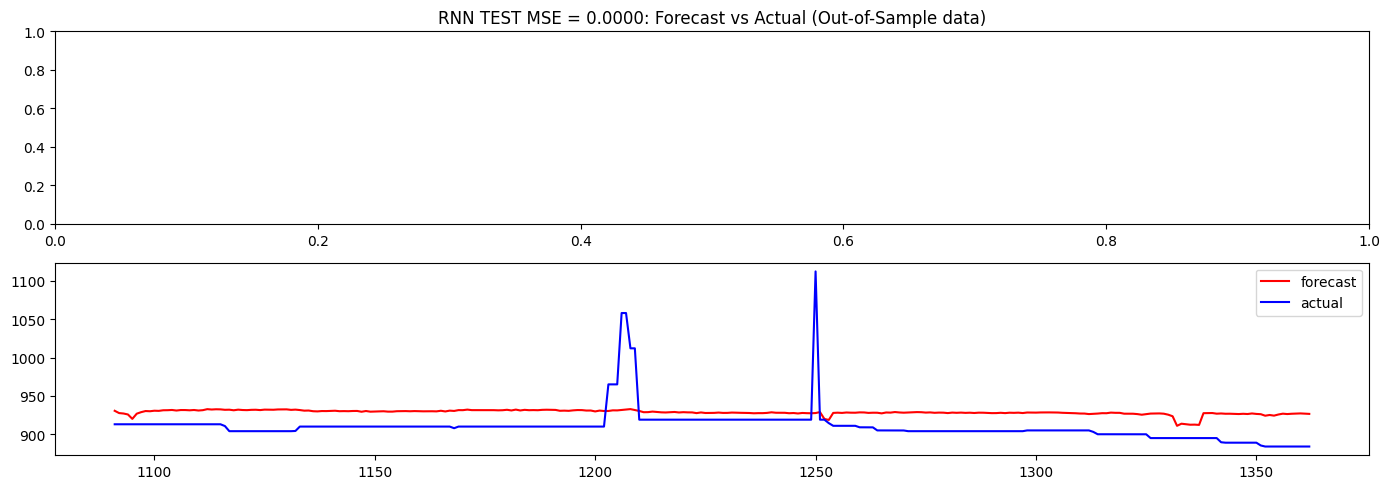

In [135]:

for i in range(24):

    x_index = i

    l1, l2 = View_all_predicted_Xs(x_index, model, model_type='RNN', **params_si )            



## A GPT for Time Series


In [136]:

torch.manual_seed(256)
device = 'cuda' if torch.cuda.is_available() else 'cpu'

block_size        = 20 ## 4          ## 40      ## N tokens in sequence
batch_size        = 8 
max_iters         = 40000
eval_interval     = 500     
learning_rate     = 0.0003
eval_iters        = 300
vocab_size        = 88  ## 65

## every id for a given token is embedded to vector of this size

n_embd            = 24        ## 512       ## 24 for time series, silicon is 0           
n_head            = 8         ## 8 attention heads
n_layer           = 6         ## 6 eoncoder layers
dropout           = 0.2


In [137]:

text = ''

input_file2 = 'input/HuckFinn.txt'

with open(input_file2, 'r', encoding='utf-8') as f:
    text = f.read()


In [138]:

print("length of data in letter or characters")
len(text)


length of data in letter or characters


590407

In [139]:

## list(set(text))


In [140]:

the_chars  = sorted(     list(set(text))     )

vocab_size = len( the_chars )      ## 65

print(  len(the_chars)  )

print(  ''.join(the_chars)  )

## The printed oputput
## !$&',-.3:;?ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz


88

 !#$%()*,-./0123456789:;?ABCDEFGHIJKLMNOPQRSTUVWXY[]_abcdefghijklmnopqrstuvwxyz—‘’“”•™﻿


In [141]:

stoi = { ch:i for i, ch in enumerate(the_chars) }
itos = { i:ch for i, ch in enumerate(the_chars) }


In [142]:

print( stoi )
print( itos )


{'\n': 0, ' ': 1, '!': 2, '#': 3, '$': 4, '%': 5, '(': 6, ')': 7, '*': 8, ',': 9, '-': 10, '.': 11, '/': 12, '0': 13, '1': 14, '2': 15, '3': 16, '4': 17, '5': 18, '6': 19, '7': 20, '8': 21, '9': 22, ':': 23, ';': 24, '?': 25, 'A': 26, 'B': 27, 'C': 28, 'D': 29, 'E': 30, 'F': 31, 'G': 32, 'H': 33, 'I': 34, 'J': 35, 'K': 36, 'L': 37, 'M': 38, 'N': 39, 'O': 40, 'P': 41, 'Q': 42, 'R': 43, 'S': 44, 'T': 45, 'U': 46, 'V': 47, 'W': 48, 'X': 49, 'Y': 50, '[': 51, ']': 52, '_': 53, 'a': 54, 'b': 55, 'c': 56, 'd': 57, 'e': 58, 'f': 59, 'g': 60, 'h': 61, 'i': 62, 'j': 63, 'k': 64, 'l': 65, 'm': 66, 'n': 67, 'o': 68, 'p': 69, 'q': 70, 'r': 71, 's': 72, 't': 73, 'u': 74, 'v': 75, 'w': 76, 'x': 77, 'y': 78, 'z': 79, '—': 80, '‘': 81, '’': 82, '“': 83, '”': 84, '•': 85, '™': 86, '\ufeff': 87}
{0: '\n', 1: ' ', 2: '!', 3: '#', 4: '$', 5: '%', 6: '(', 7: ')', 8: '*', 9: ',', 10: '-', 11: '.', 12: '/', 13: '0', 14: '1', 15: '2', 16: '3', 17: '4', 18: '5', 19: '6', 20: '7', 21: '8', 22: '9', 23: ':', 24:

In [143]:

encode = lambda s: [ stoi[c]          for c in s   ] 

encode("bahh")


[55, 54, 61, 61]

In [144]:

decode = lambda l: ''.join(   itos[i] for i in l   )    

decode([55, 54, 61, 61])


'bahh'

In [145]:

data = torch.tensor(   encode(text), dtype=torch.long   )

print( data )


tensor([87, 45, 61,  ...,  0,  0,  0])


In [146]:

data.shape


torch.Size([590407])

In [147]:

n          = int(   0.9*len(data)   )

n


531366

In [148]:

train_data = data[:n]
val_data   = data[n:]


In [149]:

train_data.shape


torch.Size([531366])

In [150]:

val_data.shape


torch.Size([59041])

In [151]:

def get_batch(split):
    if split == "train":
        data = train_data
    else:
        data = val_data
        
    ix = torch.randint(   len(data) - block_size, (batch_size,)   )
    print(ix.shape)
    print(ix)
    print( len(data) - block_size )
    print(  block_size )
    print(  (batch_size,)  )
    
    x  = torch.stack(    [  data[   i : i+block_size ]     for i in ix ]    ) 
    y  = torch.stack(    [  data[ i+1 : i+1+block_size ]   for i in ix ]    )
    
    x, y = x.to(device), y.to(device)

    return x, y


In [152]:

x_train, y_train = params_si['train_data']


In [153]:

x_train.shape


torch.Size([1026, 480])

In [154]:

y_train.shape


torch.Size([1026, 24])

In [155]:

def get_batch_time_series_test(split, train_data, test_data):
    if split == "train":
        x_time_series = train_data
    else:
        x_time_series = test_data

    
    x_time_series = x_time_series.view(-1, 20, 24)
        
    ## ix = torch.randint(   len(x_time_series) - 5, (batch_size,)   )

    
    x  = torch.stack(    [  x_time_series[ i ,  0 : -1   , : ]     for i in range(  x_time_series.shape[0]  ) ]    ) 
    y  = torch.stack(    [  x_time_series[ i ,  1 :      , : ]     for i in range(  x_time_series.shape[0]  ) ]    )
    
    x, y = x.to(device), y.to(device)

    return x, y


In [156]:

def get_batch_time_series(split, train_data, val_data):
    if split == "train":
        x_time_series = train_data
    else:
        x_time_series = val_data

    ## print(   x_time_series.shape   ) 
    
    x_time_series = x_time_series.view(-1, 20, 24)
        
    ix = torch.randint(   len(x_time_series) - 20, (batch_size,)   )

    
    x  = torch.stack(    [  x_time_series[ i ,  0 : -1   , : ]     for i in ix ]    ) 
    y  = torch.stack(    [  x_time_series[ i ,  1 :      , : ]     for i in ix ]    )
    
    x, y = x.to(device), y.to(device)

    return x, y



In [157]:

temp_batch_size = 4
temp_block_size = 16

## select random starting points for the 4 sentences
ix = torch.randint(   
            len(data) - block_size, 
            (temp_batch_size,)   
)

print( ix )


tensor([ 41033,  58744, 549474, 544169])


In [158]:

for index_temp in ix:
    print(  data[index_temp]  )


tensor(58)
tensor(28)
tensor(58)
tensor(74)


In [159]:

x  = torch.stack(    
    [ data[   i : i+  temp_block_size ]   for i in ix ] 
    
) 

y  = torch.stack(    
    [ data[ i+1 : i+1+ temp_block_size ]  for i in ix ]    
)

print(x)
print(y)


tensor([[58, 65, 57,  1, 62, 73,  1, 74, 69,  1, 54, 67, 57,  0, 57, 71],
        [28, 54, 65, 65,  1, 73, 61, 62, 72,  1, 54,  1, 60, 68, 75, 66],
        [58,  1, 54, 65, 65,  1, 76, 58, 67, 73,  9,  1, 54, 67, 57,  1],
        [74, 55, 55, 54, 60, 58, 11,  1, 33, 58, 82, 72,  1, 69, 65, 74]])
tensor([[65, 57,  1, 62, 73,  1, 74, 69,  1, 54, 67, 57,  0, 57, 71, 68],
        [54, 65, 65,  1, 73, 61, 62, 72,  1, 54,  1, 60, 68, 75, 66, 58],
        [ 1, 54, 65, 65,  1, 76, 58, 67, 73,  9,  1, 54, 67, 57,  1, 73],
        [55, 55, 54, 60, 58, 11,  1, 33, 58, 82, 72,  1, 69, 65, 74, 66]])


In [160]:

x.shape


torch.Size([4, 16])

In [161]:

y.shape


torch.Size([4, 16])

In [162]:

@torch.no_grad()    ## for efficient processing
def estimate_loss( model, criterion, x_train, x_val ):
    
    out = {}
    model.eval()   ## set to no training
    
    for split in ['train', 'val']:
        ## print("one")
        losses = torch.zeros(eval_iters)
        for k in range( eval_iters ):
            X, Y = get_batch_time_series( split, x_train, x_val )
            ## print("two")
            logits  = model(X, Y)
            ## logits   = model( xb, yb )
            B, T, E  = logits.shape
            ## print("three")
            pred      = logits.view( B*T, E)
            y_train   = Y.view(B*T, E)
            
            loss =  criterion( pred, y_train )
            losses[k] = loss.item()
            ## print("four")
        out[split] = losses.mean()
        ## print("five")
    model.train()  ## back to training
    ## print("six")
    return out



## NN Architectures


In [163]:

class Head(nn.Module):

    def __init__(self, head_size):
        super().__init__()
        
        self.key   = nn.Linear(n_embd, head_size, bias=False)  ## [512, 64]
        self.query = nn.Linear(n_embd, head_size, bias=False)  ## [512, 64]
        self.value = nn.Linear(n_embd, head_size, bias=False)  ## [512, 64]

        tril_def = torch.tril( torch.ones(block_size, block_size) )  ## [40, 40]
        
        self.register_buffer(
                  'tril', 
                  tril_def
               )
        
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        
        B, T, E = x.shape   ## [batch_size, 40, 512]
        
        k = self.key(   x )            ## k = (B, T, 64)
        q = self.query( x )            ## q = (B, T, 64)

        E2 = 64     ## I think this is 64 and not 512
        ## (B, T, E) @ (B, E, T)  -> (B, T, T)
        wei = q @ k.transpose(-2, -1) * E2 ** -0.5        
        
        wei = wei.masked_fill(
                      self.tril[:T, :T] == 0, 
                      float('-inf')
        )   
        
        ## (B, T, T)
        wei = F.softmax( wei, dim= -1 )         ## (B, T, T)
        wei = self.dropout(   wei   )
        
        ## perform weighted aggregation of values
        
        v   = self.value(  x  )   ## x = (B, 40, E)
        out = wei @ v             ## (B, T, T) @ (B, T, 64) -> (B, T, 64)
        
        return out
        


In [164]:

class FeedForward(nn.Module):

    def __init__(self, n_embd):         ## 512
        
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(n_embd, 4 * n_embd),      ## [512, 4*512]
            nn.ReLU(),
            nn.Linear(4 * n_embd, n_embd),      ## [4*512, 512]
            nn.Dropout(dropout),
        )
        
    def forward(self, x):
        return self.net(x)



In [165]:

class MultiHeadAttention(nn.Module):

    def __init__(self, num_heads, head_size):    ## (8, 64)
        super().__init__()
        self.heads = nn.ModuleList(  [ Head(head_size) for _ in range(num_heads) ] )
        self.proj  = nn.Linear(n_embd, n_embd)   ## 512, 512
        self.dropout = nn.Dropout(dropout)
    
    def forward(self, x):
        out = torch.cat(   [ h(x) for h in self.heads ], dim = -1   )
        out = self.proj(  out   )
        out = self.dropout(   out   )
        return out


In [166]:

class Block(nn.Module):
    
    def __init__(self, n_embd, n_head):     ## (512, 8)
        super().__init__()
        head_size = n_embd // n_head        ## 64
        self.sa   = MultiHeadAttention(n_head, head_size)
        self.ffwd = FeedForward( n_embd)    ## 512
        self.ln1  = nn.LayerNorm(n_embd)
        self.ln2  = nn.LayerNorm(n_embd)
        
    def forward(self, x):
        x = x + self.sa(     self.ln1(x)      )
        x = x + self.ffwd(   self.ln2(x)      )
        return x



## Integrate GPT with CIVS data




In [167]:

"""
Parameters:
    input_size: input size
    output_size: output size
    n_features: number of features (hidden dimension)
    n_layers: number of layers
    train_data: tuple ex (x_train, y_train)
    val_data: tuple ex (x_val, y_val)
    epochs: number of epochs
    print_every: output and history tracking
    lr: learning rate
"""


'\nParameters:\n    input_size: input size\n    output_size: output size\n    n_features: number of features (hidden dimension)\n    n_layers: number of layers\n    train_data: tuple ex (x_train, y_train)\n    val_data: tuple ex (x_val, y_val)\n    epochs: number of epochs\n    print_every: output and history tracking\n    lr: learning rate\n'

In [168]:


class Time_Series_GPT(nn.Module):
    
    def __init__(self, seq_length, input_size, output_size):
        
        super().__init__()
        
        self.output_size= output_size
        self.seq_length = seq_length
        self.input_size = input_size

        
        self.token_embedding_table = nn.Embedding(vocab_size, n_embd)   ## [65, 512]
        self.pos_emb_table         = nn.Embedding(block_size, n_embd)     ## [block, 512]
        
        self.blocks = nn.Sequential(
                *[   Block(n_embd, n_head=n_head) for _ in range(n_layer)    ]
        )
        
        self.ln_f        = nn.LayerNorm(  n_embd    )        
        self.lm_ffw_head = nn.Linear(n_embd, 24)  ## [512, 65] # FFW Layer
        

    def forward(self,  idx, targets):

        ## print( idx.shape      )
        ## print( targets.shape  )

        B = idx.shape[0]
        T = idx.shape[1]       ## 40
        
        ## B, T = idx.shape     ## (Batch, 40)
        ## ids and targets are both (B, T) tensors of integers
        ## tok_emb = self.token_embedding_table(idx)  

        tok_emb = idx
        pos_emb = self.pos_emb_table( torch.arange(T, device=device) )  
        
        x = tok_emb + pos_emb    ## [B, T, E] or [64, 40, 512], now [batch, 40, 24]

        x = self.blocks(  x  )   ## (B, T, E)   
        x = self.ln_f(    x  )   ## (B, T, E)   ## norm
        logits = self.lm_ffw_head(x)         ## [B, 40, 65] 
        
        return logits
        
        
    def generate(self, idx, max_new_tokens):    ## idx is (B, T)
        for _ in range(max_new_tokens):
            ## crop idx to the last block_size tokens
            idx_cond = idx[:, -block_size:, :]
            print(idx_cond.shape)
            logits = self(idx_cond, 0 )    ## ## get preds
            logits = logits[:, -1, :]    ## focus on last one (B, E)
            logits = logits.unsqueeze(0)
            print(logits.shape)
            ## probs = F.softmax(logits, dim= -1)    ## (B, E) get probs
            ## idx_next = torch.multinomial(probs, num_samples=1)     ## (B, 1) selected
            idx = torch.cat(  (idx, logits), dim=1  )   ## (B, T+1) append sample to running sequence
            print(idx.shape)
        return idx
            



In [169]:


def train_model_GPT(model_type='GPT', **kwargs):
 
    if model_type=='GPT':
        model = Time_Series_GPT(kwargs['seq_length'],
                                kwargs['input_size'], 
                                kwargs['output_size']
        )

    model        = model.to( device )

    optimizer    = torch.optim.Adam(  model.parameters(), lr=learning_rate   )

    criterion    = nn.MSELoss()

   
    x_train, y_train = kwargs['train_data']
    x_val,   y_val   = kwargs['val_data']
    x_test,  y_test  = kwargs['test_data']
    
    history = {'loss': [], 'val_loss': []}

    model.train()
    
    epochs      = kwargs['epochs']
    print_every = kwargs['print_every']

    ## for iter in range(max_iters):
    
    for batch_i, epoch in enumerate( range(max_iters) ):

        xb, yb = get_batch_time_series( 'train', x_train, x_val )

        logits   = model( xb, yb )

        B, T, E  = logits.shape
        
        logits   = logits.view( B*T, E)
        pred = logits

        targets       = yb.view(B*T, E)
        y_train  = targets
        
        loss =  criterion( pred, y_train ) 
        
        optimizer.zero_grad(set_to_none=True)           ## zero out
        loss.backward()
        optimizer.step()


        #################
        
        if batch_i % eval_interval == 0:
            print(  batch_i  )
            losses = estimate_loss( model, criterion, x_train, x_val  )
            loss_train_rc = float( losses['train'].item()  )
            loss_val_rc   = float( losses['val'].item()    )
            print(f'step { batch_i }: train loss { loss_train_rc }, val loss { loss_val_rc }')

  
        ########
        
        if batch_i % print_every == 0:
            model.eval()
            with torch.no_grad():

                xb, yb = get_batch_time_series( 'val', x_train, x_val )

                logits   = model( xb, yb )

                B, T, E  = logits.shape
        
                pred   = logits.view( B*T, E)
                
                y_train       = yb.view(B*T, E)
        
                val_loss =  criterion( pred, y_train ) 
                
                history['val_loss'].append(    val_loss.item()   ) 
            model.train()
            history['loss'].append( loss.item() )
            ## print(f'{batch_i}/{max_iters} - Loss:  {loss.item()}, val_loss: {val_loss.item()}')

    
    ## Prediction
    model.eval()
    with torch.no_grad():
        xb_test, yb_test = get_batch_time_series_test( 'test', x_train, x_test )

        y_hat = model( xb_test, yb_test )

        B, T, E  = y_hat.shape
        
        pred_test  =   y_hat.view( B*T, E)
        y_test     = yb_test.view( B*T, E)

        f24_y_pred    =   y_hat[:, -1, :]
        f24_y_real    = yb_test[:, -1, :]
        
    mse_loss_air =  criterion( pred_test, y_test ) 
 
    print(f'Test MSE Loss: {mse_loss_air.item()}')

    ############################
    fig, ax = plt.subplots(2, 1) 
    ax[0].set_title(f'{model_type}: Loss and Validation Loss per epoch')
    ax[0].plot(history['loss'],     'k--',   label='loss'      )
    ax[0].plot(history['val_loss'], 'k',     label='val_loss'  )
    ax[0].legend()
    ax[1].set_title(f"{model_type} TEST MSE = {mse_loss_air.item():.4f}: Forecast vs Actual (Out-of-Sample data)")
    scale = kwargs['scale']
    print(f24_y_real.shape )
    print(f24_y_pred.shape )

    actual = scale.inverse_y( f24_y_real.detach().numpy() ) ## .ravel() )
    pred   = scale.inverse_y( f24_y_pred.detach().numpy() ) ## .ravel() )
    print( actual.shape   )
    print(   pred.shape   )
    ## print(  kwargs['idx']  )
    ## print( len( kwargs['idx'] ) )
    ## input()
    idx =  kwargs['idx']


    actual = actual[:, 0]
    pred   =   pred[:, 0]
    pd.Series(actual, index=idx).plot( label='actual',    color='blue')
    pd.Series(pred,   index=idx).plot( label='forecast' , color='red' )
    fig.tight_layout()
    ax[1].legend(); plt.show()


    
    return model, history
    
'''
'''

'\n'

0
step 0: train loss 1.1832941770553589, val loss 2.444406270980835
500
step 500: train loss 0.41435307264328003, val loss 1.1384378671646118
1000
step 1000: train loss 0.34022197127342224, val loss 0.8633333444595337
1500
step 1500: train loss 0.29425039887428284, val loss 0.7274554967880249
2000
step 2000: train loss 0.27898451685905457, val loss 0.6265904903411865
2500
step 2500: train loss 0.2539345920085907, val loss 0.5521056652069092
3000
step 3000: train loss 0.24020978808403015, val loss 0.4895839989185333
3500
step 3500: train loss 0.20807956159114838, val loss 0.4379498362541199
4000
step 4000: train loss 0.1975126415491104, val loss 0.3893168866634369
4500
step 4500: train loss 0.1860661506652832, val loss 0.3555580675601959
5000
step 5000: train loss 0.1800544708967209, val loss 0.31532105803489685
5500
step 5500: train loss 0.17025986313819885, val loss 0.29046744108200073
6000
step 6000: train loss 0.15993329882621765, val loss 0.25909730792045593
6500
step 6500: train l

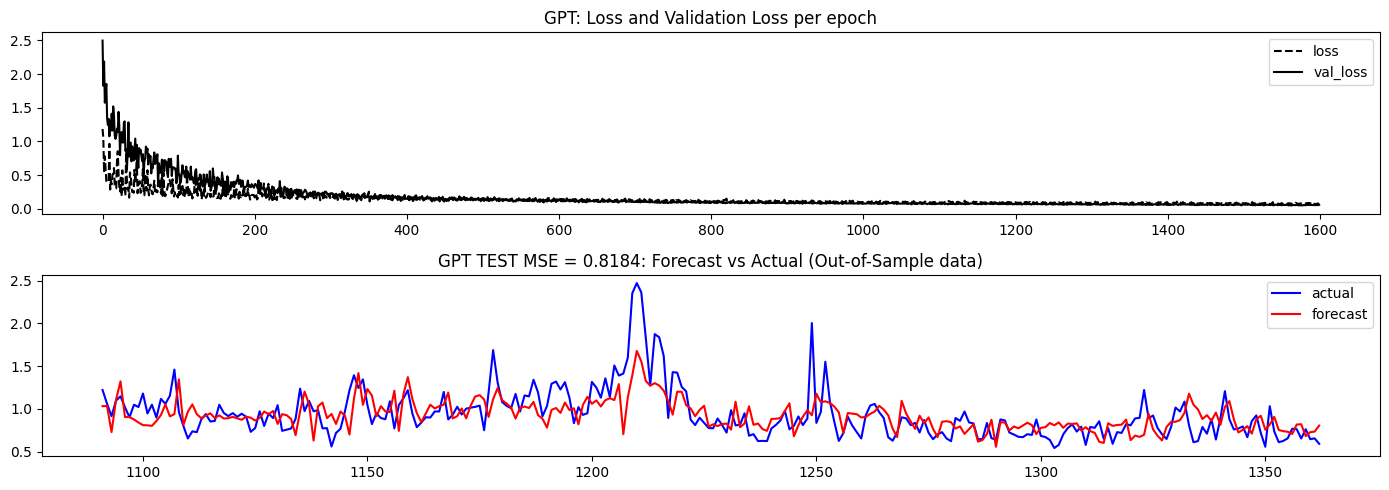

In [170]:

si_GPT, history_a_GPT = train_model_GPT('GPT', **params_si)



## GPT bins inference


In [171]:

def GPT_bins_inference_model_pt(model, x_test, y_test, which_feature , string_feature):

    model_type='gpt'

    n_test = x_test.shape[0]
    print(n_test)

    list_real_si = []
    list_pred_si = []

    input_test_x = 0

    xb_test, yb_test = get_batch_time_series_test( 'test', x_test, x_test )
    print(xb_test.shape)
    print(yb_test.shape)

    for i in range( n_test ):

        if i == 0:
            input_test_x = xb_test[ i ]    
            input_test_x = input_test_x.unsqueeze(0)
            print(input_test_x.shape)

        if i % 10000 == 0:
            print(i)
        
        model.eval()
        
        with torch.no_grad():        

            y_hat = model( input_test_x, yb_test )
            

            B, T, E  = y_hat.shape
            print("gpt predicted", y_hat.shape)
        
            ## pred_test  =   y_hat.view( B*T, E)
            ## y_test     = yb_test.view( B*T, E)

            f24_y_pred    =   y_hat[:, -1, :]
            f24_y_real    = yb_test[i, -1, :].unsqueeze(0)
            print(f24_y_pred.shape)
            print(f24_y_real.shape)
           
            #########################
            
            y_pred_f24     = f24_y_pred.detach().numpy() 
            y_real_f24     = f24_y_real.detach().numpy() 
            print(y_pred_f24.shape)
            print(y_real_f24.shape)

        
            the_sigma = scale_civs.sigma[-vector_n_out]
            the_mu    = scale_civs.mu[-vector_n_out]

            y_pred_f24 = (y_pred_f24 * the_sigma) + the_mu 
            y_real_f24 = (y_real_f24 * the_sigma) + the_mu 


            list_real_si.append(y_real_f24[ :, 0] )
            list_pred_si.append(y_pred_f24[ :, 0] )

            #############################

            print("to concat ", input_test_x.shape)

            temp_x_test = input_test_x[:, 1: , :]   ## [20, 4, 24]
            print("sliced ", temp_x_test.shape)

            print("pred to cat: ", f24_y_pred.shape )

            f24_y_pred = f24_y_pred.unsqueeze(0)
            
            concat_part = f24_y_pred       #
            new_x_test = torch.cat((temp_x_test , concat_part), 1)

            print("after concatenate ", new_x_test.shape )
            
            input_test_x = new_x_test

    

    l_real = list_real_si
    l_pred = list_pred_si

    eval_criterion = nn.MSELoss()
    ## torch.FloatTensor(a)
    mse_eval_bins = eval_criterion(torch.FloatTensor(l_pred), torch.FloatTensor( l_real))
    print( string_feature )
    print(f'Test MSE Loss: {mse_eval_bins.item():.4f}')
 
    x = [ i for i in range(len(l_real)) ] 
    print(len(x))
  
    # plot lines 

    plt.scatter(x, l_real, label = "real", color='red') 
    plt.plot(   x, l_real, label = "real", color='red') 
    
    plt.scatter(x, l_pred, label = "pred", color='blue') 
    plt.plot(   x, l_pred, label = "pred", color='blue') 
    
    plt.legend() 
    plt.show()


In [172]:

x_test,  y_test  = params_si['test_data']


272
torch.Size([272, 19, 24])
torch.Size([272, 19, 24])
torch.Size([1, 19, 24])
0
gpt predicted torch.Size([1, 19, 24])
torch.Size([1, 24])
torch.Size([1, 24])
(1, 24)
(1, 24)
to concat  torch.Size([1, 19, 24])
sliced  torch.Size([1, 18, 24])
pred to cat:  torch.Size([1, 24])
after concatenate  torch.Size([1, 19, 24])
gpt predicted torch.Size([1, 19, 24])
torch.Size([1, 24])
torch.Size([1, 24])
(1, 24)
(1, 24)
to concat  torch.Size([1, 19, 24])
sliced  torch.Size([1, 18, 24])
pred to cat:  torch.Size([1, 24])
after concatenate  torch.Size([1, 19, 24])
gpt predicted torch.Size([1, 19, 24])
torch.Size([1, 24])
torch.Size([1, 24])
(1, 24)
(1, 24)
to concat  torch.Size([1, 19, 24])
sliced  torch.Size([1, 18, 24])
pred to cat:  torch.Size([1, 24])
after concatenate  torch.Size([1, 19, 24])
gpt predicted torch.Size([1, 19, 24])
torch.Size([1, 24])
torch.Size([1, 24])
(1, 24)
(1, 24)
to concat  torch.Size([1, 19, 24])
sliced  torch.Size([1, 18, 24])
pred to cat:  torch.Size([1, 24])
after con

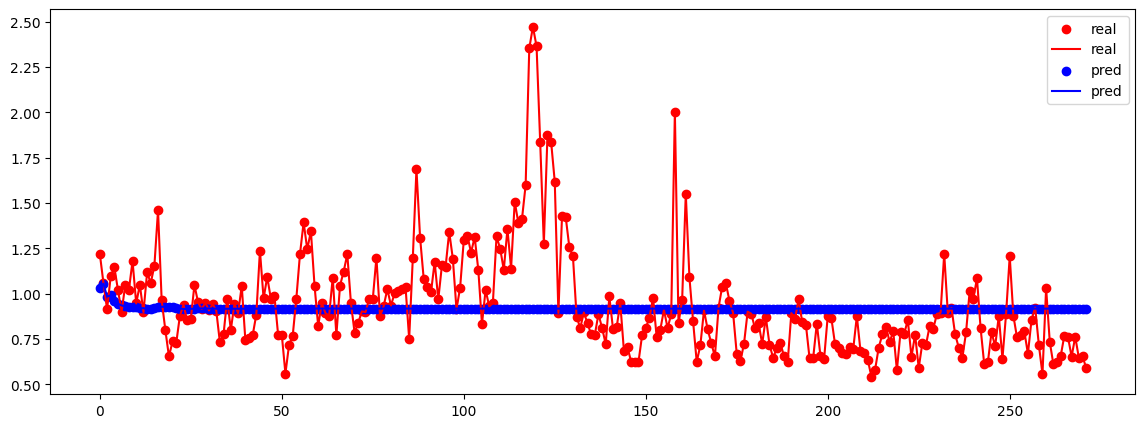

In [173]:

GPT_bins_inference_model_pt(si_GPT, x_test, y_test, 0 , "SI")


In [174]:


bin_size = 40


torch.Size([40, 480])
torch.Size([40, 24])
---------------
40
torch.Size([40, 19, 24])
torch.Size([40, 19, 24])
torch.Size([1, 19, 24])
0
gpt predicted torch.Size([1, 19, 24])
torch.Size([1, 24])
torch.Size([1, 24])
(1, 24)
(1, 24)
to concat  torch.Size([1, 19, 24])
sliced  torch.Size([1, 18, 24])
pred to cat:  torch.Size([1, 24])
after concatenate  torch.Size([1, 19, 24])
gpt predicted torch.Size([1, 19, 24])
torch.Size([1, 24])
torch.Size([1, 24])
(1, 24)
(1, 24)
to concat  torch.Size([1, 19, 24])
sliced  torch.Size([1, 18, 24])
pred to cat:  torch.Size([1, 24])
after concatenate  torch.Size([1, 19, 24])
gpt predicted torch.Size([1, 19, 24])
torch.Size([1, 24])
torch.Size([1, 24])
(1, 24)
(1, 24)
to concat  torch.Size([1, 19, 24])
sliced  torch.Size([1, 18, 24])
pred to cat:  torch.Size([1, 24])
after concatenate  torch.Size([1, 19, 24])
gpt predicted torch.Size([1, 19, 24])
torch.Size([1, 24])
torch.Size([1, 24])
(1, 24)
(1, 24)
to concat  torch.Size([1, 19, 24])
sliced  torch.Size(

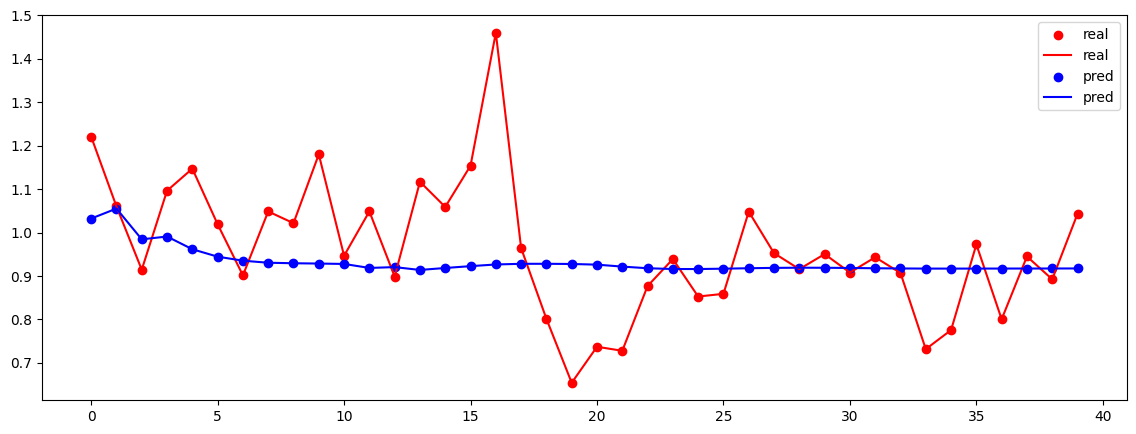

torch.Size([40, 480])
torch.Size([40, 24])
---------------
40
torch.Size([40, 19, 24])
torch.Size([40, 19, 24])
torch.Size([1, 19, 24])
0
gpt predicted torch.Size([1, 19, 24])
torch.Size([1, 24])
torch.Size([1, 24])
(1, 24)
(1, 24)
to concat  torch.Size([1, 19, 24])
sliced  torch.Size([1, 18, 24])
pred to cat:  torch.Size([1, 24])
after concatenate  torch.Size([1, 19, 24])
gpt predicted torch.Size([1, 19, 24])
torch.Size([1, 24])
torch.Size([1, 24])
(1, 24)
(1, 24)
to concat  torch.Size([1, 19, 24])
sliced  torch.Size([1, 18, 24])
pred to cat:  torch.Size([1, 24])
after concatenate  torch.Size([1, 19, 24])
gpt predicted torch.Size([1, 19, 24])
torch.Size([1, 24])
torch.Size([1, 24])
(1, 24)
(1, 24)
to concat  torch.Size([1, 19, 24])
sliced  torch.Size([1, 18, 24])
pred to cat:  torch.Size([1, 24])
after concatenate  torch.Size([1, 19, 24])
gpt predicted torch.Size([1, 19, 24])
torch.Size([1, 24])
torch.Size([1, 24])
(1, 24)
(1, 24)
to concat  torch.Size([1, 19, 24])
sliced  torch.Size(

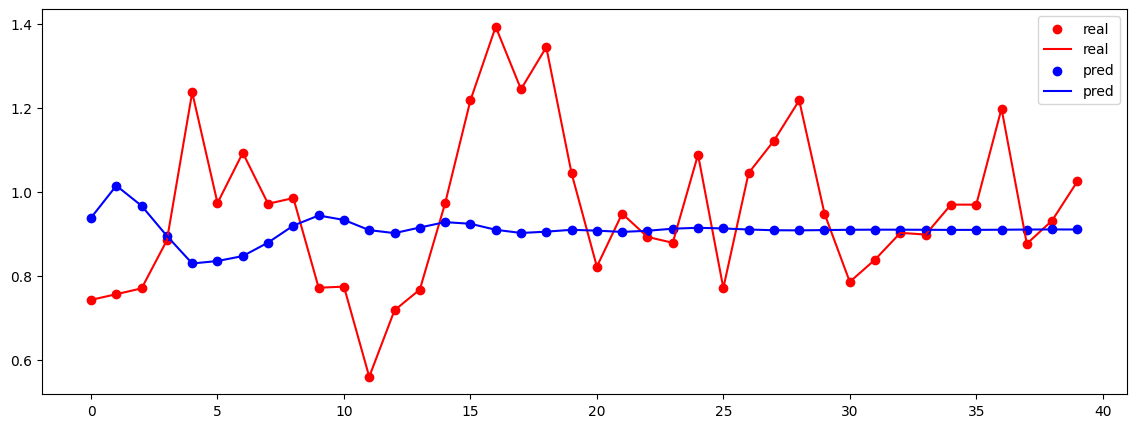

torch.Size([40, 480])
torch.Size([40, 24])
---------------
40
torch.Size([40, 19, 24])
torch.Size([40, 19, 24])
torch.Size([1, 19, 24])
0
gpt predicted torch.Size([1, 19, 24])
torch.Size([1, 24])
torch.Size([1, 24])
(1, 24)
(1, 24)
to concat  torch.Size([1, 19, 24])
sliced  torch.Size([1, 18, 24])
pred to cat:  torch.Size([1, 24])
after concatenate  torch.Size([1, 19, 24])
gpt predicted torch.Size([1, 19, 24])
torch.Size([1, 24])
torch.Size([1, 24])
(1, 24)
(1, 24)
to concat  torch.Size([1, 19, 24])
sliced  torch.Size([1, 18, 24])
pred to cat:  torch.Size([1, 24])
after concatenate  torch.Size([1, 19, 24])
gpt predicted torch.Size([1, 19, 24])
torch.Size([1, 24])
torch.Size([1, 24])
(1, 24)
(1, 24)
to concat  torch.Size([1, 19, 24])
sliced  torch.Size([1, 18, 24])
pred to cat:  torch.Size([1, 24])
after concatenate  torch.Size([1, 19, 24])
gpt predicted torch.Size([1, 19, 24])
torch.Size([1, 24])
torch.Size([1, 24])
(1, 24)
(1, 24)
to concat  torch.Size([1, 19, 24])
sliced  torch.Size(

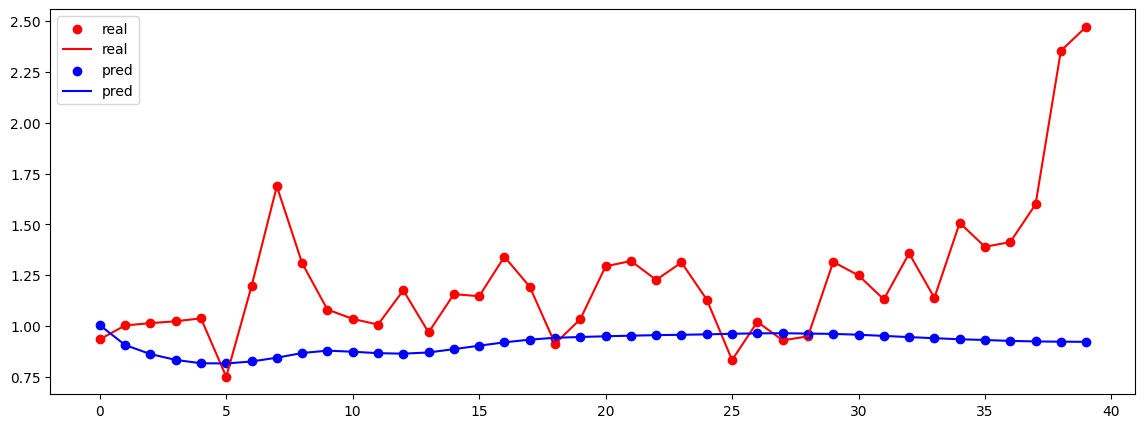

torch.Size([40, 480])
torch.Size([40, 24])
---------------
40
torch.Size([40, 19, 24])
torch.Size([40, 19, 24])
torch.Size([1, 19, 24])
0
gpt predicted torch.Size([1, 19, 24])
torch.Size([1, 24])
torch.Size([1, 24])
(1, 24)
(1, 24)
to concat  torch.Size([1, 19, 24])
sliced  torch.Size([1, 18, 24])
pred to cat:  torch.Size([1, 24])
after concatenate  torch.Size([1, 19, 24])
gpt predicted torch.Size([1, 19, 24])
torch.Size([1, 24])
torch.Size([1, 24])
(1, 24)
(1, 24)
to concat  torch.Size([1, 19, 24])
sliced  torch.Size([1, 18, 24])
pred to cat:  torch.Size([1, 24])
after concatenate  torch.Size([1, 19, 24])
gpt predicted torch.Size([1, 19, 24])
torch.Size([1, 24])
torch.Size([1, 24])
(1, 24)
(1, 24)
to concat  torch.Size([1, 19, 24])
sliced  torch.Size([1, 18, 24])
pred to cat:  torch.Size([1, 24])
after concatenate  torch.Size([1, 19, 24])
gpt predicted torch.Size([1, 19, 24])
torch.Size([1, 24])
torch.Size([1, 24])
(1, 24)
(1, 24)
to concat  torch.Size([1, 19, 24])
sliced  torch.Size(

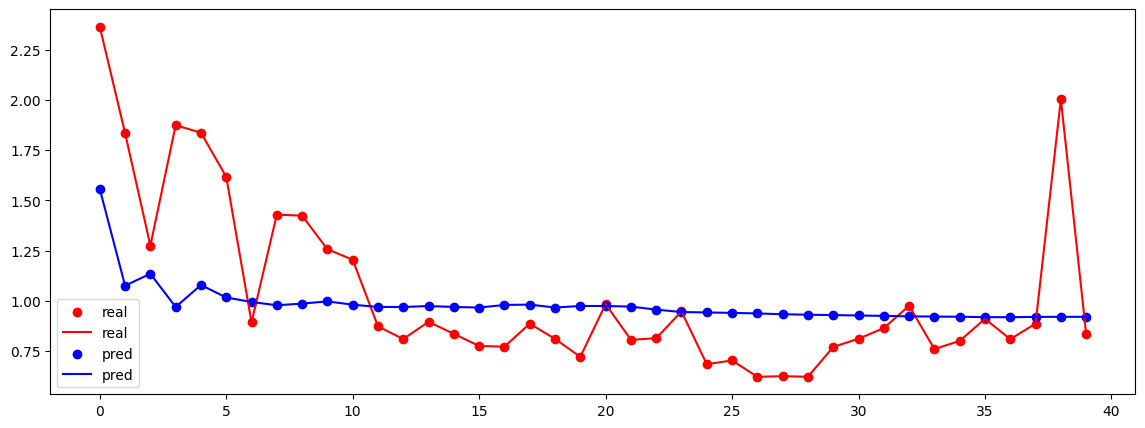

torch.Size([40, 480])
torch.Size([40, 24])
---------------
40
torch.Size([40, 19, 24])
torch.Size([40, 19, 24])
torch.Size([1, 19, 24])
0
gpt predicted torch.Size([1, 19, 24])
torch.Size([1, 24])
torch.Size([1, 24])
(1, 24)
(1, 24)
to concat  torch.Size([1, 19, 24])
sliced  torch.Size([1, 18, 24])
pred to cat:  torch.Size([1, 24])
after concatenate  torch.Size([1, 19, 24])
gpt predicted torch.Size([1, 19, 24])
torch.Size([1, 24])
torch.Size([1, 24])
(1, 24)
(1, 24)
to concat  torch.Size([1, 19, 24])
sliced  torch.Size([1, 18, 24])
pred to cat:  torch.Size([1, 24])
after concatenate  torch.Size([1, 19, 24])
gpt predicted torch.Size([1, 19, 24])
torch.Size([1, 24])
torch.Size([1, 24])
(1, 24)
(1, 24)
to concat  torch.Size([1, 19, 24])
sliced  torch.Size([1, 18, 24])
pred to cat:  torch.Size([1, 24])
after concatenate  torch.Size([1, 19, 24])
gpt predicted torch.Size([1, 19, 24])
torch.Size([1, 24])
torch.Size([1, 24])
(1, 24)
(1, 24)
to concat  torch.Size([1, 19, 24])
sliced  torch.Size(

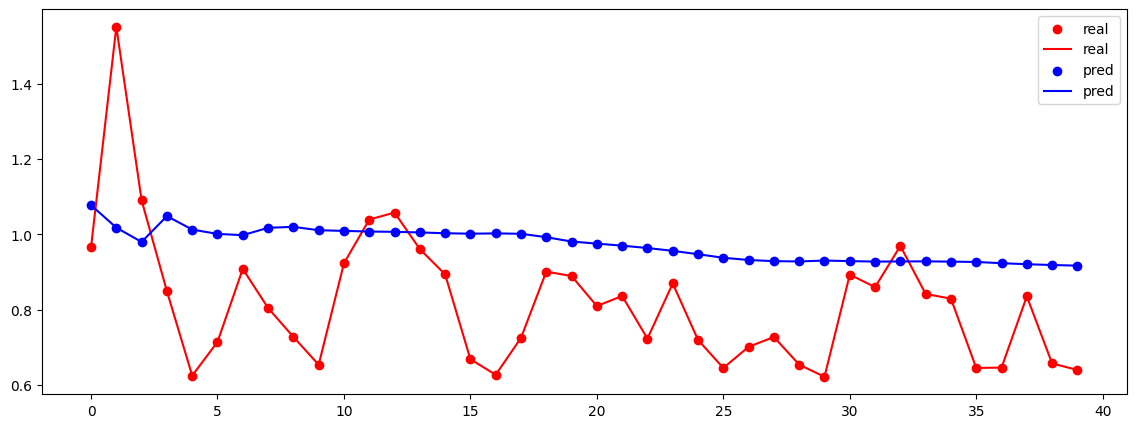

torch.Size([40, 480])
torch.Size([40, 24])
---------------
40
torch.Size([40, 19, 24])
torch.Size([40, 19, 24])
torch.Size([1, 19, 24])
0
gpt predicted torch.Size([1, 19, 24])
torch.Size([1, 24])
torch.Size([1, 24])
(1, 24)
(1, 24)
to concat  torch.Size([1, 19, 24])
sliced  torch.Size([1, 18, 24])
pred to cat:  torch.Size([1, 24])
after concatenate  torch.Size([1, 19, 24])
gpt predicted torch.Size([1, 19, 24])
torch.Size([1, 24])
torch.Size([1, 24])
(1, 24)
(1, 24)
to concat  torch.Size([1, 19, 24])
sliced  torch.Size([1, 18, 24])
pred to cat:  torch.Size([1, 24])
after concatenate  torch.Size([1, 19, 24])
gpt predicted torch.Size([1, 19, 24])
torch.Size([1, 24])
torch.Size([1, 24])
(1, 24)
(1, 24)
to concat  torch.Size([1, 19, 24])
sliced  torch.Size([1, 18, 24])
pred to cat:  torch.Size([1, 24])
after concatenate  torch.Size([1, 19, 24])
gpt predicted torch.Size([1, 19, 24])
torch.Size([1, 24])
torch.Size([1, 24])
(1, 24)
(1, 24)
to concat  torch.Size([1, 19, 24])
sliced  torch.Size(

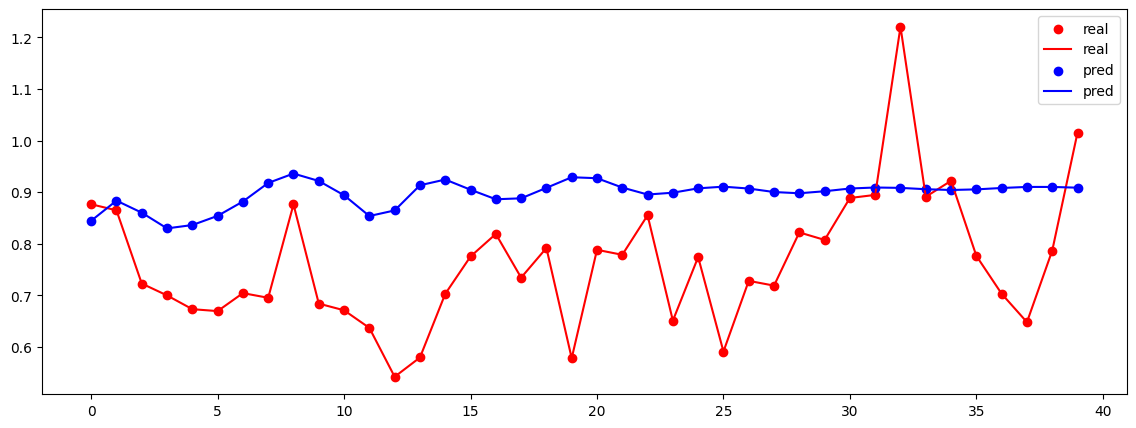

In [175]:


for i in range(0, y_test.shape[0]- bin_size, bin_size):
    
    batch_x_test = x_test[ i:i+bin_size, :]
    print( batch_x_test.shape )

    batch_y_test = y_test[i:i+bin_size, :]
    print( batch_y_test.shape )
    print("---------------")
    ## for jz in range( vector_n_out ):
    jz = 0
    ## bins_inference_model_pt(        model, batch_x_test, batch_y_test, jz, l_new[jz] )
    GPT_bins_inference_model_pt(   si_GPT,    batch_x_test, batch_y_test, 0 , "SI")



## Use GPT generate


In [183]:

x_test, y_test   = params_si['test_data']

## l_real, l_pred = bins_inference_model_pt(model, x_test, y_test)



In [184]:

x_test.shape


torch.Size([272, 480])

In [185]:

y_test.shape


torch.Size([272, 24])

In [186]:

x_test_n = x_test[:, :120]

x_test_n.shape


torch.Size([272, 120])

In [187]:

y_test_n = x_test[ :, 120:120+24 ]


In [188]:

y_test_n.shape


torch.Size([272, 24])

In [189]:

x_test = x_test_n
y_test = y_test_n


In [195]:

bin_size = 20


In [202]:

def GPT_generate_bins_inference_model_pt(model, x_test, y_test, which_feature , string_feature):

    model_type='gpt'

    n_test = x_test.shape[0]
    print(n_test)

    list_real_si = []
    list_pred_si = []

    input_test_x = 0

    xb_test, yb_test = GPT_get_batch_time_series_test( 'test', x_test, x_test )
    print(xb_test.shape)
    print(yb_test.shape)

    input_test_x = xb_test[ 0 ]    
    input_test_x = input_test_x.unsqueeze(0)
    print("input to m.generate")
    print(input_test_x.shape)

    pred_20_seq = model.generate( input_test_x, 16 )

    pred_20_seq = pred_20_seq.squeeze(0)
    print(pred_20_seq.shape)
    
    real_yb_test = yb_test[:, -1, :]
    print(real_yb_test.shape)

    f24_y_pred = pred_20_seq
    f24_y_real = real_yb_test
    
       
    y_pred_f24     = f24_y_pred.detach().numpy() 
    y_real_f24     = f24_y_real.detach().numpy() 
    print(y_pred_f24.shape)
    print(y_real_f24.shape)

        
    the_sigma = scale_civs.sigma[-vector_n_out]
    the_mu    = scale_civs.mu[-vector_n_out]

    y_pred_f24 = (y_pred_f24 * the_sigma) + the_mu 
    y_real_f24 = (y_real_f24 * the_sigma) + the_mu 

    print(y_pred_f24.shape)
    print(y_real_f24.shape)

    print( y_real_f24[ :, 0].shape )

  

    ## list_real_si.append(y_real_f24[ :, 0] )
    ## list_pred_si.append(y_pred_f24[ :, 0] )



    l_real = y_real_f24[ :, 0]
    l_pred = y_pred_f24[ :, 0]

    print(  len( l_real  )  )

 

    eval_criterion = nn.MSELoss()

    mse_eval_bins = eval_criterion(torch.FloatTensor(l_pred), torch.FloatTensor( l_real))
    print( string_feature )
    print(f'Test MSE Loss: {mse_eval_bins.item():.4f}')
 
    x = [ i for i in range(len(l_real)) ] 
    print(len(x))
  
    # plot lines 

    plt.scatter(x, l_real, label = "real", color='red') 
    plt.plot(   x, l_real, label = "real", color='red') 
    
    plt.scatter(x, l_pred, label = "pred", color='blue') 
    plt.plot(   x, l_pred, label = "pred", color='blue') 
    
    plt.legend() 
    plt.show()


In [203]:

def GPT_get_batch_time_series_test(split, train_data, test_data):
    if split == "train":
        x_time_series = train_data
    else:
        x_time_series = test_data

    print( x_time_series.shape )
    x_time_series = x_time_series.view(-1, 5, 24)
        
    ## ix = torch.randint(   len(x_time_series) - 5, (batch_size,)   )

    
    x  = torch.stack(    [  x_time_series[ i ,  0 : -1   , : ]     for i in range(  x_time_series.shape[0]  ) ]    ) 
    y  = torch.stack(    [  x_time_series[ i ,  1 :      , : ]     for i in range(  x_time_series.shape[0]  ) ]    )
    
    x, y = x.to(device), y.to(device)

    return x, y


torch.Size([20, 120])
torch.Size([20, 24])
---------------
20
torch.Size([20, 120])
torch.Size([20, 4, 24])
torch.Size([20, 4, 24])
input to m.generate
torch.Size([1, 4, 24])
torch.Size([1, 4, 24])
torch.Size([1, 1, 24])
torch.Size([1, 5, 24])
torch.Size([1, 5, 24])
torch.Size([1, 1, 24])
torch.Size([1, 6, 24])
torch.Size([1, 6, 24])
torch.Size([1, 1, 24])
torch.Size([1, 7, 24])
torch.Size([1, 7, 24])
torch.Size([1, 1, 24])
torch.Size([1, 8, 24])
torch.Size([1, 8, 24])
torch.Size([1, 1, 24])
torch.Size([1, 9, 24])
torch.Size([1, 9, 24])
torch.Size([1, 1, 24])
torch.Size([1, 10, 24])
torch.Size([1, 10, 24])
torch.Size([1, 1, 24])
torch.Size([1, 11, 24])
torch.Size([1, 11, 24])
torch.Size([1, 1, 24])
torch.Size([1, 12, 24])
torch.Size([1, 12, 24])
torch.Size([1, 1, 24])
torch.Size([1, 13, 24])
torch.Size([1, 13, 24])
torch.Size([1, 1, 24])
torch.Size([1, 14, 24])
torch.Size([1, 14, 24])
torch.Size([1, 1, 24])
torch.Size([1, 15, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])
torch.Si

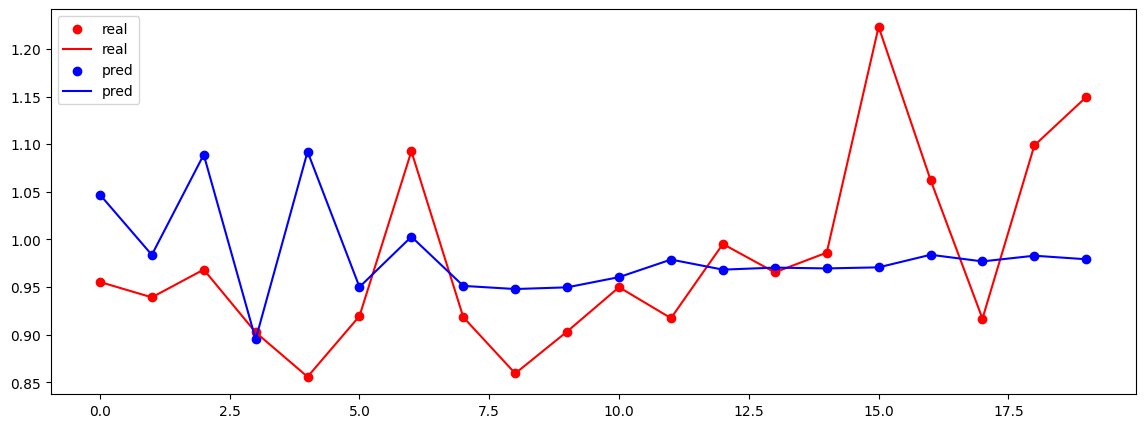

torch.Size([20, 120])
torch.Size([20, 24])
---------------
20
torch.Size([20, 120])
torch.Size([20, 4, 24])
torch.Size([20, 4, 24])
input to m.generate
torch.Size([1, 4, 24])
torch.Size([1, 4, 24])
torch.Size([1, 1, 24])
torch.Size([1, 5, 24])
torch.Size([1, 5, 24])
torch.Size([1, 1, 24])
torch.Size([1, 6, 24])
torch.Size([1, 6, 24])
torch.Size([1, 1, 24])
torch.Size([1, 7, 24])
torch.Size([1, 7, 24])
torch.Size([1, 1, 24])
torch.Size([1, 8, 24])
torch.Size([1, 8, 24])
torch.Size([1, 1, 24])
torch.Size([1, 9, 24])
torch.Size([1, 9, 24])
torch.Size([1, 1, 24])
torch.Size([1, 10, 24])
torch.Size([1, 10, 24])
torch.Size([1, 1, 24])
torch.Size([1, 11, 24])
torch.Size([1, 11, 24])
torch.Size([1, 1, 24])
torch.Size([1, 12, 24])
torch.Size([1, 12, 24])
torch.Size([1, 1, 24])
torch.Size([1, 13, 24])
torch.Size([1, 13, 24])
torch.Size([1, 1, 24])
torch.Size([1, 14, 24])
torch.Size([1, 14, 24])
torch.Size([1, 1, 24])
torch.Size([1, 15, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])
torch.Si

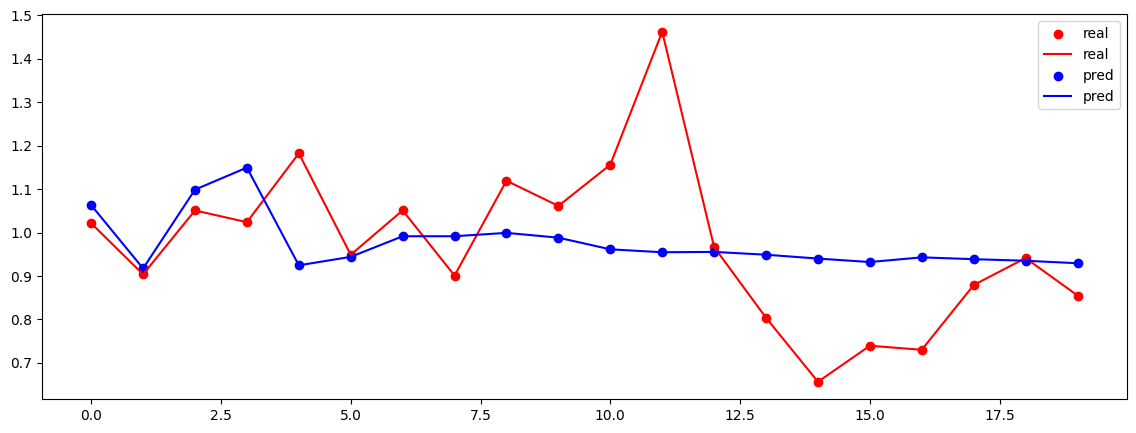

torch.Size([20, 120])
torch.Size([20, 24])
---------------
20
torch.Size([20, 120])
torch.Size([20, 4, 24])
torch.Size([20, 4, 24])
input to m.generate
torch.Size([1, 4, 24])
torch.Size([1, 4, 24])
torch.Size([1, 1, 24])
torch.Size([1, 5, 24])
torch.Size([1, 5, 24])
torch.Size([1, 1, 24])
torch.Size([1, 6, 24])
torch.Size([1, 6, 24])
torch.Size([1, 1, 24])
torch.Size([1, 7, 24])
torch.Size([1, 7, 24])
torch.Size([1, 1, 24])
torch.Size([1, 8, 24])
torch.Size([1, 8, 24])
torch.Size([1, 1, 24])
torch.Size([1, 9, 24])
torch.Size([1, 9, 24])
torch.Size([1, 1, 24])
torch.Size([1, 10, 24])
torch.Size([1, 10, 24])
torch.Size([1, 1, 24])
torch.Size([1, 11, 24])
torch.Size([1, 11, 24])
torch.Size([1, 1, 24])
torch.Size([1, 12, 24])
torch.Size([1, 12, 24])
torch.Size([1, 1, 24])
torch.Size([1, 13, 24])
torch.Size([1, 13, 24])
torch.Size([1, 1, 24])
torch.Size([1, 14, 24])
torch.Size([1, 14, 24])
torch.Size([1, 1, 24])
torch.Size([1, 15, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])
torch.Si

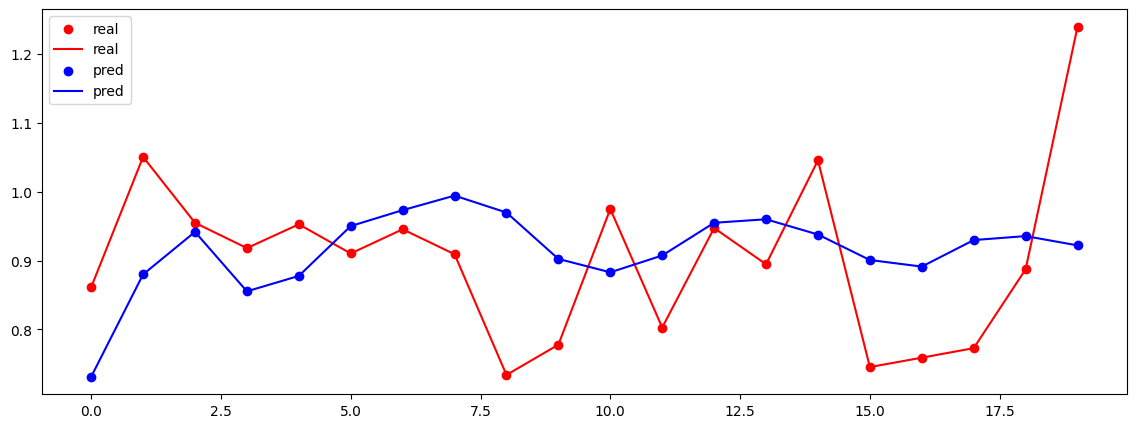

torch.Size([20, 120])
torch.Size([20, 24])
---------------
20
torch.Size([20, 120])
torch.Size([20, 4, 24])
torch.Size([20, 4, 24])
input to m.generate
torch.Size([1, 4, 24])
torch.Size([1, 4, 24])
torch.Size([1, 1, 24])
torch.Size([1, 5, 24])
torch.Size([1, 5, 24])
torch.Size([1, 1, 24])
torch.Size([1, 6, 24])
torch.Size([1, 6, 24])
torch.Size([1, 1, 24])
torch.Size([1, 7, 24])
torch.Size([1, 7, 24])
torch.Size([1, 1, 24])
torch.Size([1, 8, 24])
torch.Size([1, 8, 24])
torch.Size([1, 1, 24])
torch.Size([1, 9, 24])
torch.Size([1, 9, 24])
torch.Size([1, 1, 24])
torch.Size([1, 10, 24])
torch.Size([1, 10, 24])
torch.Size([1, 1, 24])
torch.Size([1, 11, 24])
torch.Size([1, 11, 24])
torch.Size([1, 1, 24])
torch.Size([1, 12, 24])
torch.Size([1, 12, 24])
torch.Size([1, 1, 24])
torch.Size([1, 13, 24])
torch.Size([1, 13, 24])
torch.Size([1, 1, 24])
torch.Size([1, 14, 24])
torch.Size([1, 14, 24])
torch.Size([1, 1, 24])
torch.Size([1, 15, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])
torch.Si

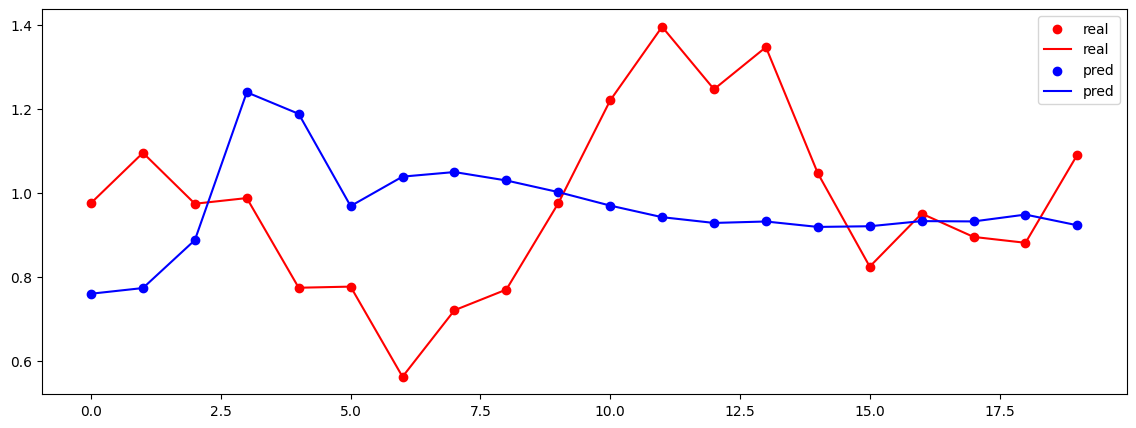

torch.Size([20, 120])
torch.Size([20, 24])
---------------
20
torch.Size([20, 120])
torch.Size([20, 4, 24])
torch.Size([20, 4, 24])
input to m.generate
torch.Size([1, 4, 24])
torch.Size([1, 4, 24])
torch.Size([1, 1, 24])
torch.Size([1, 5, 24])
torch.Size([1, 5, 24])
torch.Size([1, 1, 24])
torch.Size([1, 6, 24])
torch.Size([1, 6, 24])
torch.Size([1, 1, 24])
torch.Size([1, 7, 24])
torch.Size([1, 7, 24])
torch.Size([1, 1, 24])
torch.Size([1, 8, 24])
torch.Size([1, 8, 24])
torch.Size([1, 1, 24])
torch.Size([1, 9, 24])
torch.Size([1, 9, 24])
torch.Size([1, 1, 24])
torch.Size([1, 10, 24])
torch.Size([1, 10, 24])
torch.Size([1, 1, 24])
torch.Size([1, 11, 24])
torch.Size([1, 11, 24])
torch.Size([1, 1, 24])
torch.Size([1, 12, 24])
torch.Size([1, 12, 24])
torch.Size([1, 1, 24])
torch.Size([1, 13, 24])
torch.Size([1, 13, 24])
torch.Size([1, 1, 24])
torch.Size([1, 14, 24])
torch.Size([1, 14, 24])
torch.Size([1, 1, 24])
torch.Size([1, 15, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])
torch.Si

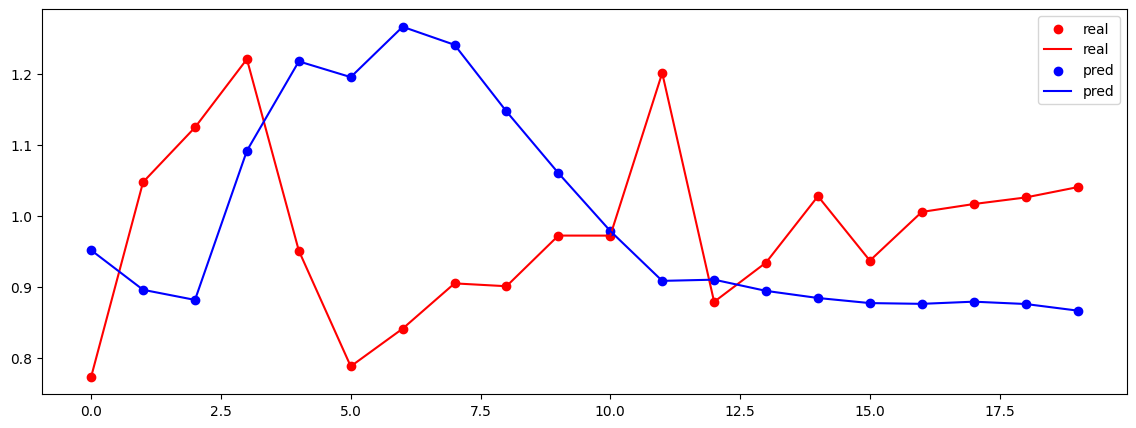

torch.Size([20, 120])
torch.Size([20, 24])
---------------
20
torch.Size([20, 120])
torch.Size([20, 4, 24])
torch.Size([20, 4, 24])
input to m.generate
torch.Size([1, 4, 24])
torch.Size([1, 4, 24])
torch.Size([1, 1, 24])
torch.Size([1, 5, 24])
torch.Size([1, 5, 24])
torch.Size([1, 1, 24])
torch.Size([1, 6, 24])
torch.Size([1, 6, 24])
torch.Size([1, 1, 24])
torch.Size([1, 7, 24])
torch.Size([1, 7, 24])
torch.Size([1, 1, 24])
torch.Size([1, 8, 24])
torch.Size([1, 8, 24])
torch.Size([1, 1, 24])
torch.Size([1, 9, 24])
torch.Size([1, 9, 24])
torch.Size([1, 1, 24])
torch.Size([1, 10, 24])
torch.Size([1, 10, 24])
torch.Size([1, 1, 24])
torch.Size([1, 11, 24])
torch.Size([1, 11, 24])
torch.Size([1, 1, 24])
torch.Size([1, 12, 24])
torch.Size([1, 12, 24])
torch.Size([1, 1, 24])
torch.Size([1, 13, 24])
torch.Size([1, 13, 24])
torch.Size([1, 1, 24])
torch.Size([1, 14, 24])
torch.Size([1, 14, 24])
torch.Size([1, 1, 24])
torch.Size([1, 15, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])
torch.Si

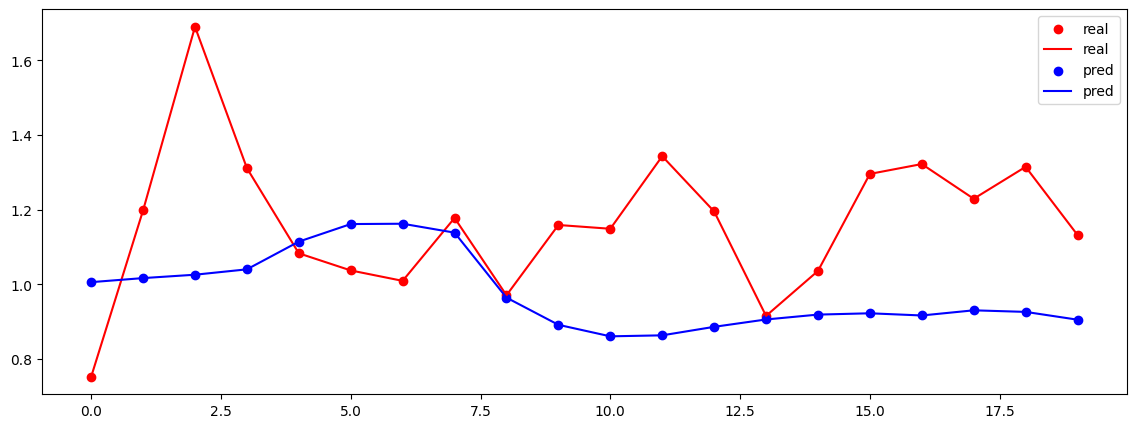

torch.Size([20, 120])
torch.Size([20, 24])
---------------
20
torch.Size([20, 120])
torch.Size([20, 4, 24])
torch.Size([20, 4, 24])
input to m.generate
torch.Size([1, 4, 24])
torch.Size([1, 4, 24])
torch.Size([1, 1, 24])
torch.Size([1, 5, 24])
torch.Size([1, 5, 24])
torch.Size([1, 1, 24])
torch.Size([1, 6, 24])
torch.Size([1, 6, 24])
torch.Size([1, 1, 24])
torch.Size([1, 7, 24])
torch.Size([1, 7, 24])
torch.Size([1, 1, 24])
torch.Size([1, 8, 24])
torch.Size([1, 8, 24])
torch.Size([1, 1, 24])
torch.Size([1, 9, 24])
torch.Size([1, 9, 24])
torch.Size([1, 1, 24])
torch.Size([1, 10, 24])
torch.Size([1, 10, 24])
torch.Size([1, 1, 24])
torch.Size([1, 11, 24])
torch.Size([1, 11, 24])
torch.Size([1, 1, 24])
torch.Size([1, 12, 24])
torch.Size([1, 12, 24])
torch.Size([1, 1, 24])
torch.Size([1, 13, 24])
torch.Size([1, 13, 24])
torch.Size([1, 1, 24])
torch.Size([1, 14, 24])
torch.Size([1, 14, 24])
torch.Size([1, 1, 24])
torch.Size([1, 15, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])
torch.Si

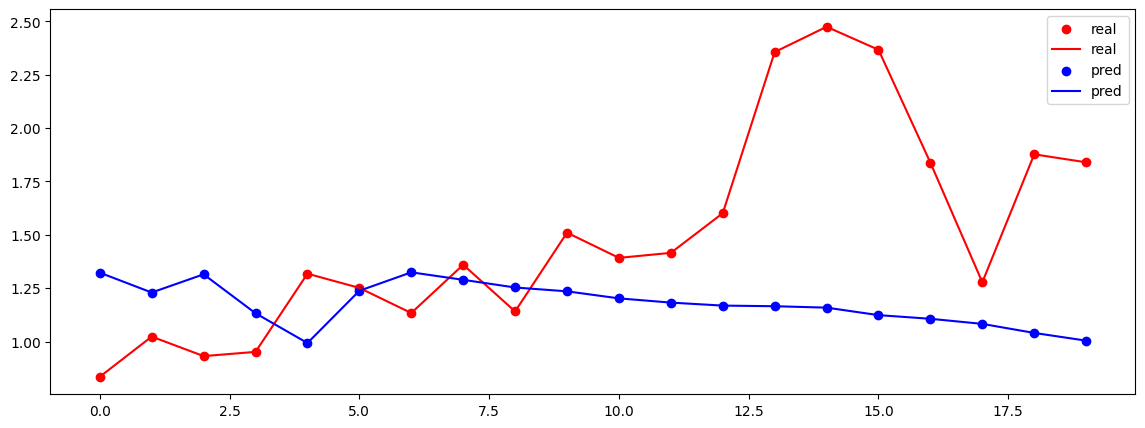

torch.Size([20, 120])
torch.Size([20, 24])
---------------
20
torch.Size([20, 120])
torch.Size([20, 4, 24])
torch.Size([20, 4, 24])
input to m.generate
torch.Size([1, 4, 24])
torch.Size([1, 4, 24])
torch.Size([1, 1, 24])
torch.Size([1, 5, 24])
torch.Size([1, 5, 24])
torch.Size([1, 1, 24])
torch.Size([1, 6, 24])
torch.Size([1, 6, 24])
torch.Size([1, 1, 24])
torch.Size([1, 7, 24])
torch.Size([1, 7, 24])
torch.Size([1, 1, 24])
torch.Size([1, 8, 24])
torch.Size([1, 8, 24])
torch.Size([1, 1, 24])
torch.Size([1, 9, 24])
torch.Size([1, 9, 24])
torch.Size([1, 1, 24])
torch.Size([1, 10, 24])
torch.Size([1, 10, 24])
torch.Size([1, 1, 24])
torch.Size([1, 11, 24])
torch.Size([1, 11, 24])
torch.Size([1, 1, 24])
torch.Size([1, 12, 24])
torch.Size([1, 12, 24])
torch.Size([1, 1, 24])
torch.Size([1, 13, 24])
torch.Size([1, 13, 24])
torch.Size([1, 1, 24])
torch.Size([1, 14, 24])
torch.Size([1, 14, 24])
torch.Size([1, 1, 24])
torch.Size([1, 15, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])
torch.Si

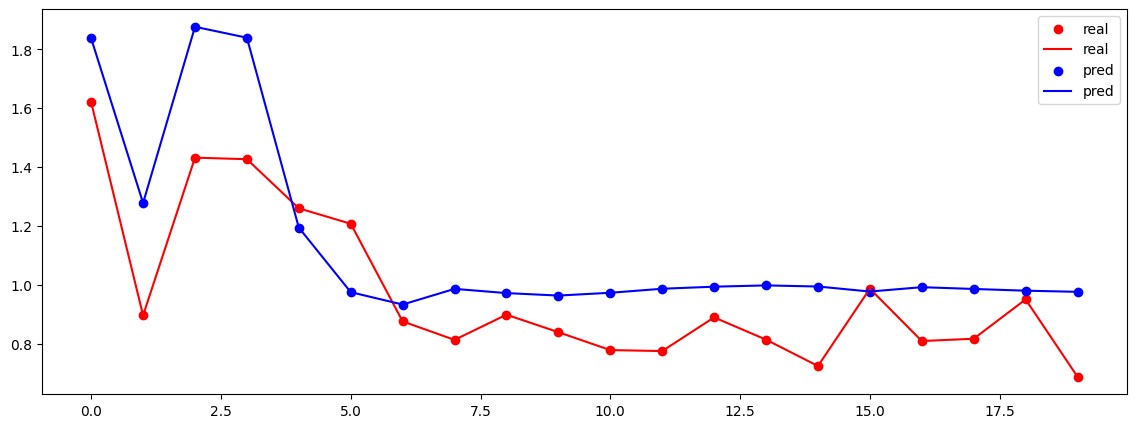

torch.Size([20, 120])
torch.Size([20, 24])
---------------
20
torch.Size([20, 120])
torch.Size([20, 4, 24])
torch.Size([20, 4, 24])
input to m.generate
torch.Size([1, 4, 24])
torch.Size([1, 4, 24])
torch.Size([1, 1, 24])
torch.Size([1, 5, 24])
torch.Size([1, 5, 24])
torch.Size([1, 1, 24])
torch.Size([1, 6, 24])
torch.Size([1, 6, 24])
torch.Size([1, 1, 24])
torch.Size([1, 7, 24])
torch.Size([1, 7, 24])
torch.Size([1, 1, 24])
torch.Size([1, 8, 24])
torch.Size([1, 8, 24])
torch.Size([1, 1, 24])
torch.Size([1, 9, 24])
torch.Size([1, 9, 24])
torch.Size([1, 1, 24])
torch.Size([1, 10, 24])
torch.Size([1, 10, 24])
torch.Size([1, 1, 24])
torch.Size([1, 11, 24])
torch.Size([1, 11, 24])
torch.Size([1, 1, 24])
torch.Size([1, 12, 24])
torch.Size([1, 12, 24])
torch.Size([1, 1, 24])
torch.Size([1, 13, 24])
torch.Size([1, 13, 24])
torch.Size([1, 1, 24])
torch.Size([1, 14, 24])
torch.Size([1, 14, 24])
torch.Size([1, 1, 24])
torch.Size([1, 15, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])
torch.Si

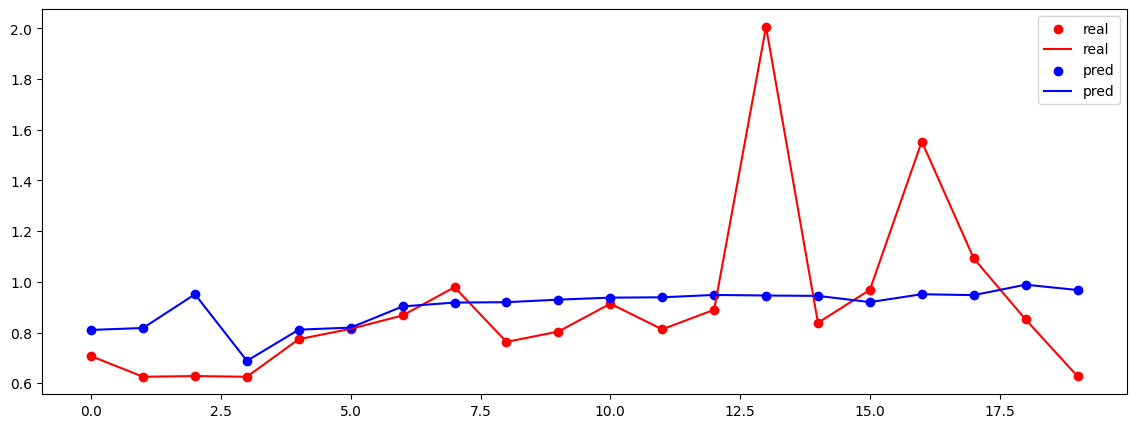

torch.Size([20, 120])
torch.Size([20, 24])
---------------
20
torch.Size([20, 120])
torch.Size([20, 4, 24])
torch.Size([20, 4, 24])
input to m.generate
torch.Size([1, 4, 24])
torch.Size([1, 4, 24])
torch.Size([1, 1, 24])
torch.Size([1, 5, 24])
torch.Size([1, 5, 24])
torch.Size([1, 1, 24])
torch.Size([1, 6, 24])
torch.Size([1, 6, 24])
torch.Size([1, 1, 24])
torch.Size([1, 7, 24])
torch.Size([1, 7, 24])
torch.Size([1, 1, 24])
torch.Size([1, 8, 24])
torch.Size([1, 8, 24])
torch.Size([1, 1, 24])
torch.Size([1, 9, 24])
torch.Size([1, 9, 24])
torch.Size([1, 1, 24])
torch.Size([1, 10, 24])
torch.Size([1, 10, 24])
torch.Size([1, 1, 24])
torch.Size([1, 11, 24])
torch.Size([1, 11, 24])
torch.Size([1, 1, 24])
torch.Size([1, 12, 24])
torch.Size([1, 12, 24])
torch.Size([1, 1, 24])
torch.Size([1, 13, 24])
torch.Size([1, 13, 24])
torch.Size([1, 1, 24])
torch.Size([1, 14, 24])
torch.Size([1, 14, 24])
torch.Size([1, 1, 24])
torch.Size([1, 15, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])
torch.Si

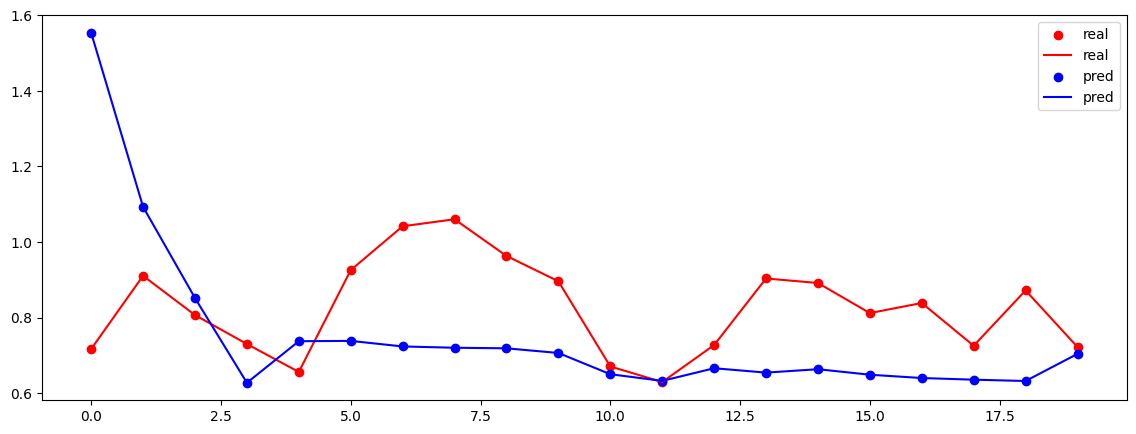

torch.Size([20, 120])
torch.Size([20, 24])
---------------
20
torch.Size([20, 120])
torch.Size([20, 4, 24])
torch.Size([20, 4, 24])
input to m.generate
torch.Size([1, 4, 24])
torch.Size([1, 4, 24])
torch.Size([1, 1, 24])
torch.Size([1, 5, 24])
torch.Size([1, 5, 24])
torch.Size([1, 1, 24])
torch.Size([1, 6, 24])
torch.Size([1, 6, 24])
torch.Size([1, 1, 24])
torch.Size([1, 7, 24])
torch.Size([1, 7, 24])
torch.Size([1, 1, 24])
torch.Size([1, 8, 24])
torch.Size([1, 8, 24])
torch.Size([1, 1, 24])
torch.Size([1, 9, 24])
torch.Size([1, 9, 24])
torch.Size([1, 1, 24])
torch.Size([1, 10, 24])
torch.Size([1, 10, 24])
torch.Size([1, 1, 24])
torch.Size([1, 11, 24])
torch.Size([1, 11, 24])
torch.Size([1, 1, 24])
torch.Size([1, 12, 24])
torch.Size([1, 12, 24])
torch.Size([1, 1, 24])
torch.Size([1, 13, 24])
torch.Size([1, 13, 24])
torch.Size([1, 1, 24])
torch.Size([1, 14, 24])
torch.Size([1, 14, 24])
torch.Size([1, 1, 24])
torch.Size([1, 15, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])
torch.Si

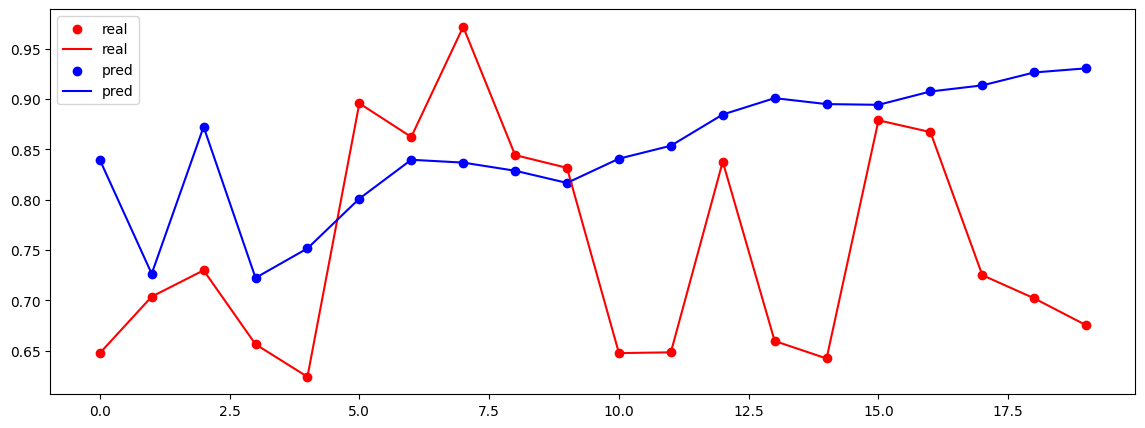

torch.Size([20, 120])
torch.Size([20, 24])
---------------
20
torch.Size([20, 120])
torch.Size([20, 4, 24])
torch.Size([20, 4, 24])
input to m.generate
torch.Size([1, 4, 24])
torch.Size([1, 4, 24])
torch.Size([1, 1, 24])
torch.Size([1, 5, 24])
torch.Size([1, 5, 24])
torch.Size([1, 1, 24])
torch.Size([1, 6, 24])
torch.Size([1, 6, 24])
torch.Size([1, 1, 24])
torch.Size([1, 7, 24])
torch.Size([1, 7, 24])
torch.Size([1, 1, 24])
torch.Size([1, 8, 24])
torch.Size([1, 8, 24])
torch.Size([1, 1, 24])
torch.Size([1, 9, 24])
torch.Size([1, 9, 24])
torch.Size([1, 1, 24])
torch.Size([1, 10, 24])
torch.Size([1, 10, 24])
torch.Size([1, 1, 24])
torch.Size([1, 11, 24])
torch.Size([1, 11, 24])
torch.Size([1, 1, 24])
torch.Size([1, 12, 24])
torch.Size([1, 12, 24])
torch.Size([1, 1, 24])
torch.Size([1, 13, 24])
torch.Size([1, 13, 24])
torch.Size([1, 1, 24])
torch.Size([1, 14, 24])
torch.Size([1, 14, 24])
torch.Size([1, 1, 24])
torch.Size([1, 15, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])
torch.Si

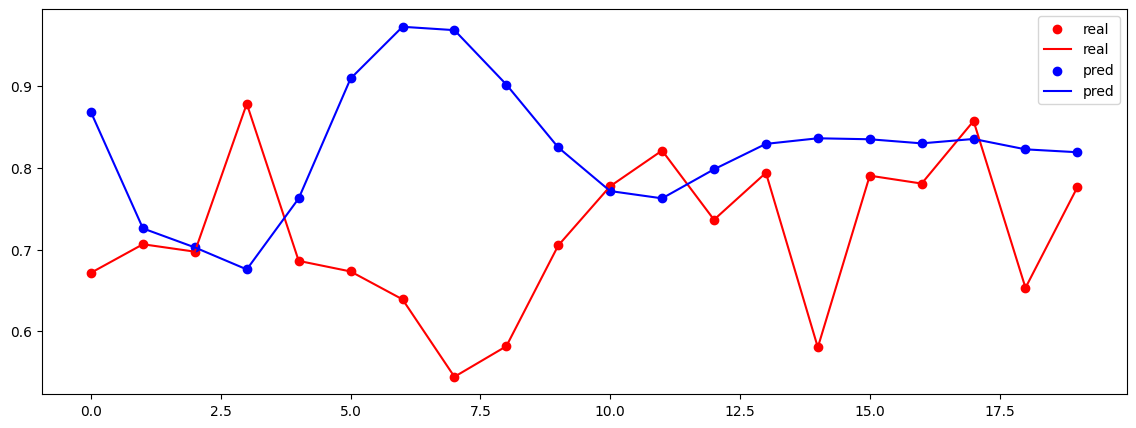

torch.Size([20, 120])
torch.Size([20, 24])
---------------
20
torch.Size([20, 120])
torch.Size([20, 4, 24])
torch.Size([20, 4, 24])
input to m.generate
torch.Size([1, 4, 24])
torch.Size([1, 4, 24])
torch.Size([1, 1, 24])
torch.Size([1, 5, 24])
torch.Size([1, 5, 24])
torch.Size([1, 1, 24])
torch.Size([1, 6, 24])
torch.Size([1, 6, 24])
torch.Size([1, 1, 24])
torch.Size([1, 7, 24])
torch.Size([1, 7, 24])
torch.Size([1, 1, 24])
torch.Size([1, 8, 24])
torch.Size([1, 8, 24])
torch.Size([1, 1, 24])
torch.Size([1, 9, 24])
torch.Size([1, 9, 24])
torch.Size([1, 1, 24])
torch.Size([1, 10, 24])
torch.Size([1, 10, 24])
torch.Size([1, 1, 24])
torch.Size([1, 11, 24])
torch.Size([1, 11, 24])
torch.Size([1, 1, 24])
torch.Size([1, 12, 24])
torch.Size([1, 12, 24])
torch.Size([1, 1, 24])
torch.Size([1, 13, 24])
torch.Size([1, 13, 24])
torch.Size([1, 1, 24])
torch.Size([1, 14, 24])
torch.Size([1, 14, 24])
torch.Size([1, 1, 24])
torch.Size([1, 15, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])
torch.Si

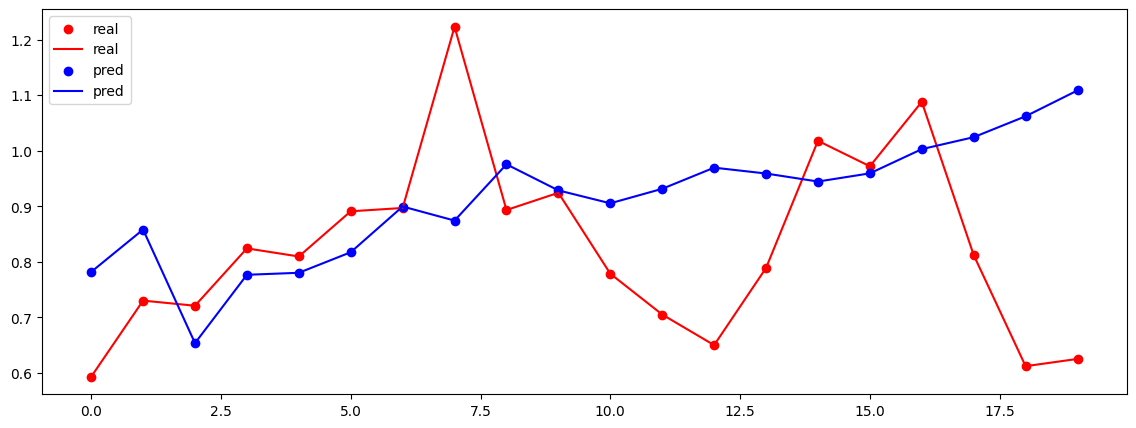

In [204]:

for i in range(0, y_test.shape[0]- bin_size, bin_size):
    
    batch_x_test = x_test[ i:i+bin_size, :]
    print( batch_x_test.shape )

    batch_y_test = y_test[i:i+bin_size, :]
    print( batch_y_test.shape )
    print("---------------")
    ## for jz in range( vector_n_out ):
    jz = 0
    ## bins_inference_model_pt(        model, batch_x_test, batch_y_test, jz, l_new[jz] )
    GPT_generate_bins_inference_model_pt(   si_GPT,    batch_x_test, batch_y_test, 0 , "SI")
